<a href="https://www.kaggle.com/code/nkirichimzifrancis/assignment-2-p2838878-nkiri-chimzi-francis?scriptVersionId=242530651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install pyspark==3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 5.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805894 sha256=c2fc148615576023759afd36b6957bac90dc777922ff3184a441725eebd82f4f
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
# start spark session and configureation
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("dat").getOrCreate()
sc = spark.sparkContext
#create an instance of SQLContext
sqlContext = SQLContext(spark)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/28 20:43:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [3]:
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [4]:
UKCrimereport = spark.read.option("header", "true").option("delimiter", ",")\
.option("inferSchema", "true").\
    csv("/kaggle/input/citycrimes/CITIES/*street.csv")

In [5]:
UKCrimereport.count()

629095

In [6]:
UKCrimereport.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)
 |-- Context: string (nullable = true)



In [7]:
UKCrimereport.show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+-------+
|            Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|        LSOA name|          Crime type|Last outcome category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+-------+
|58047a3a95167140d...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.347639|53.061766|On or near Regent...|E01019444|Amber Valley 003B|Violence and sexu...| Court result unav...|   null|
|8ac857a6be54f5424...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.329102|53.024519|On or near Minkle...|E01019451|Amber Valley 012D|               Drugs| Unable to prosecu...|   null|
|98dcb182224f03d58...|2023-05|Notti

In [8]:
New_UKCrimereport = UKCrimereport.drop('Context')

In [9]:
New_UKCrimereport.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)



In [10]:
New_UKCrimereport = New_UKCrimereport.withColumnRenamed('Crime ID', 'Crime_ID')
New_UKCrimereport = New_UKCrimereport.withColumnRenamed('Reported by', 'Reported_by')
New_UKCrimereport = New_UKCrimereport.withColumnRenamed('Falls within', 'Falls_within')
New_UKCrimereport = New_UKCrimereport.withColumnRenamed('LSOA code', 'LSOA_code')
New_UKCrimereport = New_UKCrimereport.withColumnRenamed('LSOA name', 'LSOA_name')
New_UKCrimereport = New_UKCrimereport.withColumnRenamed('Crime type', 'Crime_type')
New_UKCrimereport = New_UKCrimereport.withColumnRenamed('Last outcome category', 'Last_outcome_category')

In [11]:
New_UKCrimereport.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_by: string (nullable = true)
 |-- Falls_within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_code: string (nullable = true)
 |-- LSOA_name: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Last_outcome_category: string (nullable = true)



In [12]:
#register temp tables

New_UKCrimereport.registerTempTable("tbl_UKCrimereport")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [13]:
sqlContext.sql("select * from tbl_UKCrimereport").show(5)

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code|        LSOA_name|          Crime_type|Last_outcome_category|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+
|58047a3a95167140d...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.347639|53.061766|On or near Regent...|E01019444|Amber Valley 003B|Violence and sexu...| Court result unav...|
|8ac857a6be54f5424...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.329102|53.024519|On or near Minkle...|E01019451|Amber Valley 012D|               Drugs| Unable to prosecu...|
|98dcb182224f03d58...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.

**ANALYSIS ON LEICESTERSHIRE CRIME DATA**

In [14]:
#Only reports from Leicestershire police

Leicestershire_Crime_Count = New_UKCrimereport.filter(col("Reported_by") == "Leicestershire Police")

In [15]:
Leicestershire_Crime_Count.count()

225221

In [16]:
#Leicestershire report

Leicestershire_Crime_Count.show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code| LSOA_name|          Crime_type|Last_outcome_category|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+
|f452c4f173253a904...|2022-05|Leicestershire Po...|Leicestershire Po...|-1.214768|52.622431|On or near Queens...|E01025631|Blaby 002A|            Burglary| Court result unav...|
|7e8c156f99e28cf26...|2022-05|Leicestershire Po...|Leicestershire Po...|-1.214176|52.621663|On or near Lowlan...|E01025631|Blaby 002A|        Public order| Investigation com...|
|92068d66fa7c47414...|2022-05|Leicestershire Po...|Leicestershire Po...|-1.217961|  52.6198|On or near Galaha.

In [17]:
# A) Analysis Monthly Trends In Criminal Activity

#Leicestershire Crime amount by month 

Leicestershire_Crime_CountNew = Leicestershire_Crime_Count.groupby("Month").count().orderBy(desc("count"))

In [18]:
#Result for Leicestershire Crime amount by month

Leicestershire_Crime_CountNew.show()

+-------+-----+
|  Month|count|
+-------+-----+
|2022-08|10373|
|2022-05|10332|
|2022-07|10056|
|2022-03|10019|
|2022-06| 9980|
|2023-05| 9835|
|2022-11| 9816|
|2022-10| 9802|
|2023-06| 9760|
|2023-04| 9595|
|2023-03| 9591|
|2022-04| 9494|
|2022-09| 9492|
|2023-08| 9294|
|2023-09| 9250|
|2023-07| 9221|
|2023-10| 9102|
|2023-02| 8793|
|2022-01| 8730|
|2023-01| 8676|
+-------+-----+
only showing top 20 rows



In [19]:
#Extracting both year and month from the Leicestershire Monthly count

Leicestershire_Crime_withYear = Leicestershire_Crime_CountNew.select("Month",
    substring("Month", 1, 4).alias("Year"),# Extract the year from 'Month'
    substring("Month", 6, 2).alias("Months"), # Extract the month from 'Month'
    "count" )  # Include the existing 'count' column

In [20]:
#Result of both year and month extracted from the Leicestershire Monthly count

Leicestershire_Crime_withYear.show()

+-------+----+------+-----+
|  Month|Year|Months|count|
+-------+----+------+-----+
|2022-08|2022|    08|10373|
|2022-05|2022|    05|10332|
|2022-07|2022|    07|10056|
|2022-03|2022|    03|10019|
|2022-06|2022|    06| 9980|
|2023-05|2023|    05| 9835|
|2022-11|2022|    11| 9816|
|2022-10|2022|    10| 9802|
|2023-06|2023|    06| 9760|
|2023-04|2023|    04| 9595|
|2023-03|2023|    03| 9591|
|2022-04|2022|    04| 9494|
|2022-09|2022|    09| 9492|
|2023-08|2023|    08| 9294|
|2023-09|2023|    09| 9250|
|2023-07|2023|    07| 9221|
|2023-10|2023|    10| 9102|
|2023-02|2023|    02| 8793|
|2022-01|2022|    01| 8730|
|2023-01|2023|    01| 8676|
+-------+----+------+-----+
only showing top 20 rows



In [21]:
#Crime amount for each month in 2022

Leicestershire_Crime_Count_2022 = Leicestershire_Crime_withYear.filter(Leicestershire_Crime_withYear.
   Year =="2022" ). select("Year","Months", "count").orderBy("Months")

In [22]:
#Results of Crime amount for each month in 2022

Leicestershire_Crime_Count_2022.show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2022|    01| 8730|
|2022|    02| 8482|
|2022|    03|10019|
|2022|    04| 9494|
|2022|    05|10332|
|2022|    06| 9980|
|2022|    07|10056|
|2022|    08|10373|
|2022|    09| 9492|
|2022|    10| 9802|
|2022|    11| 9816|
|2022|    12| 8603|
+----+------+-----+



In [23]:
#Crime amount for each month in 2023

Leicestershire_Crime_Count_2023 = Leicestershire_Crime_withYear.filter(Leicestershire_Crime_withYear.
   Year =="2023" ). select("Year","Months", "count").orderBy("Months")

In [24]:
#Results of Crime amount for each month in 2023

Leicestershire_Crime_Count_2023.show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2023|    01| 8676|
|2023|    02| 8793|
|2023|    03| 9591|
|2023|    04| 9595|
|2023|    05| 9835|
|2023|    06| 9760|
|2023|    07| 9221|
|2023|    08| 9294|
|2023|    09| 9250|
|2023|    10| 9102|
|2023|    11| 8626|
|2023|    12| 8299|
+----+------+-----+



In [25]:
#USING SQL SYNTAX to Analyse Monthly Trends In Criminal Activity 

#Leicestershire Crime amount by month in 2022 only using SQL

sqlContext.sql("SELECT Month, \
        substring(Month, 1, 4) AS Year,  substring(Month, 6, 2) AS MonthOnly, COUNT(*) AS CrimeCount \
    FROM tbl_UKCrimereport \
    WHERE Reported_by = 'Leicestershire Police' AND substring(Month, 1, 4) = '2022' \
    GROUP BY Month \
    ORDER BY MonthOnly").show()

+-------+----+---------+----------+
|  Month|Year|MonthOnly|CrimeCount|
+-------+----+---------+----------+
|2022-01|2022|       01|      8730|
|2022-02|2022|       02|      8482|
|2022-03|2022|       03|     10019|
|2022-04|2022|       04|      9494|
|2022-05|2022|       05|     10332|
|2022-06|2022|       06|      9980|
|2022-07|2022|       07|     10056|
|2022-08|2022|       08|     10373|
|2022-09|2022|       09|      9492|
|2022-10|2022|       10|      9802|
|2022-11|2022|       11|      9816|
|2022-12|2022|       12|      8603|
+-------+----+---------+----------+



In [26]:
#Leicestershire Crime amount by month in 2023 only using SQL

sqlContext.sql("SELECT Month, \
        substring(Month, 1, 4) AS Year,  substring(Month, 6, 2) AS MonthOnly, COUNT(*) AS CrimeCount \
    FROM tbl_UKCrimereport \
    WHERE Reported_by = 'Leicestershire Police' AND substring(Month, 1, 4) = '2023' \
    GROUP BY Month \
    ORDER BY MonthOnly").show()

+-------+----+---------+----------+
|  Month|Year|MonthOnly|CrimeCount|
+-------+----+---------+----------+
|2023-01|2023|       01|      8676|
|2023-02|2023|       02|      8793|
|2023-03|2023|       03|      9591|
|2023-04|2023|       04|      9595|
|2023-05|2023|       05|      9835|
|2023-06|2023|       06|      9760|
|2023-07|2023|       07|      9221|
|2023-08|2023|       08|      9294|
|2023-09|2023|       09|      9250|
|2023-10|2023|       10|      9102|
|2023-11|2023|       11|      8626|
|2023-12|2023|       12|      8299|
+-------+----+---------+----------+



In [27]:
Leicestershire_Crime_Count_2022.registerTempTable("Leicestershire_2022")
sqlContext.sql("select * from Leicestershire_2022").show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2022|    01| 8730|
|2022|    02| 8482|
|2022|    03|10019|
|2022|    04| 9494|
|2022|    05|10332|
|2022|    06| 9980|
|2022|    07|10056|
|2022|    08|10373|
|2022|    09| 9492|
|2022|    10| 9802|
|2022|    11| 9816|
|2022|    12| 8603|
+----+------+-----+



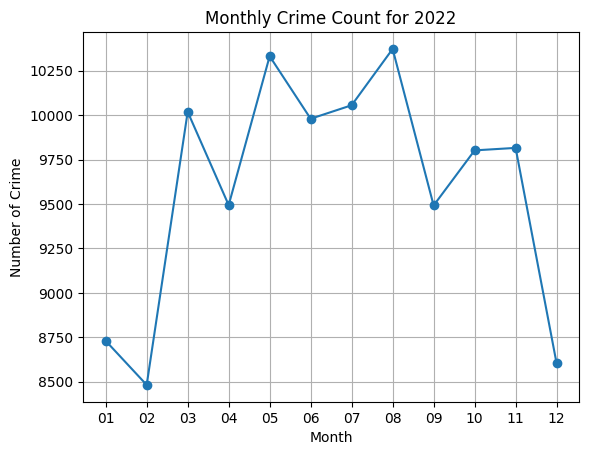

In [28]:
# Prepare variables for visualisations for Leicestershire Monthly Trends in 2022

monthArray = sqlContext.sql("select Months from Leicestershire_2022")\
.rdd.map(lambda f:f[0]).collect()
monthlyCount = sqlContext.sql("select count from Leicestershire_2022")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = monthArray
y = monthlyCount

plt.plot(x, y, 'o-')
plt.title('Monthly Crime Count for 2022')
plt.ylabel('Number of Crime')
plt.xlabel('Month')
plt.grid(True)
plt.savefig("Leicestershire2022CrimeAmount.png")
plt.show()

In [29]:
Leicestershire_Crime_Count_2023.registerTempTable("Leicestershire_2023")
sqlContext.sql("select * from Leicestershire_2023").show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2023|    01| 8676|
|2023|    02| 8793|
|2023|    03| 9591|
|2023|    04| 9595|
|2023|    05| 9835|
|2023|    06| 9760|
|2023|    07| 9221|
|2023|    08| 9294|
|2023|    09| 9250|
|2023|    10| 9102|
|2023|    11| 8626|
|2023|    12| 8299|
+----+------+-----+



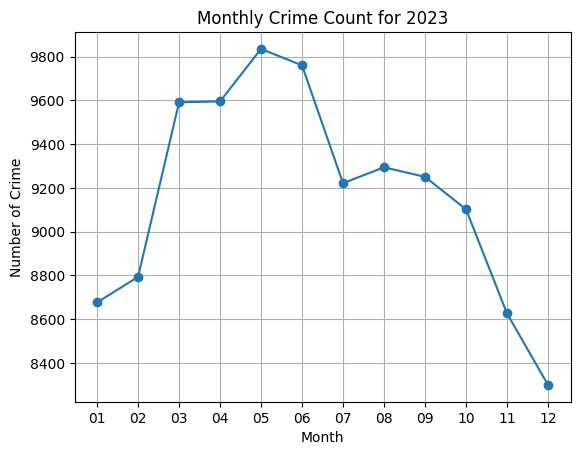

In [30]:
# Prepare variables for visualisations for Leicestershire Monthly Trends in 2023

monthArray = sqlContext.sql("select Months from Leicestershire_2023")\
.rdd.map(lambda f:f[0]).collect()
monthlyCount = sqlContext.sql("select count from Leicestershire_2023")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = monthArray
y = monthlyCount

plt.plot(x, y, 'o-')
plt.title('Monthly Crime Count for 2023')
plt.ylabel('Number of Crime')
plt.xlabel('Month')
plt.grid(True)
plt.savefig("Leicestershire2023CrimeAmount.png")
plt.show()

In [31]:
# B) Analysis by year to observe annual trends

#Leicestershire Crime amount by year sorted descendantly

Leicestershire_Annual_Count = Leicestershire_Crime_Count.select(substring(Leicestershire_Crime_Count.Month, 1,4).alias('Year'), "Month")\
.groupby("Year").count().orderBy(desc("count"))

In [32]:
Leicestershire_Annual_Count.show()

+----+------+
|Year| count|
+----+------+
|2022|115179|
|2023|110042|
+----+------+



In [33]:
# Using SQL Syntax to Analyse by year to observe annual trends

#Leicestershire Crime amount by year sorted descendantly using SQL 

sqlContext.sql("SELECT substring(Month, 1, 4) AS Year, COUNT(*) AS TotalCrimes\
    FROM tbl_UKCrimereport\
    WHERE Reported_by = 'Leicestershire Police'\
    GROUP BY Year\
    ORDER BY TotalCrimes Desc").show()

+----+-----------+
|Year|TotalCrimes|
+----+-----------+
|2022|     115179|
|2023|     110042|
+----+-----------+



In [34]:
Leicestershire_Annual_Count.registerTempTable("tbl_Leicestershire_Annual_Count")
sqlContext.sql("select * from tbl_Leicestershire_Annual_Count").show()

+----+------+
|Year| count|
+----+------+
|2022|115179|
|2023|110042|
+----+------+



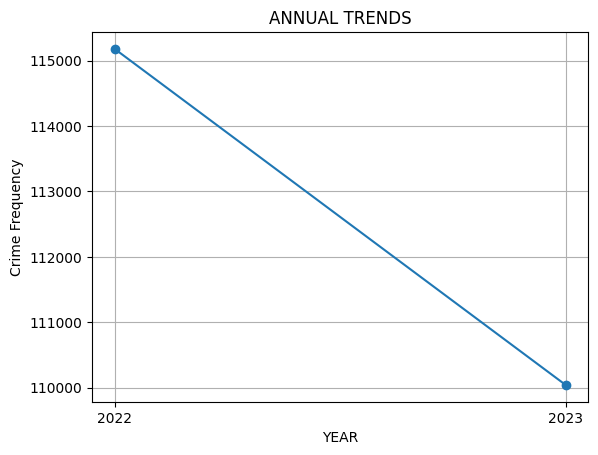

In [35]:
# Prepare variables for visualisations for Leicestershire annual trends

YearlyArray = sqlContext.sql("select Year from tbl_Leicestershire_Annual_Count")\
.rdd.map(lambda f:f[0]).collect()
YearlyCount = sqlContext.sql("select count from tbl_Leicestershire_Annual_Count")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = YearlyArray
y = YearlyCount

plt.plot(x, y, 'o-')
plt.title('ANNUAL TRENDS')
plt.ylabel('Crime Frequency')
plt.xlabel('YEAR')
plt.grid(True)
plt.savefig("Leicestershire_Annual_Count.png")
plt.show()

In [36]:
# C) Top crime types to Identify the most frequent crime categories

#Various crime types for Leicestershire

Leicestershire_CrimeTypes = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count \
from tbl_UKCrimereport \
WHERE Reported_by = 'Leicestershire Police'\
Group By Month, Crime_type")

In [37]:
Leicestershire_CrimeTypes.select("Crime_type").distinct().count()

14

In [38]:
Leicestershire_CrimeTypes.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022|  887|
|         Shoplifting|2022-11|2022|  417|
|       Bicycle theft|2023-05|2023|  116|
|Possession of wea...|2023-06|2023|   94|
|Theft from the pe...|2023-06|2023|  146|
|Possession of wea...|2022-05|2022|   95|
|Criminal damage a...|2022-07|2022|  964|
|Criminal damage a...|2022-08|2022| 1033|
|            Burglary|2023-05|2023|  412|
|         Shoplifting|2023-05|2023|  470|
|       Vehicle crime|2023-06|2023|  586|
|            Burglary|2022-07|2022|  496|
|Theft from the pe...|2022-05|2022|   72|
|         Other crime|2022-08|2022|  211|
|        Public order|2022-07|2022| 1226|
|       Vehicle crime|2022-06|2022|  555|
|         Other theft|2022-06|2022|  777|
|         Other crime|2023-05|2023|  207|
|Criminal damage a...|2022-05|2022| 1027|
|       Bicycle theft|2022-11|2022|  157|
+--------------------+-------+----

In [39]:
# Filter for only records for 2022

Leicestershire_CrimeType_2022 = Leicestershire_CrimeTypes.filter(Leicestershire_CrimeTypes["Year"] == "2022")

In [40]:
#Show result for 2022

Leicestershire_CrimeType_2022.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022|  887|
|         Shoplifting|2022-11|2022|  417|
|Possession of wea...|2022-05|2022|   95|
|Criminal damage a...|2022-07|2022|  964|
|Criminal damage a...|2022-08|2022| 1033|
|            Burglary|2022-07|2022|  496|
|Theft from the pe...|2022-05|2022|   72|
|         Other crime|2022-08|2022|  211|
|        Public order|2022-07|2022| 1226|
|       Vehicle crime|2022-06|2022|  555|
|         Other theft|2022-06|2022|  777|
|Criminal damage a...|2022-05|2022| 1027|
|       Bicycle theft|2022-11|2022|  157|
|         Other theft|2022-08|2022|  765|
|             Robbery|2022-08|2022|   76|
|         Other crime|2022-06|2022|  231|
|Criminal damage a...|2022-06|2022|  949|
|             Robbery|2022-06|2022|   57|
|            Burglary|2022-08|2022|  441|
|Criminal damage a...|2022-11|2022|  855|
+--------------------+-------+----

In [41]:
# Group by Leicestershire Crime_type and count occurrences for 2022

Leicestershire_CrimeType_for_2022 = Leicestershire_CrimeType_2022.groupBy("Crime_type").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [42]:
#Show grouped result for 2022

Leicestershire_CrimeType_for_2022.show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      44019|
|        Public order|      13766|
|Criminal damage a...|      10963|
|Anti-social behav...|       9601|
|         Other theft|       9327|
|       Vehicle crime|       7059|
|            Burglary|       5469|
|         Shoplifting|       4283|
|               Drugs|       3416|
|         Other crime|       2590|
|       Bicycle theft|       1947|
|Possession of wea...|       1037|
|Theft from the pe...|        891|
|             Robbery|        811|
+--------------------+-----------+



In [43]:
# Filter for only records for 2023

Leicestershire_CrimeType_2023  = Leicestershire_CrimeTypes.filter(Leicestershire_CrimeTypes["Year"] == "2023")

In [44]:
#Show result for 2023

Leicestershire_CrimeType_2023.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|       Bicycle theft|2023-05|2023|  116|
|Possession of wea...|2023-06|2023|   94|
|Theft from the pe...|2023-06|2023|  146|
|            Burglary|2023-05|2023|  412|
|         Shoplifting|2023-05|2023|  470|
|       Vehicle crime|2023-06|2023|  586|
|         Other crime|2023-05|2023|  207|
|         Other theft|2023-05|2023|  790|
|         Other theft|2023-06|2023|  804|
|Violence and sexu...|2023-06|2023| 3744|
|       Vehicle crime|2023-05|2023|  623|
|Anti-social behav...|2023-05|2023|  805|
|        Public order|2023-05|2023| 1163|
|         Other crime|2023-06|2023|  223|
|             Robbery|2023-06|2023|   73|
|Possession of wea...|2023-05|2023|   98|
|Violence and sexu...|2023-05|2023| 3718|
|Criminal damage a...|2023-05|2023|  961|
|               Drugs|2023-06|2023|  309|
|               Drugs|2023-05|2023|  326|
+--------------------+-------+----

In [45]:
# Group by Leicestershire Crime_type and count occurrences for 2023

Leicestershire_CrimeType_for_2023 = Leicestershire_CrimeType_2023.groupBy("Crime_type").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [46]:
#Show grouped result for 2023

Leicestershire_CrimeType_for_2023.show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      42442|
|        Public order|      11934|
|Criminal damage a...|      10448|
|         Other theft|       9121|
|Anti-social behav...|       8174|
|       Vehicle crime|       6776|
|         Shoplifting|       5930|
|            Burglary|       5056|
|               Drugs|       3528|
|         Other crime|       2387|
|       Bicycle theft|       1489|
|Possession of wea...|       1031|
|             Robbery|        872|
|Theft from the pe...|        854|
+--------------------+-----------+



In [47]:
#Registering temp table for Leicestershire Crime Types

Leicestershire_CrimeTypes.registerTempTable("tbl_Leicestershire_CrimeTypes")

In [48]:
#Using SQL Syntax to Filter for only 2022 Leicestershire Crime Type

Leicestershire_CrimeTypes_2022 = sqlContext.sql("SELECT Crime_type, \
    SUM(Count) AS Count \
    FROM tbl_Leicestershire_CrimeTypes \
    WHERE substring(Month, 1, 4) = '2022' \
    GROUP BY Crime_type \
    Order by Count Desc")

In [49]:
#Result of  2022 Leicestershire Crime Type using SQL

Leicestershire_CrimeTypes_2022.show()

+--------------------+-----+
|          Crime_type|Count|
+--------------------+-----+
|Violence and sexu...|44019|
|        Public order|13766|
|Criminal damage a...|10963|
|Anti-social behav...| 9601|
|         Other theft| 9327|
|       Vehicle crime| 7059|
|            Burglary| 5469|
|         Shoplifting| 4283|
|               Drugs| 3416|
|         Other crime| 2590|
|       Bicycle theft| 1947|
|Possession of wea...| 1037|
|Theft from the pe...|  891|
|             Robbery|  811|
+--------------------+-----+



In [50]:
#Using SQL Syntax to Filter for only 2023 Leicestershire Crime Type

Leicestershire_CrimeTypes_2023 = sqlContext.sql("SELECT Crime_type, \
    SUM(Count) AS Count \
    FROM tbl_Leicestershire_CrimeTypes \
    WHERE substring(Month, 1, 4) = '2023' \
    GROUP BY Crime_type \
    Order by Count Desc")

In [51]:
#Result of  2023 Leicestershire Crime Type using SQL

Leicestershire_CrimeTypes_2023.show()

+--------------------+-----+
|          Crime_type|Count|
+--------------------+-----+
|Violence and sexu...|42442|
|        Public order|11934|
|Criminal damage a...|10448|
|         Other theft| 9121|
|Anti-social behav...| 8174|
|       Vehicle crime| 6776|
|         Shoplifting| 5930|
|            Burglary| 5056|
|               Drugs| 3528|
|         Other crime| 2387|
|       Bicycle theft| 1489|
|Possession of wea...| 1031|
|             Robbery|  872|
|Theft from the pe...|  854|
+--------------------+-----+



In [52]:
#Creating temp table for visualisation of  Leicestershire Crime Type of 2022

Leicestershire_CrimeType_for_2022.registerTempTable("Leicestershire_2022CrimeType")
sqlContext.sql("select * from Leicestershire_2022CrimeType").show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      44019|
|        Public order|      13766|
|Criminal damage a...|      10963|
|Anti-social behav...|       9601|
|         Other theft|       9327|
|       Vehicle crime|       7059|
|            Burglary|       5469|
|         Shoplifting|       4283|
|               Drugs|       3416|
|         Other crime|       2590|
|       Bicycle theft|       1947|
|Possession of wea...|       1037|
|Theft from the pe...|        891|
|             Robbery|        811|
+--------------------+-----------+



In [53]:
#Creating temp table for visualisation of  Leicestershire Crime Type of 2023

Leicestershire_CrimeType_for_2023.registerTempTable("Leicestershire_2023CrimeType")
sqlContext.sql("select * from Leicestershire_2023CrimeType").show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      42442|
|        Public order|      11934|
|Criminal damage a...|      10448|
|         Other theft|       9121|
|Anti-social behav...|       8174|
|       Vehicle crime|       6776|
|         Shoplifting|       5930|
|            Burglary|       5056|
|               Drugs|       3528|
|         Other crime|       2387|
|       Bicycle theft|       1489|
|Possession of wea...|       1031|
|             Robbery|        872|
|Theft from the pe...|        854|
+--------------------+-----------+



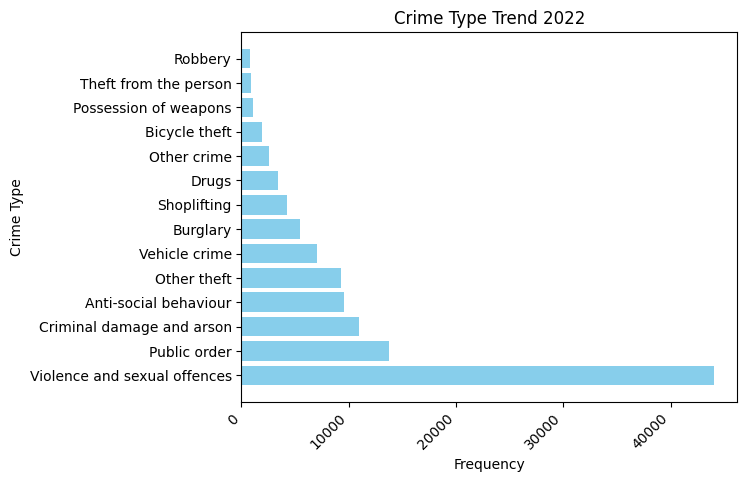

In [54]:
# Prepare variables for visualisations for Leicestershire Crime Type 2022

Crimetype = sqlContext.sql("select Crime_type from Leicestershire_2022CrimeType")\
.rdd.map(lambda f:f[0]).collect()
CrimeCount = sqlContext.sql("select Total_Count from Leicestershire_2022CrimeType")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = Crimetype
y = CrimeCount

plt.barh(x, y, color='skyblue')
plt.title('Crime Type Trend 2022')
plt.ylabel('Crime Type')
plt.xlabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig("Leicestershire_2022CrimeType.png")
plt.show()

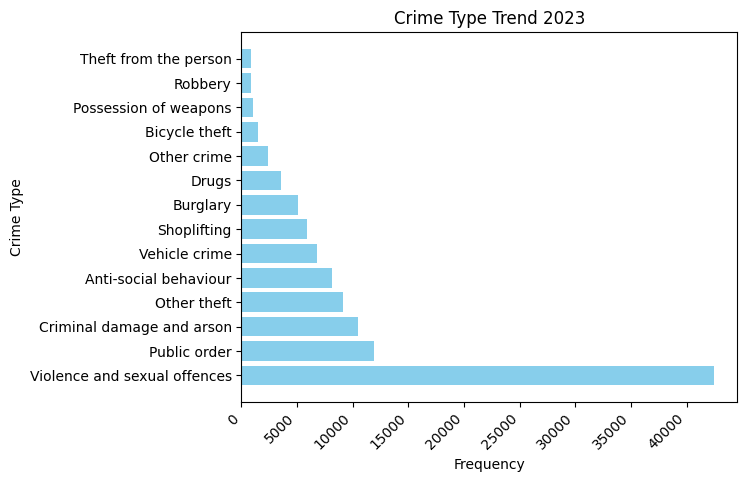

In [55]:
# Prepare variables for visualisations for Leicestershire Crime Type 2023

Crimetype = sqlContext.sql("select Crime_type from Leicestershire_2023CrimeType")\
.rdd.map(lambda f:f[0]).collect()
CrimeCount = sqlContext.sql("select Total_Count from Leicestershire_2023CrimeType")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = Crimetype
y = CrimeCount

plt.barh(x, y, color='skyblue')
plt.title('Crime Type Trend 2023')
plt.ylabel('Crime Type')
plt.xlabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig("Leicestershire_2023CrimeType.png")
plt.show()

In [56]:
# D) Location Analysis

Leicestershire_CrimeLocations = sqlContext.sql("select Location, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count \
from tbl_UKCrimereport \
WHERE Reported_by = 'Leicestershire Police'\
Group By Month, Location")

In [57]:
Leicestershire_CrimeLocations.select("Location").distinct().count()

10211

In [58]:
Leicestershire_CrimeLocations.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near Grass ...|2022-05|2022|    3|
|On or near Lord C...|2022-05|2022|    1|
|On or near Meadow...|2022-05|2022|    4|
|On or near Rosebe...|2022-05|2022|    9|
|On or near Alan M...|2022-05|2022|    2|
|On or near Tenter...|2022-05|2022|    2|
|On or near Hollow...|2022-05|2022|    3|
|On or near Hagley...|2022-05|2022|    2|
|On or near Castle...|2022-05|2022|    3|
|On or near Banky ...|2022-05|2022|    1|
|On or near Lomond...|2022-05|2022|    3|
|On or near Cromar...|2022-05|2022|    1|
|On or near Heathl...|2022-05|2022|    1|
|On or near Meadow...|2022-05|2022|    5|
|On or near Willow...|2022-05|2022|    1|
|On or near St Jam...|2022-05|2022|    1|
|On or near Aylest...|2022-05|2022|    3|
|On or near Keight...|2022-05|2022|    7|
|On or near Tamwor...|2022-05|2022|    3|
|On or near Sandhu...|2022-05|2022|    1|
+--------------------+-------+----

In [59]:
# Filter for only records for 2022

Leicestershire_CrimeLocations_2022 = Leicestershire_CrimeLocations.filter(Leicestershire_CrimeLocations["Year"] == "2022")

In [60]:
Leicestershire_CrimeLocations_2022.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near Grass ...|2022-05|2022|    3|
|On or near Lord C...|2022-05|2022|    1|
|On or near Meadow...|2022-05|2022|    4|
|On or near Rosebe...|2022-05|2022|    9|
|On or near Alan M...|2022-05|2022|    2|
|On or near Tenter...|2022-05|2022|    2|
|On or near Hollow...|2022-05|2022|    3|
|On or near Hagley...|2022-05|2022|    2|
|On or near Castle...|2022-05|2022|    3|
|On or near Banky ...|2022-05|2022|    1|
|On or near Lomond...|2022-05|2022|    3|
|On or near Cromar...|2022-05|2022|    1|
|On or near Heathl...|2022-05|2022|    1|
|On or near Meadow...|2022-05|2022|    5|
|On or near Willow...|2022-05|2022|    1|
|On or near St Jam...|2022-05|2022|    1|
|On or near Aylest...|2022-05|2022|    3|
|On or near Keight...|2022-05|2022|    7|
|On or near Tamwor...|2022-05|2022|    3|
|On or near Sandhu...|2022-05|2022|    1|
+--------------------+-------+----

In [61]:
# Group by Leicestershire Crime Location and count occurrences for 2022

Leicestershire_CrimeLocations_for_2022 = Leicestershire_CrimeLocations_2022.groupBy("Location").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [62]:
Leicestershire_CrimeLocations_for_2022.show()

+--------------------+-----------+
|            Location|Total_Count|
+--------------------+-----------+
|         On or near |       7725|
|         No Location|       3658|
|On or near Superm...|       1675|
|On or near Parkin...|       1551|
|On or near Petrol...|       1232|
|On or near Shoppi...|       1010|
|On or near Sports...|        993|
|On or near Park/O...|        579|
|On or near High S...|        439|
|On or near Main S...|        436|
|On or near Euston...|        392|
|On or near Church...|        390|
|On or near Nightclub|        371|
|On or near Granby...|        368|
|On or near Swan S...|        353|
|On or near Market...|        352|
|On or near Leices...|        327|
|On or near East G...|        269|
|On or near Ashby ...|        249|
|On or near Market...|        202|
+--------------------+-----------+
only showing top 20 rows



In [63]:
# Filter for only records for 2023

Leicestershire_CrimeLocations_2023 = Leicestershire_CrimeLocations.filter(Leicestershire_CrimeLocations["Year"] == "2023")

In [64]:
# Group by Leicestershire Crime Location and count occurrences for 2023

Leicestershire_CrimeLocations_for_2023 = Leicestershire_CrimeLocations_2023.groupBy("Location").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [65]:
Leicestershire_CrimeLocations_for_2023.show(truncate=False)

+----------------------------------------------+-----------+
|Location                                      |Total_Count|
+----------------------------------------------+-----------+
|On or near                                    |4016       |
|No Location                                   |3577       |
|On or near Supermarket                        |2947       |
|On or near Parking Area                       |2779       |
|On or near Shopping Area                      |1485       |
|On or near Petrol Station                     |1203       |
|On or near Sports/Recreation Area             |788        |
|On or near Nightclub                          |575        |
|On or near East Gates                         |568        |
|On or near Market Place                       |493        |
|On or near Euston Street                      |444        |
|On or near Further/Higher Educational Building|438        |
|On or near Church Street                      |395        |
|On or near Hill View   

**ANALYSIS ON NOTTINGHAMSHIRE CRIME DATA**

In [66]:
#Only reports from Nottinghamshire police

Nottinghamshire_Crime_Count = New_UKCrimereport.filter(col("Reported_by") == "Nottinghamshire Police")

In [67]:
Nottinghamshire_Crime_Count.count()

248169

In [68]:
Nottinghamshire_Crime_Count.show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code|        LSOA_name|          Crime_type|Last_outcome_category|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+
|58047a3a95167140d...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.347639|53.061766|On or near Regent...|E01019444|Amber Valley 003B|Violence and sexu...| Court result unav...|
|8ac857a6be54f5424...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.329102|53.024519|On or near Minkle...|E01019451|Amber Valley 012D|               Drugs| Unable to prosecu...|
|98dcb182224f03d58...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.

In [69]:
# A) Analysis Monthly Trends In Criminal Activity

#Nottinghamshire Crime amount by month 

Nottinghamshire_Crime_CountNew = Nottinghamshire_Crime_Count.groupby("Month").count().orderBy(desc("count"))

In [70]:
#Result for Nottinghamshire Crime amount by month

Nottinghamshire_Crime_CountNew.show()

+-------+-----+
|  Month|count|
+-------+-----+
|2023-05|12471|
|2022-05|12400|
|2023-06|12346|
|2022-08|11923|
|2023-07|11876|
|2022-04|11820|
|2022-03|11742|
|2023-04|11737|
|2023-03|11640|
|2023-02|10889|
|2022-11|10808|
|2022-02|10404|
|2023-11|10092|
|2022-12| 9572|
|2022-07| 9552|
|2022-10| 9508|
|2022-06| 9262|
|2023-09| 8976|
|2023-01| 8914|
|2023-08| 8838|
+-------+-----+
only showing top 20 rows



In [71]:
#Extracting both year and month from the Nottinghamshire Monthly count

Nottinghamshire_Crime_withYear = Nottinghamshire_Crime_CountNew.select("Month",
    substring("Month", 1, 4).alias("Year"),# Extract the year from 'Month'
    substring("Month", 6, 2).alias("Months"), # Extract the month from 'Month'
    "count" )  # Include the existing 'count' column

In [72]:
#Result of both year and month extracted from the Nottinghamshire Monthly count

Nottinghamshire_Crime_withYear.show()

+-------+----+------+-----+
|  Month|Year|Months|count|
+-------+----+------+-----+
|2023-05|2023|    05|12471|
|2022-05|2022|    05|12400|
|2023-06|2023|    06|12346|
|2022-08|2022|    08|11923|
|2023-07|2023|    07|11876|
|2022-04|2022|    04|11820|
|2022-03|2022|    03|11742|
|2023-04|2023|    04|11737|
|2023-03|2023|    03|11640|
|2023-02|2023|    02|10889|
|2022-11|2022|    11|10808|
|2022-02|2022|    02|10404|
|2023-11|2023|    11|10092|
|2022-12|2022|    12| 9572|
|2022-07|2022|    07| 9552|
|2022-10|2022|    10| 9508|
|2022-06|2022|    06| 9262|
|2023-09|2023|    09| 8976|
|2023-01|2023|    01| 8914|
|2023-08|2023|    08| 8838|
+-------+----+------+-----+
only showing top 20 rows



In [73]:
#Crime amount for each month in 2022

Nottinghamshire_Crime_Count_2022 = Nottinghamshire_Crime_withYear.filter(Nottinghamshire_Crime_withYear.
   Year =="2022" ). select("Year","Months", "count").orderBy("Months")

In [74]:
#Results of Crime amount for each month in 2022

Nottinghamshire_Crime_Count_2022.show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2022|    01| 8562|
|2022|    02|10404|
|2022|    03|11742|
|2022|    04|11820|
|2022|    05|12400|
|2022|    06| 9262|
|2022|    07| 9552|
|2022|    08|11923|
|2022|    09| 8597|
|2022|    10| 9508|
|2022|    11|10808|
|2022|    12| 9572|
+----+------+-----+



In [75]:
#Crime amount for each month in 2023

Nottinghamshire_Crime_Count_2023 = Nottinghamshire_Crime_withYear.filter(Nottinghamshire_Crime_withYear.
   Year =="2023" ). select("Year","Months", "count").orderBy("Months")

In [76]:
#Results of Crime amount for each month in 2023

Nottinghamshire_Crime_Count_2023.show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2023|    01| 8914|
|2023|    02|10889|
|2023|    03|11640|
|2023|    04|11737|
|2023|    05|12471|
|2023|    06|12346|
|2023|    07|11876|
|2023|    08| 8838|
|2023|    09| 8976|
|2023|    10| 8755|
|2023|    11|10092|
|2023|    12| 7485|
+----+------+-----+



In [77]:
Nottinghamshire_Crime_Count_2022.registerTempTable("Nottinghamshire_2022")
sqlContext.sql("select * from Nottinghamshire_2022").show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2022|    01| 8562|
|2022|    02|10404|
|2022|    03|11742|
|2022|    04|11820|
|2022|    05|12400|
|2022|    06| 9262|
|2022|    07| 9552|
|2022|    08|11923|
|2022|    09| 8597|
|2022|    10| 9508|
|2022|    11|10808|
|2022|    12| 9572|
+----+------+-----+



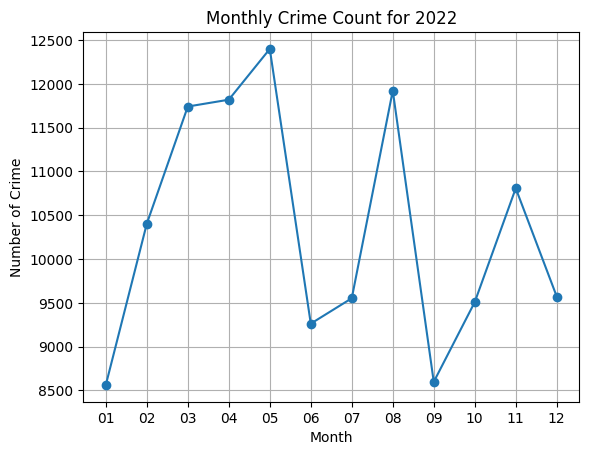

In [78]:
# Prepare variables for visualisations for Nottinghamshire Monthly Trends in 2022

monthArray = sqlContext.sql("select Months from Nottinghamshire_2022")\
.rdd.map(lambda f:f[0]).collect()
monthlyCount = sqlContext.sql("select count from Nottinghamshire_2022")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = monthArray
y = monthlyCount

plt.plot(x, y, 'o-')
plt.title('Monthly Crime Count for 2022')
plt.ylabel('Number of Crime')
plt.xlabel('Month')
plt.grid(True)
plt.savefig("Nottinghamshire2022CrimeAmount.png")
plt.show()

In [79]:
Nottinghamshire_Crime_Count_2023.registerTempTable("Nottinghamshire_2023")
sqlContext.sql("select * from Nottinghamshire_2023").show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2023|    01| 8914|
|2023|    02|10889|
|2023|    03|11640|
|2023|    04|11737|
|2023|    05|12471|
|2023|    06|12346|
|2023|    07|11876|
|2023|    08| 8838|
|2023|    09| 8976|
|2023|    10| 8755|
|2023|    11|10092|
|2023|    12| 7485|
+----+------+-----+



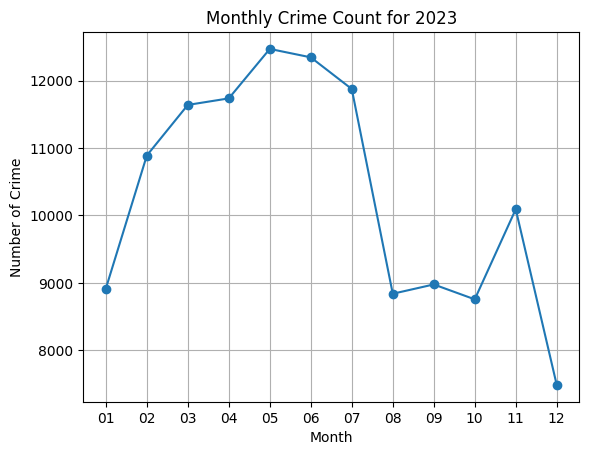

In [80]:
# Prepare variables for visualisations for Nottinghamshire Monthly Trends in 2022

monthArray = sqlContext.sql("select Months from Nottinghamshire_2023")\
.rdd.map(lambda f:f[0]).collect()
monthlyCount = sqlContext.sql("select count from Nottinghamshire_2023")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = monthArray
y = monthlyCount

plt.plot(x, y, 'o-')
plt.title('Monthly Crime Count for 2023')
plt.ylabel('Number of Crime')
plt.xlabel('Month')
plt.grid(True)
plt.savefig("Nottinghamshire2023CrimeAmount.png")
plt.show()

In [81]:
# B) Analysis by year to observe annual trends

#Nottinghamshire Crime amount by year sorted descendantly

Nottinghamshire_Annual_Count = Nottinghamshire_Crime_Count.select(substring(Nottinghamshire_Crime_Count.Month, 1,4).alias('Year'), "Month")\
.groupby("Year").count().orderBy(desc("count"))

In [82]:
Nottinghamshire_Annual_Count.show()

+----+------+
|Year| count|
+----+------+
|2022|124150|
|2023|124019|
+----+------+



In [83]:
Nottinghamshire_Annual_Count.registerTempTable("tbl_Nottinghamshire_Annual_Count")
sqlContext.sql("select * from tbl_Nottinghamshire_Annual_Count").show()

+----+------+
|Year| count|
+----+------+
|2022|124150|
|2023|124019|
+----+------+



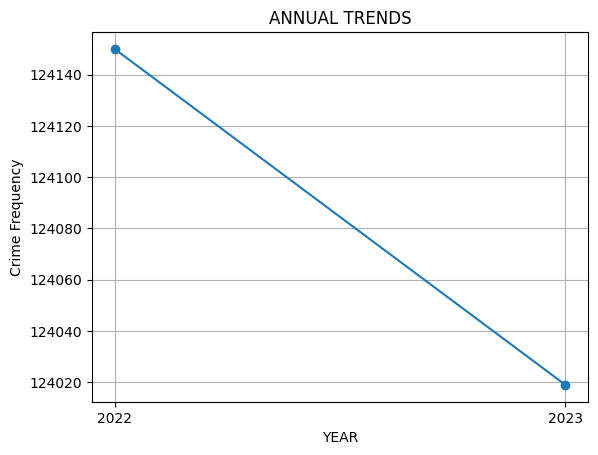

In [84]:
# Prepare variables for visualisations for Nottinghamshire annual trends

YearlyArray = sqlContext.sql("select Year from tbl_Nottinghamshire_Annual_Count")\
.rdd.map(lambda f:f[0]).collect()
YearlyCount = sqlContext.sql("select count from tbl_Nottinghamshire_Annual_Count")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = YearlyArray
y = YearlyCount

plt.plot(x, y, 'o-')
plt.title('ANNUAL TRENDS')
plt.ylabel('Crime Frequency')
plt.xlabel('YEAR')
plt.grid(True)
plt.savefig("Nottinghamshire_Annual_Count.png")
plt.show()

In [85]:
# C) Top crime types to Identify the most frequent crime categories

#Various crime types for Nottinghamshire

Nottinghamshire_CrimeTypes = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count \
from tbl_UKCrimereport \
WHERE Reported_by = 'Nottinghamshire Police'\
Group By Month, Crime_type")

In [86]:
Nottinghamshire_CrimeTypes.select("Crime_type").distinct().count()

14

In [87]:
Nottinghamshire_CrimeTypes.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022| 2662|
|       Vehicle crime|2023-02|2023|  558|
|         Shoplifting|2022-11|2022|  893|
|         Other theft|2022-02|2022|  673|
|       Bicycle theft|2023-05|2023|  110|
|Possession of wea...|2023-06|2023|  159|
|Theft from the pe...|2023-06|2023|   87|
|         Shoplifting|2023-03|2023| 1305|
|       Vehicle crime|2023-03|2023|  538|
|Possession of wea...|2022-05|2022|  110|
|        Public order|2023-03|2023|  800|
|         Shoplifting|2023-05|2023| 1297|
|            Burglary|2023-05|2023|  411|
|Criminal damage a...|2022-08|2022| 1003|
|       Vehicle crime|2023-06|2023|  401|
|Theft from the pe...|2022-05|2022|  101|
|Violence and sexu...|2022-04|2022| 3230|
|         Other crime|2022-08|2022|  238|
|            Burglary|2023-04|2023|  355|
|       Vehicle crime|2022-04|2022|  568|
+--------------------+-------+----

In [88]:
# Filter for only records for 2022

Nottinghamshire_CrimeType_2022 = Nottinghamshire_CrimeTypes.filter(Nottinghamshire_CrimeTypes["Year"] == "2022")

In [89]:
#Show result for 2022

Nottinghamshire_CrimeType_2022.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022| 2662|
|         Shoplifting|2022-11|2022|  893|
|         Other theft|2022-02|2022|  673|
|Possession of wea...|2022-05|2022|  110|
|Criminal damage a...|2022-08|2022| 1003|
|Theft from the pe...|2022-05|2022|  101|
|Violence and sexu...|2022-04|2022| 3230|
|         Other crime|2022-08|2022|  238|
|       Vehicle crime|2022-04|2022|  568|
|Criminal damage a...|2022-05|2022| 1056|
|Possession of wea...|2022-04|2022|  131|
|       Bicycle theft|2022-11|2022|  117|
|         Other theft|2022-08|2022|  800|
|             Robbery|2022-08|2022|  102|
|            Burglary|2022-08|2022|  383|
|Criminal damage a...|2022-11|2022|  978|
|               Drugs|2022-08|2022|  337|
|         Other theft|2022-11|2022|  740|
|Theft from the pe...|2022-11|2022|   72|
|Violence and sexu...|2022-11|2022| 3315|
+--------------------+-------+----

In [90]:
# Group by Nottinghamshire Crime_type and count occurrences for 2022

Nottinghamshire_CrimeType_for_2022 = Nottinghamshire_CrimeType_2022.groupBy("Crime_type").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [91]:
#Show grouped result for 2022

Nottinghamshire_CrimeType_for_2022.show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      39652|
|Anti-social behav...|      19745|
|Criminal damage a...|      11785|
|         Shoplifting|      11502|
|         Other theft|       9113|
|        Public order|       8870|
|       Vehicle crime|       6265|
|            Burglary|       5176|
|               Drugs|       3991|
|         Other crime|       3066|
|Possession of wea...|       1467|
|       Bicycle theft|       1427|
|             Robbery|       1047|
|Theft from the pe...|       1044|
+--------------------+-----------+



In [92]:
# Filter for only records for 2023

Nottinghamshire_CrimeType_2023  = Nottinghamshire_CrimeTypes.filter(Nottinghamshire_CrimeTypes["Year"] == "2023")

In [93]:
#Show result for 2023

Nottinghamshire_CrimeType_2023.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|       Vehicle crime|2023-02|2023|  558|
|       Bicycle theft|2023-05|2023|  110|
|Possession of wea...|2023-06|2023|  159|
|Theft from the pe...|2023-06|2023|   87|
|         Shoplifting|2023-03|2023| 1305|
|       Vehicle crime|2023-03|2023|  538|
|        Public order|2023-03|2023|  800|
|         Shoplifting|2023-05|2023| 1297|
|            Burglary|2023-05|2023|  411|
|       Vehicle crime|2023-06|2023|  401|
|            Burglary|2023-04|2023|  355|
|         Other crime|2023-05|2023|  266|
|             Robbery|2023-03|2023|  102|
|         Other theft|2023-05|2023|  742|
|         Other theft|2023-06|2023|  728|
|Criminal damage a...|2023-04|2023|  947|
|Violence and sexu...|2023-06|2023| 3419|
|       Vehicle crime|2023-05|2023|  494|
|               Drugs|2023-04|2023|  346|
|Anti-social behav...|2023-05|2023| 3090|
+--------------------+-------+----

In [94]:
# Group by Leicestershire Crime_type and count occurrences for 2023

Nottinghamshire_CrimeType_for_2023 = Nottinghamshire_CrimeType_2023.groupBy("Crime_type").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [95]:
#Creating temp table for visualisation of  Nottinghamshire Crime Type of 2022

Nottinghamshire_CrimeType_for_2022.registerTempTable("Nottinghamshire_2022CrimeType")
sqlContext.sql("select * from Nottinghamshire_2022CrimeType").show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      39652|
|Anti-social behav...|      19745|
|Criminal damage a...|      11785|
|         Shoplifting|      11502|
|         Other theft|       9113|
|        Public order|       8870|
|       Vehicle crime|       6265|
|            Burglary|       5176|
|               Drugs|       3991|
|         Other crime|       3066|
|Possession of wea...|       1467|
|       Bicycle theft|       1427|
|             Robbery|       1047|
|Theft from the pe...|       1044|
+--------------------+-----------+



In [96]:
#Creating temp table for visualisation of  Nottinghamshire Crime Type of 2023

Nottinghamshire_CrimeType_for_2023.registerTempTable("Nottinghamshire_2023CrimeType")
sqlContext.sql("select * from Nottinghamshire_2023CrimeType").show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      39313|
|Anti-social behav...|      18804|
|         Shoplifting|      15104|
|Criminal damage a...|      10982|
|         Other theft|       8727|
|        Public order|       8669|
|       Vehicle crime|       5872|
|            Burglary|       4527|
|               Drugs|       4081|
|         Other crime|       2900|
|Possession of wea...|       1604|
|       Bicycle theft|       1346|
|             Robbery|       1116|
|Theft from the pe...|        974|
+--------------------+-----------+



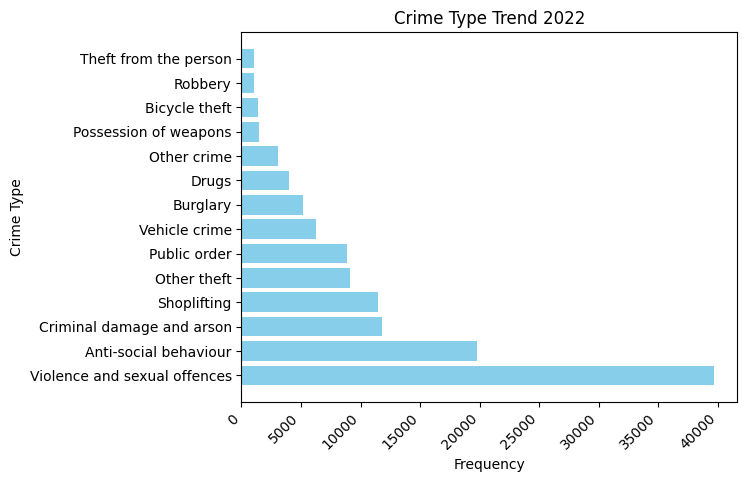

In [97]:
# Prepare variables for visualisations for Nottinghamshire Crime Type 2022

Crimetype = sqlContext.sql("select Crime_type from Nottinghamshire_2022CrimeType")\
.rdd.map(lambda f:f[0]).collect()
CrimeCount = sqlContext.sql("select Total_Count from Nottinghamshire_2022CrimeType")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = Crimetype
y = CrimeCount

plt.barh(x, y, color='skyblue')
plt.title('Crime Type Trend 2022')
plt.ylabel('Crime Type')
plt.xlabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig("Nottinghamshire_2022CrimeType.png")
plt.show()

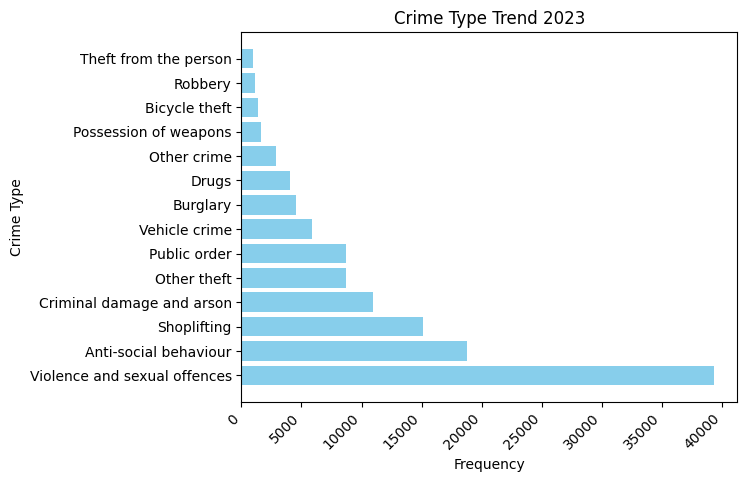

In [98]:
# Prepare variables for visualisations for Nottinghamshire Crime Type 2023

Crimetype = sqlContext.sql("select Crime_type from Nottinghamshire_2023CrimeType")\
.rdd.map(lambda f:f[0]).collect()
CrimeCount = sqlContext.sql("select Total_Count from Nottinghamshire_2023CrimeType")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = Crimetype
y = CrimeCount

plt.barh(x, y, color='skyblue')
plt.title('Crime Type Trend 2023')
plt.ylabel('Crime Type')
plt.xlabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig("Nottinghamshire_2023CrimeType.png")
plt.show()

In [99]:
# D) Location Analysis

Nottinghamshire_CrimeLocations = sqlContext.sql("select Location, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count \
from tbl_UKCrimereport \
WHERE Reported_by = 'Nottinghamshire Police'\
Group By Month, Location")

In [100]:
Nottinghamshire_CrimeLocations.select("Location").distinct().count()

11605

In [101]:
Nottinghamshire_CrimeLocations.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near Limb C...|2023-05|2023|    4|
|On or near Rosewo...|2023-05|2023|    3|
|On or near Willow...|2023-05|2023|    4|
|On or near Wilson...|2023-05|2023|    4|
|On or near Nuncar...|2023-05|2023|    4|
|    On or near B6009|2023-05|2023|    4|
|On or near Winsto...|2023-05|2023|    1|
|On or near Wessex...|2023-05|2023|    3|
|On or near Brinsl...|2023-05|2023|    6|
|On or near Ratcli...|2023-05|2023|    4|
|On or near Cedar ...|2023-05|2023|    3|
|On or near Hallam...|2023-05|2023|    1|
|On or near Trevor...|2023-05|2023|    1|
|On or near Camdal...|2023-05|2023|    2|
|On or near Southd...|2023-05|2023|    2|
|On or near Snaefe...|2023-05|2023|    1|
|On or near Epsom ...|2023-05|2023|    1|
|On or near Marrio...|2023-05|2023|    4|
|On or near Earlsw...|2023-05|2023|    1|
|On or near Northf...|2023-05|2023|    2|
+--------------------+-------+----

In [102]:
# Filter for only records for 2022

Nottinghamshire_CrimeLocations_2022 = Nottinghamshire_CrimeLocations.filter(Nottinghamshire_CrimeLocations["Year"] == "2022")

In [103]:
Nottinghamshire_CrimeLocations_2022.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near Beech ...|2022-05|2022|    8|
|On or near Spence...|2022-05|2022|    1|
|On or near Revill...|2022-05|2022|    1|
|On or near Church...|2022-05|2022|    2|
|On or near Oaklei...|2022-05|2022|    1|
|On or near Heywar...|2022-05|2022|    4|
|On or near Little...|2022-05|2022|    2|
|On or near Fritch...|2022-05|2022|    3|
|On or near Bessem...|2022-05|2022|    2|
|On or near Old Ne...|2022-05|2022|    1|
|On or near Meadow...|2022-05|2022|    1|
|On or near Nansen...|2022-05|2022|    1|
|On or near Dyce C...|2022-05|2022|    1|
|On or near Rosebe...|2022-05|2022|    1|
|On or near Vicara...|2022-05|2022|    3|
|On or near Bond S...|2022-05|2022|    3|
|On or near Hagley...|2022-05|2022|    4|
|On or near Denman...|2022-05|2022|    1|
|On or near St Jam...|2022-05|2022|    2|
|On or near Lombar...|2022-05|2022|    2|
+--------------------+-------+----

In [104]:
# Group by Nottinghamshire Crime Location and count occurrences for 2022

Nottinghamshire_CrimeLocations_for_2022 = Nottinghamshire_CrimeLocations_2022.groupBy("Location").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [105]:
Nottinghamshire_CrimeLocations_for_2022.show()

+--------------------+-----------+
|            Location|Total_Count|
+--------------------+-----------+
|         On or near |      10717|
|On or near Superm...|       2809|
|On or near Parkin...|       1985|
|On or near Shoppi...|       1743|
|On or near Petrol...|       1561|
|         No Location|       1281|
|On or near Sports...|       1276|
|On or near Nightclub|        467|
|On or near South ...|        463|
|On or near Pedest...|        451|
|On or near Furthe...|        436|
|On or near Theatr...|        362|
|On or near Main S...|        358|
|On or near Bus/Co...|        347|
|On or near Nottin...|        317|
|On or near Park/O...|        314|
|On or near High S...|        284|
|On or near Mansfi...|        280|
|On or near Church...|        276|
|On or near Wollat...|        274|
+--------------------+-----------+
only showing top 20 rows



In [106]:
# Filter for only records for 2023

Nottinghamshire_CrimeLocations_2023 = Nottinghamshire_CrimeLocations.filter(Nottinghamshire_CrimeLocations["Year"] == "2023")

In [107]:
Nottinghamshire_CrimeLocations_2023.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near Limb C...|2023-05|2023|    4|
|On or near Rosewo...|2023-05|2023|    3|
|On or near Willow...|2023-05|2023|    4|
|On or near Wilson...|2023-05|2023|    4|
|On or near Nuncar...|2023-05|2023|    4|
|    On or near B6009|2023-05|2023|    4|
|On or near Winsto...|2023-05|2023|    1|
|On or near Wessex...|2023-05|2023|    3|
|On or near Brinsl...|2023-05|2023|    6|
|On or near Ratcli...|2023-05|2023|    4|
|On or near Cedar ...|2023-05|2023|    3|
|On or near Hallam...|2023-05|2023|    1|
|On or near Trevor...|2023-05|2023|    1|
|On or near Camdal...|2023-05|2023|    2|
|On or near Southd...|2023-05|2023|    2|
|On or near Snaefe...|2023-05|2023|    1|
|On or near Epsom ...|2023-05|2023|    1|
|On or near Marrio...|2023-05|2023|    4|
|On or near Earlsw...|2023-05|2023|    1|
|On or near Northf...|2023-05|2023|    2|
+--------------------+-------+----

In [108]:
# Group by Nottinghamshire Crime Location and count occurrences for 2023

Nottinghamshire_CrimeLocations_for_2023 = Nottinghamshire_CrimeLocations_2023.groupBy("Location").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [109]:
Nottinghamshire_CrimeLocations_for_2023.show()

+--------------------+-----------+
|            Location|Total_Count|
+--------------------+-----------+
|         On or near |       7055|
|On or near Superm...|       5514|
|On or near Parkin...|       3426|
|On or near Shoppi...|       2542|
|On or near Petrol...|       2445|
|         No Location|       1039|
|On or near Sports...|        996|
|On or near Nightclub|        590|
| On or near Hospital|        413|
|On or near Maypol...|        408|
|On or near Police...|        388|
|On or near Park A...|        371|
|On or near Main S...|        364|
|On or near South ...|        354|
|On or near High S...|        336|
|On or near Clinto...|        300|
|On or near Commer...|        289|
|On or near Clumbe...|        278|
|On or near Gamsto...|        270|
|On or near Nottin...|        262|
+--------------------+-----------+
only showing top 20 rows



**ANALYSIS ON LINCOLNSHIRE CRIME DATA**

In [110]:
#Only reports from Lincolnshire police

Lincolnshire_Crime_Count = New_UKCrimereport.filter(col("Reported_by") == "Lincolnshire Police")

In [111]:
Lincolnshire_Crime_Count.count()

137938

In [112]:
Lincolnshire_Crime_Count.show()

+--------------------+-------+-------------------+-------------------+---------+---------+--------------------+---------+-----------+--------------------+---------------------+
|            Crime_ID|  Month|        Reported_by|       Falls_within|Longitude| Latitude|            Location|LSOA_code|  LSOA_name|          Crime_type|Last_outcome_category|
+--------------------+-------+-------------------+-------------------+---------+---------+--------------------+---------+-----------+--------------------+---------------------+
|679fa389f26f251e4...|2022-07|Lincolnshire Police|Lincolnshire Police| 0.068963|52.981902|On or near Upsall...|E01026007|Boston 001A|               Drugs| Court result unav...|
|c3d8d0e1b4b7e6183...|2022-07|Lincolnshire Police|Lincolnshire Police| 0.068963|52.981902|On or near Upsall...|E01026007|Boston 001A|Violence and sexu...| Unable to prosecu...|
|0e0f7a2e352f5b45a...|2022-07|Lincolnshire Police|Lincolnshire Police| 0.069737|52.981259|On or near Vinter...|E010

In [113]:
# A) Analysis Monthly Trends In Criminal Activity

#Lincolnshire Crime amount by month 

Lincolnshire_Crime_CountNew = Lincolnshire_Crime_Count.groupby("Month").count().orderBy(desc("count"))

In [114]:
#Result for #Result for Lincolnshire Crime amount by month

Lincolnshire_Crime_CountNew.show()

+-------+-----+
|  Month|count|
+-------+-----+
|2022-07| 6662|
|2022-08| 6653|
|2022-05| 6432|
|2022-06| 6163|
|2023-08| 6126|
|2022-01| 6085|
|2022-04| 6075|
|2023-04| 5938|
|2023-07| 5917|
|2022-03| 5882|
|2022-09| 5877|
|2023-06| 5865|
|2022-10| 5846|
|2023-09| 5710|
|2022-11| 5674|
|2023-10| 5637|
|2023-03| 5627|
|2023-11| 5403|
|2023-01| 5290|
|2022-02| 5263|
+-------+-----+
only showing top 20 rows



In [115]:
#Extracting both year and month from the Lincolnshire Monthly count

Lincolnshire_Crime_withYear = Lincolnshire_Crime_CountNew.select("Month",
    substring("Month", 1, 4).alias("Year"),# Extract the year from 'Month'
    substring("Month", 6, 2).alias("Months"), # Extract the month from 'Month'
    "count" )  # Include the existing 'count' column

In [116]:
#Result of both year and month extracted from the Lincolnshire Monthly count

Lincolnshire_Crime_withYear.show()

+-------+----+------+-----+
|  Month|Year|Months|count|
+-------+----+------+-----+
|2022-07|2022|    07| 6662|
|2022-08|2022|    08| 6653|
|2022-05|2022|    05| 6432|
|2022-06|2022|    06| 6163|
|2023-08|2023|    08| 6126|
|2022-01|2022|    01| 6085|
|2022-04|2022|    04| 6075|
|2023-04|2023|    04| 5938|
|2023-07|2023|    07| 5917|
|2022-03|2022|    03| 5882|
|2022-09|2022|    09| 5877|
|2023-06|2023|    06| 5865|
|2022-10|2022|    10| 5846|
|2023-09|2023|    09| 5710|
|2022-11|2022|    11| 5674|
|2023-10|2023|    10| 5637|
|2023-03|2023|    03| 5627|
|2023-11|2023|    11| 5403|
|2023-01|2023|    01| 5290|
|2022-02|2022|    02| 5263|
+-------+----+------+-----+
only showing top 20 rows



In [117]:
#Crime amount for each month in 2022

Lincolnshire_Crime_Count_2022 = Lincolnshire_Crime_withYear.filter(Lincolnshire_Crime_withYear.
   Year =="2022" ). select("Year","Months", "count").orderBy("Months")

In [118]:
#Results of Crime amount for each month in 2022

Lincolnshire_Crime_Count_2022.show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2022|    01| 6085|
|2022|    02| 5263|
|2022|    03| 5882|
|2022|    04| 6075|
|2022|    05| 6432|
|2022|    06| 6163|
|2022|    07| 6662|
|2022|    08| 6653|
|2022|    09| 5877|
|2022|    10| 5846|
|2022|    11| 5674|
|2022|    12| 5003|
+----+------+-----+



In [119]:
#Crime amount for each month in 2023

Lincolnshire_Crime_Count_2023 = Lincolnshire_Crime_withYear.filter(Lincolnshire_Crime_withYear.
   Year =="2023" ). select("Year","Months", "count").orderBy("Months")

In [120]:
#Results of Crime amount for each month in 2023

Lincolnshire_Crime_Count_2023.show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2023|    01| 5290|
|2023|    02| 5235|
|2023|    03| 5627|
|2023|    04| 5938|
|2023|    05| 4885|
|2023|    06| 5865|
|2023|    07| 5917|
|2023|    08| 6126|
|2023|    09| 5710|
|2023|    10| 5637|
|2023|    11| 5403|
|2023|    12| 4690|
+----+------+-----+



In [121]:
Lincolnshire_Crime_Count_2022.registerTempTable("Lincolnshire_2022")
sqlContext.sql("select * from Lincolnshire_2022").show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2022|    01| 6085|
|2022|    02| 5263|
|2022|    03| 5882|
|2022|    04| 6075|
|2022|    05| 6432|
|2022|    06| 6163|
|2022|    07| 6662|
|2022|    08| 6653|
|2022|    09| 5877|
|2022|    10| 5846|
|2022|    11| 5674|
|2022|    12| 5003|
+----+------+-----+



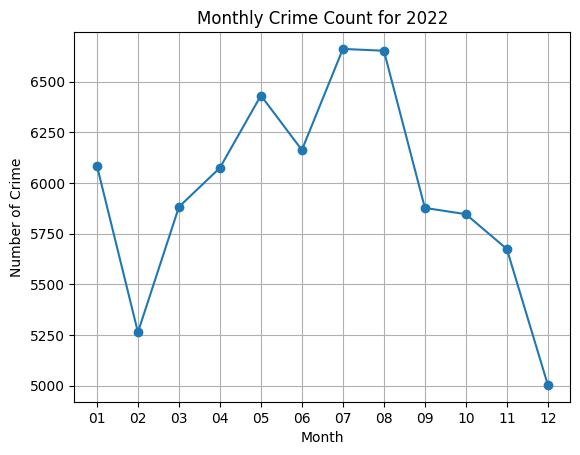

In [122]:
# Prepare variables for visualisations for Lincolnshire Monthly Trends in 2022

monthArray = sqlContext.sql("select Months from Lincolnshire_2022")\
.rdd.map(lambda f:f[0]).collect()
monthlyCount = sqlContext.sql("select count from Lincolnshire_2022")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = monthArray
y = monthlyCount

plt.plot(x, y, 'o-')
plt.title('Monthly Crime Count for 2022')
plt.ylabel('Number of Crime')
plt.xlabel('Month')
plt.grid(True)
plt.savefig("Lincolnshire2022CrimeAmount.png")
plt.show()

In [123]:
Lincolnshire_Crime_Count_2023.registerTempTable("Lincolnshire_2023")
sqlContext.sql("select * from Lincolnshire_2023").show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2023|    01| 5290|
|2023|    02| 5235|
|2023|    03| 5627|
|2023|    04| 5938|
|2023|    05| 4885|
|2023|    06| 5865|
|2023|    07| 5917|
|2023|    08| 6126|
|2023|    09| 5710|
|2023|    10| 5637|
|2023|    11| 5403|
|2023|    12| 4690|
+----+------+-----+



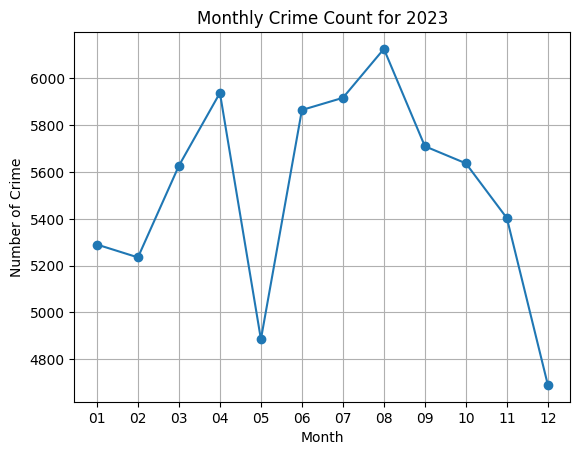

In [124]:
# Prepare variables for visualisations for Lincolnshire Monthly Trends in 2023

monthArray = sqlContext.sql("select Months from Lincolnshire_2023")\
.rdd.map(lambda f:f[0]).collect()
monthlyCount = sqlContext.sql("select count from Lincolnshire_2023")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = monthArray
y = monthlyCount

plt.plot(x, y, 'o-')
plt.title('Monthly Crime Count for 2023')
plt.ylabel('Number of Crime')
plt.xlabel('Month')
plt.grid(True)
plt.savefig("Lincolnshire2023CrimeAmount.png")
plt.show()

In [125]:
# B) Analysis by year to observe annual trends

#Lincolnshire Crime amount by year sorted descendantly

Lincolnshire_Annual_Count = Lincolnshire_Crime_Count.select(substring(Lincolnshire_Crime_Count.Month, 1,4).alias('Year'), "Month")\
.groupby("Year").count().orderBy(desc("count"))

In [126]:
Lincolnshire_Annual_Count.show()

+----+-----+
|Year|count|
+----+-----+
|2022|71615|
|2023|66323|
+----+-----+



In [127]:
Lincolnshire_Annual_Count.registerTempTable("tbl_Lincolnshire_Annual_Count")
sqlContext.sql("select * from tbl_Lincolnshire_Annual_Count").show()

+----+-----+
|Year|count|
+----+-----+
|2022|71615|
|2023|66323|
+----+-----+



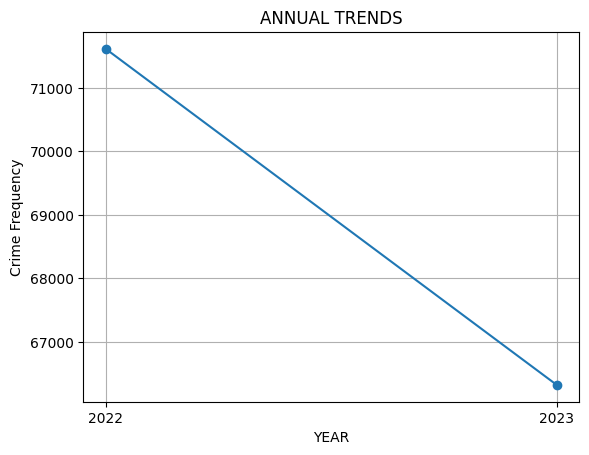

In [128]:
# Prepare variables for visualisations for Lincolnshire annual trends

YearlyArray = sqlContext.sql("select Year from tbl_Lincolnshire_Annual_Count")\
.rdd.map(lambda f:f[0]).collect()
YearlyCount = sqlContext.sql("select count from tbl_Lincolnshire_Annual_Count")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = YearlyArray
y = YearlyCount

plt.plot(x, y, 'o-')
plt.title('ANNUAL TRENDS')
plt.ylabel('Crime Frequency')
plt.xlabel('YEAR')
plt.grid(True)
plt.savefig("Lincolnshire_Annual_Count.png")
plt.show()

In [129]:
# C) Top crime types to Identify the most frequent crime categories

#Various crime types for Lincolnshire

Lincolnshire_CrimeTypes = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count \
from tbl_UKCrimereport \
WHERE Reported_by = 'Lincolnshire Police'\
Group By Month, Crime_type")

In [130]:
Lincolnshire_CrimeTypes.select("Crime_type").distinct().count()

14

In [131]:
Lincolnshire_CrimeTypes.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022| 1101|
|         Shoplifting|2022-11|2022|  487|
|Anti-social behav...|2023-10|2023|  918|
|Possession of wea...|2023-06|2023|   48|
|Theft from the pe...|2023-06|2023|   17|
|               Drugs|2023-10|2023|  133|
|       Vehicle crime|2023-03|2023|  185|
|         Shoplifting|2023-03|2023|  542|
|Possession of wea...|2022-05|2022|   51|
|Criminal damage a...|2022-07|2022|  654|
|               Drugs|2022-10|2022|  122|
|Possession of wea...|2022-10|2022|   45|
|         Other crime|2023-10|2023|  121|
|        Public order|2023-03|2023|  404|
|Criminal damage a...|2022-08|2022|  670|
|       Vehicle crime|2023-06|2023|  186|
|            Burglary|2022-07|2022|  256|
|Theft from the pe...|2022-05|2022|   11|
|Violence and sexu...|2022-04|2022| 2144|
|        Public order|2022-07|2022|  491|
+--------------------+-------+----

In [132]:
# Filter for only records for 2022

Lincolnshire_CrimeType_2022 = Lincolnshire_CrimeTypes.filter(Lincolnshire_CrimeTypes["Year"] == "2022")

In [133]:
Lincolnshire_CrimeType_2022.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022| 1101|
|         Shoplifting|2022-11|2022|  487|
|Possession of wea...|2022-05|2022|   51|
|Criminal damage a...|2022-07|2022|  654|
|               Drugs|2022-10|2022|  122|
|Possession of wea...|2022-10|2022|   45|
|Criminal damage a...|2022-08|2022|  670|
|            Burglary|2022-07|2022|  256|
|Theft from the pe...|2022-05|2022|   11|
|Violence and sexu...|2022-04|2022| 2144|
|        Public order|2022-07|2022|  491|
|         Other crime|2022-08|2022|   97|
|       Vehicle crime|2022-01|2022|  227|
|       Vehicle crime|2022-06|2022|  209|
|         Other theft|2022-06|2022|  353|
|         Shoplifting|2022-01|2022|  383|
|             Robbery|2022-01|2022|   31|
|       Vehicle crime|2022-04|2022|  229|
|Criminal damage a...|2022-05|2022|  562|
|Possession of wea...|2022-04|2022|   40|
+--------------------+-------+----

In [134]:
# Group by London Crime_type and count occurrences for 2022

Lincolnshire_CrimeType_for_2022 = Lincolnshire_CrimeType_2022.groupBy("Crime_type").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [135]:
Lincolnshire_CrimeType_for_2022.show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      26603|
|Anti-social behav...|      12470|
|Criminal damage a...|       6676|
|        Public order|       5172|
|         Shoplifting|       4990|
|         Other theft|       4763|
|            Burglary|       3405|
|       Vehicle crime|       2620|
|         Other crime|       1466|
|               Drugs|       1415|
|       Bicycle theft|        957|
|Possession of wea...|        514|
|             Robbery|        383|
|Theft from the pe...|        181|
+--------------------+-----------+



In [136]:
# Filter for only records for 2023

Lincolnshire_CrimeType_2023  = Lincolnshire_CrimeTypes.filter(Lincolnshire_CrimeTypes["Year"] == "2023")

In [137]:
Lincolnshire_CrimeType_2023.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2023-10|2023|  918|
|Possession of wea...|2023-06|2023|   48|
|Theft from the pe...|2023-06|2023|   17|
|               Drugs|2023-10|2023|  133|
|       Vehicle crime|2023-03|2023|  185|
|         Shoplifting|2023-03|2023|  542|
|         Other crime|2023-10|2023|  121|
|        Public order|2023-03|2023|  404|
|       Vehicle crime|2023-06|2023|  186|
|            Burglary|2023-04|2023|  308|
|         Other theft|2023-10|2023|  384|
|        Public order|2023-10|2023|  392|
|Anti-social behav...|2023-08|2023| 1110|
|             Robbery|2023-03|2023|   37|
|        Public order|2023-09|2023|  392|
|         Other theft|2023-06|2023|  366|
|            Burglary|2023-10|2023|  246|
|Criminal damage a...|2023-04|2023|  550|
|Violence and sexu...|2023-06|2023| 2156|
|Violence and sexu...|2023-09|2023| 2157|
+--------------------+-------+----

In [138]:
# Group by Leicestershire Crime_type and count occurrences for 2023

Lincolnshire_CrimeType_for_2023 = Lincolnshire_CrimeType_2023.groupBy("Crime_type").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [139]:
Lincolnshire_CrimeType_for_2023.show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      24586|
|Anti-social behav...|      11482|
|         Shoplifting|       5849|
|Criminal damage a...|       5705|
|         Other theft|       4434|
|        Public order|       4249|
|            Burglary|       2950|
|       Vehicle crime|       2139|
|               Drugs|       1582|
|         Other crime|       1478|
|       Bicycle theft|        719|
|Possession of wea...|        617|
|             Robbery|        375|
|Theft from the pe...|        158|
+--------------------+-----------+



In [140]:
#Creating temp table for visualisation of  Lincolnshire Crime Type of 2022

Lincolnshire_CrimeType_for_2022.registerTempTable("Lincolnshire_2022CrimeType")
sqlContext.sql("select * from Lincolnshire_2022CrimeType").show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      26603|
|Anti-social behav...|      12470|
|Criminal damage a...|       6676|
|        Public order|       5172|
|         Shoplifting|       4990|
|         Other theft|       4763|
|            Burglary|       3405|
|       Vehicle crime|       2620|
|         Other crime|       1466|
|               Drugs|       1415|
|       Bicycle theft|        957|
|Possession of wea...|        514|
|             Robbery|        383|
|Theft from the pe...|        181|
+--------------------+-----------+



In [141]:
#Creating temp table for visualisation of  Lincolnshire Crime Type of 2023

Lincolnshire_CrimeType_for_2023.registerTempTable("Lincolnshire_2023CrimeType")
sqlContext.sql("select * from Lincolnshire_2023CrimeType").show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|Violence and sexu...|      24586|
|Anti-social behav...|      11482|
|         Shoplifting|       5849|
|Criminal damage a...|       5705|
|         Other theft|       4434|
|        Public order|       4249|
|            Burglary|       2950|
|       Vehicle crime|       2139|
|               Drugs|       1582|
|         Other crime|       1478|
|       Bicycle theft|        719|
|Possession of wea...|        617|
|             Robbery|        375|
|Theft from the pe...|        158|
+--------------------+-----------+



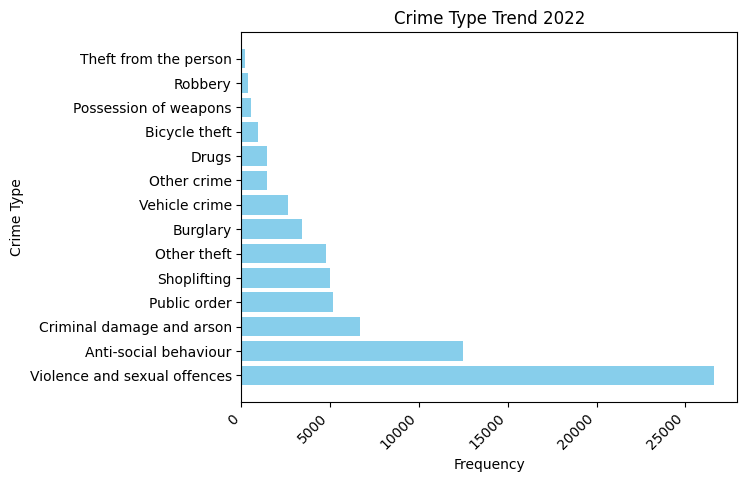

In [142]:
# Prepare variables for visualisations for Lincolnshire Crime Type 2022

Crimetype = sqlContext.sql("select Crime_type from Lincolnshire_2022CrimeType")\
.rdd.map(lambda f:f[0]).collect()
CrimeCount = sqlContext.sql("select Total_Count from Lincolnshire_2022CrimeType")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = Crimetype
y = CrimeCount

plt.barh(x, y, color='skyblue')
plt.title('Crime Type Trend 2022')
plt.ylabel('Crime Type')
plt.xlabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig("Lincolnshire_2022CrimeType.png")
plt.show()

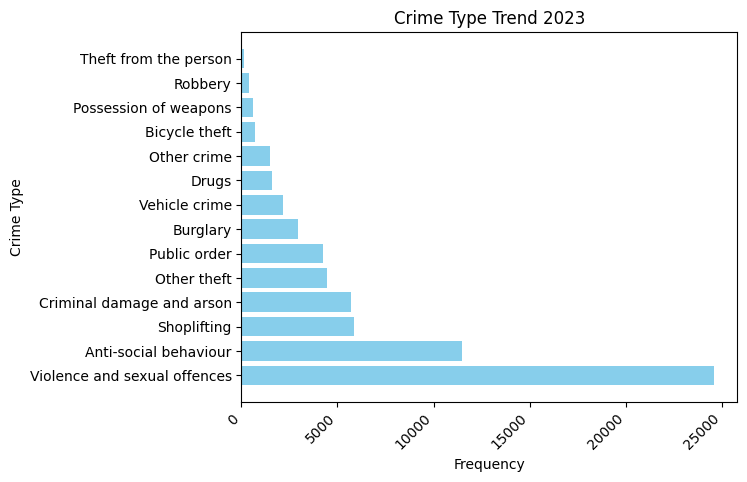

In [143]:
# Prepare variables for visualisations for Lincolnshire Crime Type 2023

Crimetype = sqlContext.sql("select Crime_type from Lincolnshire_2023CrimeType")\
.rdd.map(lambda f:f[0]).collect()
CrimeCount = sqlContext.sql("select Total_Count from Lincolnshire_2023CrimeType")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = Crimetype
y = CrimeCount

plt.barh(x, y, color='skyblue')
plt.title('Crime Type Trend 2023')
plt.ylabel('Crime Type')
plt.xlabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig("Lincolnshire_2023CrimeType.png")
plt.show()

In [144]:
# D) Location Analysis

Lincolnshire_CrimeLocations = sqlContext.sql("select Location, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count \
from tbl_UKCrimereport \
WHERE Reported_by = 'Lincolnshire Police'\
Group By Month, Location")

In [145]:
Lincolnshire_CrimeLocations.select("Location").distinct().count()

8032

In [146]:
Lincolnshire_CrimeLocations.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near St Leo...|2022-07|2022|    1|
|On or near Seedla...|2022-07|2022|    1|
|On or near St Cat...|2022-07|2022|    1|
|On or near Sycamo...|2022-07|2022|    1|
| On or near Birkdale|2022-07|2022|    1|
|On or near Winche...|2022-07|2022|    1|
|On or near Scredi...|2022-07|2022|    1|
|On or near Hilda ...|2022-07|2022|    1|
|On or near Gore Lane|2022-07|2022|    5|
|On or near Pennyg...|2022-07|2022|    1|
|On or near Shire ...|2022-07|2022|    2|
|On or near Goodli...|2022-07|2022|    1|
|On or near Falcon...|2022-07|2022|    5|
|On or near Limber...|2022-07|2022|    5|
|On or near Muster...|2022-08|2022|    1|
|On or near Friars...|2022-08|2022|    1|
|On or near Scott ...|2022-08|2022|    1|
|On or near Brayfo...|2022-08|2022|    4|
|On or near Willis...|2022-08|2022|    2|
|On or near George...|2022-08|2022|    3|
+--------------------+-------+----

In [147]:
# Filter for only records for 2022

Lincolnshire_CrimeLocations_2022 = Lincolnshire_CrimeLocations.filter(Lincolnshire_CrimeLocations["Year"] == "2022")

In [148]:
Lincolnshire_CrimeLocations_2022.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near St Leo...|2022-07|2022|    1|
|On or near Seedla...|2022-07|2022|    1|
|On or near St Cat...|2022-07|2022|    1|
|On or near Sycamo...|2022-07|2022|    1|
| On or near Birkdale|2022-07|2022|    1|
|On or near Winche...|2022-07|2022|    1|
|On or near Scredi...|2022-07|2022|    1|
|On or near Hilda ...|2022-07|2022|    1|
|On or near Gore Lane|2022-07|2022|    5|
|On or near Pennyg...|2022-07|2022|    1|
|On or near Shire ...|2022-07|2022|    2|
|On or near Goodli...|2022-07|2022|    1|
|On or near Falcon...|2022-07|2022|    5|
|On or near Limber...|2022-07|2022|    5|
|On or near Muster...|2022-08|2022|    1|
|On or near Friars...|2022-08|2022|    1|
|On or near Scott ...|2022-08|2022|    1|
|On or near Brayfo...|2022-08|2022|    4|
|On or near Willis...|2022-08|2022|    2|
|On or near George...|2022-08|2022|    3|
+--------------------+-------+----

In [149]:
# Group by Lincolnshire Crime Location and count occurrences for 2022

Lincolnshire_CrimeLocations_for_2022 = Lincolnshire_CrimeLocations_2022.groupBy("Location").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [150]:
Lincolnshire_CrimeLocations_for_2022.show()

+--------------------+-----------+
|            Location|Total_Count|
+--------------------+-----------+
|         On or near |       6151|
|On or near Superm...|       1316|
|On or near Parkin...|       1176|
|On or near Shoppi...|        945|
|On or near Sports...|        833|
|On or near Petrol...|        778|
|On or near High S...|        621|
|On or near Church...|        436|
|On or near Park/O...|        318|
|On or near Market...|        294|
|On or near Statio...|        228|
|On or near Furthe...|        225|
|On or near Nightclub|        212|
|On or near Freder...|        194|
|On or near Church...|        185|
|On or near Mill Lane|        184|
|On or near Back Lane|        177|
|On or near Lincol...|        174|
|      On or near A15|        173|
|On or near Pedest...|        170|
+--------------------+-----------+
only showing top 20 rows



In [151]:
# Filter for only records for 2023

Lincolnshire_CrimeLocations_2023 = Lincolnshire_CrimeLocations.filter(Lincolnshire_CrimeLocations["Year"] == "2023")

In [152]:
Lincolnshire_CrimeLocations_2023.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near Pilgri...|2023-08|2023|    1|
|On or near Medlam...|2023-08|2023|    1|
| On or near York Way|2023-08|2023|    1|
|On or near Swayne...|2023-08|2023|    1|
|On or near Charle...|2023-08|2023|    2|
|On or near Waterside|2023-08|2023|    1|
|On or near Double...|2023-08|2023|    1|
|On or near Shire ...|2023-08|2023|    3|
|On or near Oak Court|2023-08|2023|    2|
|On or near Croft ...|2023-08|2023|    2|
|On or near Colleg...|2023-08|2023|    1|
|On or near Mayfie...|2023-07|2023|    4|
|On or near Brambl...|2023-07|2023|    1|
|On or near Edward...|2023-07|2023|    1|
|On or near Derby ...|2023-07|2023|    1|
|On or near Occupa...|2023-07|2023|    2|
|On or near Staunt...|2023-07|2023|    3|
|On or near Elmwoo...|2023-07|2023|    1|
|On or near Pankhu...|2023-07|2023|    1|
|On or near Crease...|2023-07|2023|    4|
+--------------------+-------+----

In [153]:
# Group by Lincolnshire Crime Location and count occurrences for 2023

Lincolnshire_CrimeLocations_for_2023 = Lincolnshire_CrimeLocations_2023.groupBy("Location").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [154]:
Lincolnshire_CrimeLocations_for_2023.show()

+--------------------+-----------+
|            Location|Total_Count|
+--------------------+-----------+
|On or near Superm...|       2836|
|         On or near |       2355|
|On or near Parkin...|       2292|
|On or near Shoppi...|       1468|
|On or near Petrol...|        971|
|On or near Police...|        493|
|On or near Nightclub|        474|
|On or near Sports...|        394|
|On or near Church...|        385|
|On or near Market...|        361|
|On or near High S...|        356|
| On or near Hospital|        298|
|On or near St Mar...|        296|
|On or near Park/O...|        268|
|On or near Torr S...|        228|
|On or near Back Lane|        226|
|On or near Theatr...|        216|
|On or near South ...|        214|
|On or near Statio...|        205|
|On or near St Mar...|        197|
+--------------------+-----------+
only showing top 20 rows



# ANALYSIS ON CITY OF LONDON CRIME DATA

In [155]:
#Only reports from City of London police

London_Crime_Count = New_UKCrimereport.filter(col("Reported_by") == "City of London Police")

In [156]:
London_Crime_Count.count()

17767

In [157]:
London_Crime_Count.show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-------------------+--------------------+---------------------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code|          LSOA_name|          Crime_type|Last_outcome_category|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-------------------+--------------------+---------------------+
|7da1cbc3034fa52b3...|2023-10|City of London Po...|City of London Po...|-0.107682|51.517786|     On or near B521|E01000917|        Camden 027C|         Other theft| Investigation com...|
|83593e3ebe231adcb...|2023-10|City of London Po...|City of London Po...| -0.11035| 51.51809|  On or near Holborn|E01000917|        Camden 027C|Theft from the pe...| Investigation com...|
|3908814fff0dc54f7...|2023-10|City of London Po...|City of London

In [158]:
# A) Analysis Monthly Trends In Criminal Activity

#London Crime amount by month 

London_Crime_CountNew = London_Crime_Count.groupby("Month").count().orderBy(desc("count"))

In [159]:
London_Crime_CountNew.show()

+-------+-----+
|  Month|count|
+-------+-----+
|2023-10|  851|
|2023-11|  847|
|2023-12|  843|
|2022-07|  786|
|2022-10|  786|
|2023-09|  784|
|2022-08|  783|
|2023-02|  783|
|2023-05|  774|
|2023-08|  765|
|2023-06|  759|
|2022-11|  748|
|2023-04|  738|
|2022-12|  735|
|2023-07|  726|
|2023-01|  719|
|2022-05|  718|
|2023-03|  709|
|2022-09|  699|
|2022-06|  688|
+-------+-----+
only showing top 20 rows



In [160]:
#Extracting both year and month from the London Monthly count

London_Crime_withYear = London_Crime_CountNew.select("Month",
    substring("Month", 1, 4).alias("Year"),# Extract the year from 'Month'
    substring("Month", 6, 2).alias("Months"), # Extract the month from 'Month'
    "count" )  # Include the existing 'count' column

In [161]:
London_Crime_withYear.show()

+-------+----+------+-----+
|  Month|Year|Months|count|
+-------+----+------+-----+
|2023-10|2023|    10|  851|
|2023-11|2023|    11|  847|
|2023-12|2023|    12|  843|
|2022-07|2022|    07|  786|
|2022-10|2022|    10|  786|
|2023-09|2023|    09|  784|
|2022-08|2022|    08|  783|
|2023-02|2023|    02|  783|
|2023-05|2023|    05|  774|
|2023-08|2023|    08|  765|
|2023-06|2023|    06|  759|
|2022-11|2022|    11|  748|
|2023-04|2023|    04|  738|
|2022-12|2022|    12|  735|
|2023-07|2023|    07|  726|
|2023-01|2023|    01|  719|
|2022-05|2022|    05|  718|
|2023-03|2023|    03|  709|
|2022-09|2022|    09|  699|
|2022-06|2022|    06|  688|
+-------+----+------+-----+
only showing top 20 rows



In [162]:
#Crime amount for each month in 2022

London_Crime_Count_2022 = London_Crime_withYear.filter(London_Crime_withYear.
   Year =="2022" ). select("Year","Months", "count").orderBy("Months")

In [163]:
London_Crime_Count_2022.show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2022|    01|  593|
|2022|    02|  592|
|2022|    03|  687|
|2022|    04|  654|
|2022|    05|  718|
|2022|    06|  688|
|2022|    07|  786|
|2022|    08|  783|
|2022|    09|  699|
|2022|    10|  786|
|2022|    11|  748|
|2022|    12|  735|
+----+------+-----+



In [164]:
#Crime amount for each month in 2023

London_Crime_Count_2023 = London_Crime_withYear.filter(London_Crime_withYear.
   Year =="2023" ). select("Year","Months", "count").orderBy("Months")

In [165]:
London_Crime_Count_2023.show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2023|    01|  719|
|2023|    02|  783|
|2023|    03|  709|
|2023|    04|  738|
|2023|    05|  774|
|2023|    06|  759|
|2023|    07|  726|
|2023|    08|  765|
|2023|    09|  784|
|2023|    10|  851|
|2023|    11|  847|
|2023|    12|  843|
+----+------+-----+



In [166]:
London_Crime_Count_2022.registerTempTable("London_2022")
sqlContext.sql("select * from London_2022").show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2022|    01|  593|
|2022|    02|  592|
|2022|    03|  687|
|2022|    04|  654|
|2022|    05|  718|
|2022|    06|  688|
|2022|    07|  786|
|2022|    08|  783|
|2022|    09|  699|
|2022|    10|  786|
|2022|    11|  748|
|2022|    12|  735|
+----+------+-----+



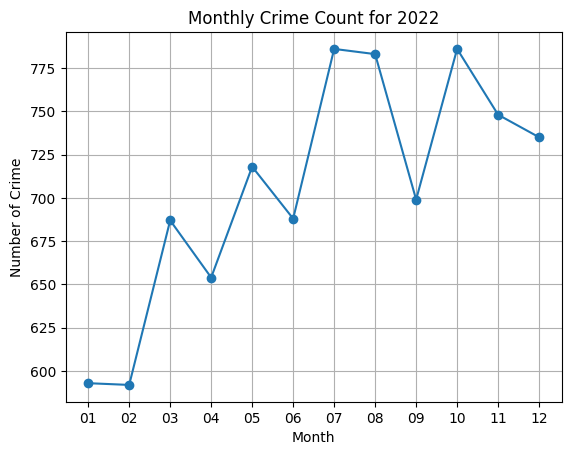

In [167]:
# Prepare variables for visualisations for London Monthly Trends in 2022

monthArray = sqlContext.sql("select Months from London_2022")\
.rdd.map(lambda f:f[0]).collect()
monthlyCount = sqlContext.sql("select count from London_2022")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = monthArray
y = monthlyCount

plt.plot(x, y, 'o-')
plt.title('Monthly Crime Count for 2022')
plt.ylabel('Number of Crime')
plt.xlabel('Month')
plt.grid(True)
plt.savefig("London2022CrimeAmount.png")
plt.show()

In [168]:
London_Crime_Count_2023.registerTempTable("London_2023")
sqlContext.sql("select * from London_2023").show()

+----+------+-----+
|Year|Months|count|
+----+------+-----+
|2023|    01|  719|
|2023|    02|  783|
|2023|    03|  709|
|2023|    04|  738|
|2023|    05|  774|
|2023|    06|  759|
|2023|    07|  726|
|2023|    08|  765|
|2023|    09|  784|
|2023|    10|  851|
|2023|    11|  847|
|2023|    12|  843|
+----+------+-----+



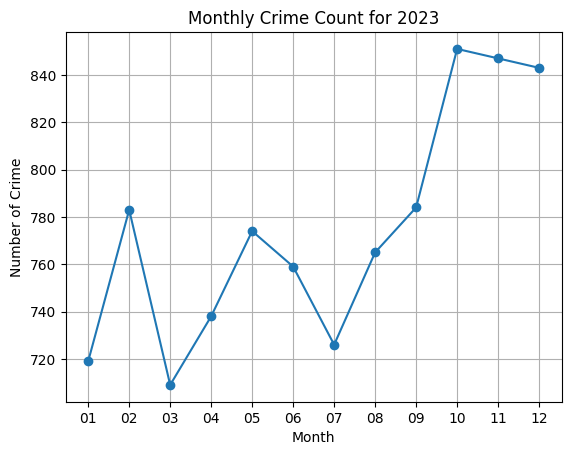

In [169]:
# Prepare variables for visualisations for London Monthly Trends in 2023

monthArray = sqlContext.sql("select Months from London_2023")\
.rdd.map(lambda f:f[0]).collect()
monthlyCount = sqlContext.sql("select count from London_2023")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = monthArray
y = monthlyCount

plt.plot(x, y, 'o-')
plt.title('Monthly Crime Count for 2023')
plt.ylabel('Number of Crime')
plt.xlabel('Month')
plt.grid(True)
plt.savefig("London2023CrimeAmount.png")
plt.show()

In [170]:
# B) Analysis by year to observe annual trends

#London Crime amount by year sorted descendantly

London_Annual_Count = London_Crime_Count.select(substring(London_Crime_Count.Month, 1,4).alias('Year'), "Month")\
.groupby("Year").count().orderBy(desc("count"))

In [171]:
London_Annual_Count.show()

+----+-----+
|Year|count|
+----+-----+
|2023| 9298|
|2022| 8469|
+----+-----+



In [172]:
London_Annual_Count.registerTempTable("London_Annual_Count")
sqlContext.sql("select * from London_Annual_Count").show()

+----+-----+
|Year|count|
+----+-----+
|2023| 9298|
|2022| 8469|
+----+-----+



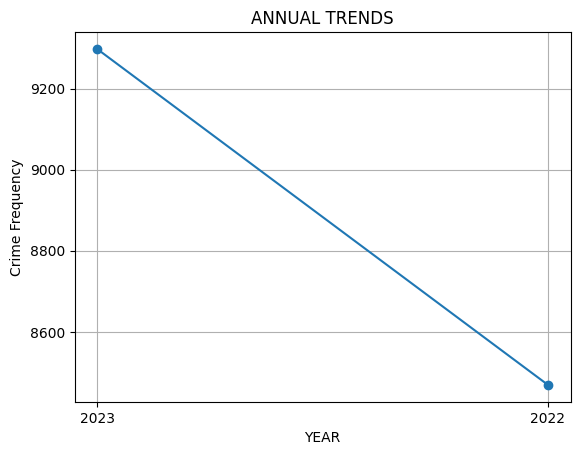

In [173]:
# Prepare variables for visualisations for London annual trends

YearlyArray = sqlContext.sql("select Year from London_Annual_Count")\
.rdd.map(lambda f:f[0]).collect()
YearlyCount = sqlContext.sql("select count from London_Annual_Count")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = YearlyArray
y = YearlyCount

plt.plot(x, y, 'o-')
plt.title('ANNUAL TRENDS')
plt.ylabel('Crime Frequency')
plt.xlabel('YEAR')
plt.grid(True)
plt.savefig("London_Annual_Count.png")
plt.show()

In [174]:
# C) Top crime types to Identify the most frequent crime categories

#Various crime types for London

London_CrimeTypes = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count \
from tbl_UKCrimereport \
WHERE Reported_by = 'City of London Police'\
Group By Month, Crime_type")

In [175]:
London_CrimeTypes.select("Crime_type").distinct().count()

14

In [176]:
London_CrimeTypes.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|       Vehicle crime|2023-02|2023|   14|
|Anti-social behav...|2022-03|2022|   71|
|         Shoplifting|2022-11|2022|   50|
|         Other theft|2022-02|2022|  134|
|Anti-social behav...|2023-10|2023|   19|
|       Bicycle theft|2023-05|2023|   26|
|Possession of wea...|2023-06|2023|    7|
|               Drugs|2023-10|2023|   58|
|Theft from the pe...|2023-06|2023|  105|
|       Vehicle crime|2023-03|2023|   16|
|         Shoplifting|2023-03|2023|   61|
|Possession of wea...|2022-05|2022|    5|
|Criminal damage a...|2023-01|2023|   22|
|         Shoplifting|2023-12|2023|   80|
|       Vehicle crime|2023-12|2023|    7|
|Criminal damage a...|2022-07|2022|   18|
|               Drugs|2022-10|2022|   34|
|Possession of wea...|2022-10|2022|    5|
|Anti-social behav...|2023-12|2023|   20|
|         Other crime|2023-10|2023|   21|
+--------------------+-------+----

In [177]:
# Filter for only records for 2022

London_CrimeType_2022 = London_CrimeTypes.filter(London_CrimeTypes["Year"] == "2022")

In [178]:
London_CrimeType_2022.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022|   71|
|         Shoplifting|2022-11|2022|   50|
|         Other theft|2022-02|2022|  134|
|Possession of wea...|2022-05|2022|    5|
|Criminal damage a...|2022-07|2022|   18|
|               Drugs|2022-10|2022|   34|
|Possession of wea...|2022-10|2022|    5|
|Criminal damage a...|2022-08|2022|   28|
|            Burglary|2022-07|2022|   18|
|Theft from the pe...|2022-05|2022|  118|
|Violence and sexu...|2022-04|2022|  110|
|         Other crime|2022-08|2022|   11|
|        Public order|2022-07|2022|   45|
|         Other theft|2022-06|2022|  129|
|       Vehicle crime|2022-06|2022|   22|
|       Vehicle crime|2022-04|2022|   24|
|        Public order|2022-12|2022|   45|
|Criminal damage a...|2022-05|2022|   24|
|Possession of wea...|2022-04|2022|    8|
|       Bicycle theft|2022-11|2022|   17|
+--------------------+-------+----

In [179]:
# Group by London Crime_type and count occurrences for 2022

London_CrimeType_for_2022 = London_CrimeType_2022.groupBy("Crime_type").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [180]:
London_CrimeType_for_2022.show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|         Other theft|       1678|
|Violence and sexu...|       1394|
|Theft from the pe...|       1372|
|Anti-social behav...|        935|
|         Shoplifting|        691|
|               Drugs|        551|
|        Public order|        496|
|            Burglary|        305|
|Criminal damage a...|        287|
|         Other crime|        201|
|       Vehicle crime|        199|
|       Bicycle theft|        182|
|             Robbery|        115|
|Possession of wea...|         63|
+--------------------+-----------+



In [181]:
# Filter for only records for 2023

London_CrimeType_2023  = London_CrimeTypes.filter(London_CrimeTypes["Year"] == "2023")

In [182]:
London_CrimeType_2023.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|       Vehicle crime|2023-02|2023|   14|
|Anti-social behav...|2023-10|2023|   19|
|       Bicycle theft|2023-05|2023|   26|
|Possession of wea...|2023-06|2023|    7|
|               Drugs|2023-10|2023|   58|
|Theft from the pe...|2023-06|2023|  105|
|       Vehicle crime|2023-03|2023|   16|
|         Shoplifting|2023-03|2023|   61|
|Criminal damage a...|2023-01|2023|   22|
|         Shoplifting|2023-12|2023|   80|
|       Vehicle crime|2023-12|2023|    7|
|Anti-social behav...|2023-12|2023|   20|
|         Other crime|2023-10|2023|   21|
|        Public order|2023-03|2023|   35|
|       Bicycle theft|2023-12|2023|   22|
|         Shoplifting|2023-05|2023|   54|
|            Burglary|2023-05|2023|   28|
|       Vehicle crime|2023-06|2023|   11|
|Theft from the pe...|2023-12|2023|  146|
|             Robbery|2023-01|2023|   13|
+--------------------+-------+----

In [183]:
# Group by London Crime_type and count occurrences for 2023

London_CrimeType_for_2023 = London_CrimeType_2023.groupBy("Crime_type").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [184]:
London_CrimeType_for_2023.show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|         Other theft|       2206|
|Violence and sexu...|       1630|
|Theft from the pe...|       1334|
|         Shoplifting|       1004|
|               Drugs|        621|
|        Public order|        599|
|Anti-social behav...|        377|
|            Burglary|        336|
|Criminal damage a...|        326|
|       Bicycle theft|        225|
|         Other crime|        214|
|             Robbery|        171|
|       Vehicle crime|        163|
|Possession of wea...|         92|
+--------------------+-----------+



In [185]:
#Creating temp table for visualisation of  London Crime Type of 2022

London_CrimeType_for_2022.registerTempTable("London_2022CrimeType")
sqlContext.sql("select * from London_2022CrimeType").show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|         Other theft|       1678|
|Violence and sexu...|       1394|
|Theft from the pe...|       1372|
|Anti-social behav...|        935|
|         Shoplifting|        691|
|               Drugs|        551|
|        Public order|        496|
|            Burglary|        305|
|Criminal damage a...|        287|
|         Other crime|        201|
|       Vehicle crime|        199|
|       Bicycle theft|        182|
|             Robbery|        115|
|Possession of wea...|         63|
+--------------------+-----------+



In [186]:
#Creating temp table for visualisation of  London Crime Type of 2023

London_CrimeType_for_2023.registerTempTable("London_2023CrimeType")
sqlContext.sql("select * from London_2023CrimeType").show()

+--------------------+-----------+
|          Crime_type|Total_Count|
+--------------------+-----------+
|         Other theft|       2206|
|Violence and sexu...|       1630|
|Theft from the pe...|       1334|
|         Shoplifting|       1004|
|               Drugs|        621|
|        Public order|        599|
|Anti-social behav...|        377|
|            Burglary|        336|
|Criminal damage a...|        326|
|       Bicycle theft|        225|
|         Other crime|        214|
|             Robbery|        171|
|       Vehicle crime|        163|
|Possession of wea...|         92|
+--------------------+-----------+



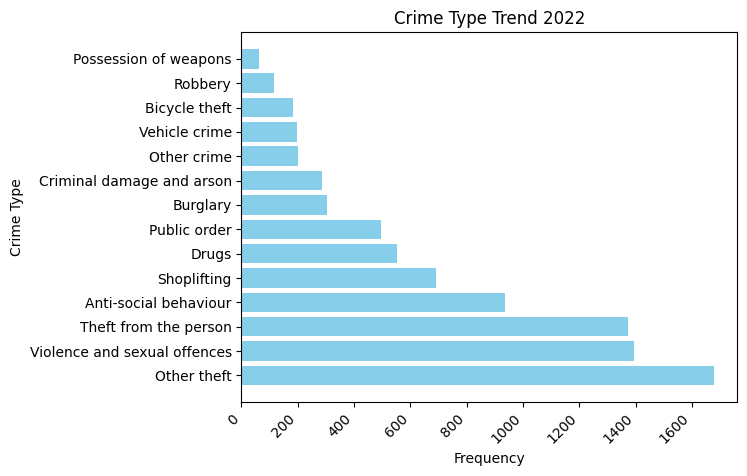

In [187]:
# Prepare variables for visualisations for London Crime Type 2022

Crimetype = sqlContext.sql("select Crime_type from London_2022CrimeType")\
.rdd.map(lambda f:f[0]).collect()
CrimeCount = sqlContext.sql("select Total_Count from London_2022CrimeType")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = Crimetype
y = CrimeCount

plt.barh(x, y, color='skyblue')
plt.title('Crime Type Trend 2022')
plt.ylabel('Crime Type')
plt.xlabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig("London_2022CrimeType.png")
plt.show()

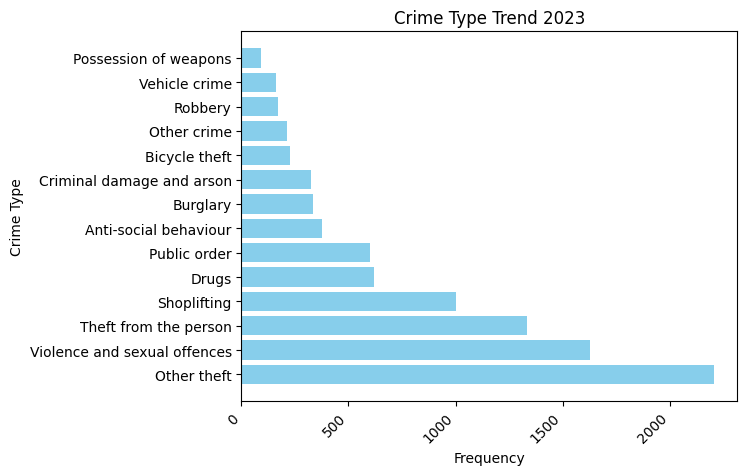

In [188]:
# Prepare variables for visualisations for London Crime Type 2023

Crimetype = sqlContext.sql("select Crime_type from London_2023CrimeType")\
.rdd.map(lambda f:f[0]).collect()
CrimeCount = sqlContext.sql("select Total_Count from London_2023CrimeType")\
.rdd.map(lambda f:f[0]).collect()


# Plot visualisations

x = Crimetype
y = CrimeCount

plt.barh(x, y, color='skyblue')
plt.title('Crime Type Trend 2023')
plt.ylabel('Crime Type')
plt.xlabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig("London_2023CrimeType.png")
plt.show()

In [189]:
# D) Location Analysis

London_CrimeLocations = sqlContext.sql("select Location, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count \
from tbl_UKCrimereport \
WHERE Reported_by = 'City of London Police'\
Group By Month, Location")

In [190]:
London_CrimeLocations.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near Wormwo...|2023-11|2023|    6|
|On or near Gravel...|2023-12|2023|    2|
|On or near Montag...|2023-12|2023|    1|
|     On or near B500|2023-09|2023|    1|
|On or near Bury C...|2022-08|2022|    4|
|On or near Colleg...|2023-08|2023|    2|
|On or near India ...|2022-07|2022|    4|
|On or near Alderm...|2023-06|2023|    2|
|On or near Silk S...|2023-06|2023|    2|
|On or near Trig Lane|2023-07|2023|    2|
|On or near Beehiv...|2023-07|2023|    1|
|On or near Beech ...|2022-03|2022|    3|
|On or near Wood S...|2022-03|2022|    6|
|On or near Hounds...|2022-03|2022|    4|
|On or near Queenh...|2022-03|2022|    1|
|On or near Tokenh...|2022-09|2022|    3|
|On or near Finch ...|2022-09|2022|    9|
|On or near Pindar...|2022-09|2022|    1|
|On or near Kingsw...|2022-09|2022|    1|
|On or near Bell I...|2022-06|2022|   15|
+--------------------+-------+----

In [191]:
London_CrimeLocations.select("Location").distinct().count()

493

In [192]:
# Filter for only records for 2022

London_CrimeLocations_2022 = London_CrimeLocations.filter(London_CrimeLocations["Year"] == "2022")

In [193]:
London_CrimeLocations_2022.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near Bury C...|2022-08|2022|    4|
|On or near India ...|2022-07|2022|    4|
|On or near Beech ...|2022-03|2022|    3|
|On or near Wood S...|2022-03|2022|    6|
|On or near Hounds...|2022-03|2022|    4|
|On or near Queenh...|2022-03|2022|    1|
|On or near Tokenh...|2022-09|2022|    3|
|On or near Finch ...|2022-09|2022|    9|
|On or near Pindar...|2022-09|2022|    1|
|On or near Kingsw...|2022-09|2022|    1|
|On or near Bell I...|2022-06|2022|   15|
|On or near Beech ...|2022-04|2022|    1|
|On or near Unders...|2022-04|2022|    1|
|On or near Stewar...|2022-02|2022|    1|
|On or near Cooper...|2022-08|2022|    5|
|On or near Braham...|2022-07|2022|    2|
|On or near Goswel...|2022-10|2022|    1|
|On or near Printi...|2022-10|2022|    1|
|On or near New Fe...|2022-05|2022|    2|
|On or near St Cla...|2022-03|2022|    1|
+--------------------+-------+----

In [194]:
# Group by London Crime Location and count occurrences for 2022

London_CrimeLocations_for_2022 = London_CrimeLocations_2022.groupBy("Location").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [195]:
London_CrimeLocations_for_2022.show()

+--------------------+-----------+
|            Location|Total_Count|
+--------------------+-----------+
|         On or near |        671|
|         No Location|        561|
|On or near Bishop...|        203|
|On or near Superm...|        189|
|On or near Liverp...|        178|
|On or near Parkin...|        138|
|On or near Alderm...|        134|
|On or near Police...|        127|
|On or near Victor...|        116|
| On or near Moorgate|        109|
|On or near New St...|        101|
|On or near Watlin...|         94|
|On or near Finch ...|         94|
|On or near Bell I...|         91|
|On or near Pedest...|         85|
|On or near Eastcheap|         84|
|On or near Pancra...|         84|
|On or near Little...|         83|
|On or near Wormwo...|         79|
|On or near Cannon...|         77|
+--------------------+-----------+
only showing top 20 rows



In [196]:
# Filter for only records for 2023

London_CrimeLocations_2023 = London_CrimeLocations.filter(London_CrimeLocations["Year"] == "2023")

In [197]:
London_CrimeLocations_2023.show()

+--------------------+-------+----+-----+
|            Location|  Month|Year|Count|
+--------------------+-------+----+-----+
|On or near Wormwo...|2023-11|2023|    6|
|On or near Gravel...|2023-12|2023|    2|
|On or near Montag...|2023-12|2023|    1|
|     On or near B500|2023-09|2023|    1|
|On or near Colleg...|2023-08|2023|    2|
|On or near Alderm...|2023-06|2023|    2|
|On or near Silk S...|2023-06|2023|    2|
|On or near Trig Lane|2023-07|2023|    2|
|On or near Beehiv...|2023-07|2023|    1|
|On or near Harrow...|2023-11|2023|    1|
|On or near Hosier...|2023-11|2023|    3|
|On or near Beech ...|2023-05|2023|    1|
|On or near Tokenh...|2023-06|2023|    3|
|On or near Norton...|2023-02|2023|    2|
|On or near Talbot...|2023-02|2023|    2|
|On or near Ferry ...|2023-04|2023|    3|
|On or near Cooper...|2023-07|2023|    2|
|On or near London...|2023-03|2023|   11|
|On or near St And...|2023-10|2023|    1|
|On or near Boroug...|2023-11|2023|    1|
+--------------------+-------+----

In [198]:
# Group by London Crime Location and count occurrences for 2023

London_CrimeLocations_for_2023 = London_CrimeLocations_2023.groupBy("Location").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [199]:
London_CrimeLocations_for_2023.show()

+--------------------+-----------+
|            Location|Total_Count|
+--------------------+-----------+
|         No Location|        797|
|On or near Shoppi...|        424|
|On or near Bishop...|        368|
|         On or near |        353|
|On or near Liverp...|        264|
|On or near Victor...|        264|
|On or near Superm...|        194|
|On or near Confer...|        152|
|On or near Pancra...|        147|
|On or near New St...|        147|
|On or near Circus...|        136|
|On or near Finch ...|        129|
|On or near Little...|        129|
| On or near Moorgate|        127|
|On or near Wormwo...|        126|
|On or near Corbet...|        122|
|On or near London...|        119|
|On or near Amen C...|        117|
|On or near Cannon...|        114|
|On or near Great ...|        113|
+--------------------+-----------+
only showing top 20 rows



**COMPARING THE FOUR CITIES**

In [200]:
# Extract year and month from the date column (assuming column name is 'Month')
Uk_crimedata = New_UKCrimereport.withColumn("Year", year(col("Month"))).withColumn("MonthNum", month(col("Month")))

In [201]:
Uk_crimedata.show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+----+--------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code|        LSOA_name|          Crime_type|Last_outcome_category|Year|MonthNum|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+-----------------+--------------------+---------------------+----+--------+
|58047a3a95167140d...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.347639|53.061766|On or near Regent...|E01019444|Amber Valley 003B|Violence and sexu...| Court result unav...|2023|       5|
|8ac857a6be54f5424...|2023-05|Nottinghamshire P...|Nottinghamshire P...|-1.329102|53.024519|On or near Minkle...|E01019451|Amber Valley 012D|               Drugs| Unable to prosecu...|2023|       5|
|98dc

In [202]:
Uk_crime_counts = Uk_crimedata.groupBy("Reported_by", "Year", "MonthNum").agg(count("*").alias("CrimeCount"))

In [203]:
Uk_crime_counts.show()

+--------------------+----+--------+----------+
|         Reported_by|Year|MonthNum|CrimeCount|
+--------------------+----+--------+----------+
|Leicestershire Po...|2022|       7|     10056|
|Leicestershire Po...|2022|      11|      9816|
|Nottinghamshire P...|2023|       5|     12471|
|Leicestershire Po...|2022|       6|      9980|
|Nottinghamshire P...|2022|       5|     12400|
|Leicestershire Po...|2022|       3|     10019|
|Nottinghamshire P...|2022|      11|     10808|
|Leicestershire Po...|2023|       6|      9760|
|Leicestershire Po...|2022|       5|     10332|
|Nottinghamshire P...|2023|       6|     12346|
|Nottinghamshire P...|2022|       4|     11820|
|Leicestershire Po...|2023|       5|      9835|
|Nottinghamshire P...|2022|       3|     11742|
|Leicestershire Po...|2022|       8|     10373|
|Nottinghamshire P...|2023|       4|     11737|
|Nottinghamshire P...|2022|       8|     11923|
|Nottinghamshire P...|2023|       7|     11876|
|Nottinghamshire P...|2023|       3|    

In [204]:
#Compare cities in 2022
Uk_crime_counts_2022 = Uk_crime_counts.filter(col("Year") == 2022)

In [205]:
Uk_crime_counts_2022.show()

+--------------------+----+--------+----------+
|         Reported_by|Year|MonthNum|CrimeCount|
+--------------------+----+--------+----------+
|Leicestershire Po...|2022|       7|     10056|
|Leicestershire Po...|2022|      11|      9816|
|Leicestershire Po...|2022|       6|      9980|
|Nottinghamshire P...|2022|       5|     12400|
|Leicestershire Po...|2022|       3|     10019|
|Nottinghamshire P...|2022|      11|     10808|
|Leicestershire Po...|2022|       5|     10332|
|Nottinghamshire P...|2022|       4|     11820|
|Nottinghamshire P...|2022|       3|     11742|
|Leicestershire Po...|2022|       8|     10373|
|Nottinghamshire P...|2022|       8|     11923|
|Nottinghamshire P...|2022|       2|     10404|
|Nottinghamshire P...|2022|       1|      8562|
|Leicestershire Po...|2022|      10|      9802|
|Nottinghamshire P...|2022|      12|      9572|
|Leicestershire Po...|2022|       4|      9494|
|Nottinghamshire P...|2022|       6|      9262|
|Nottinghamshire P...|2022|       7|    

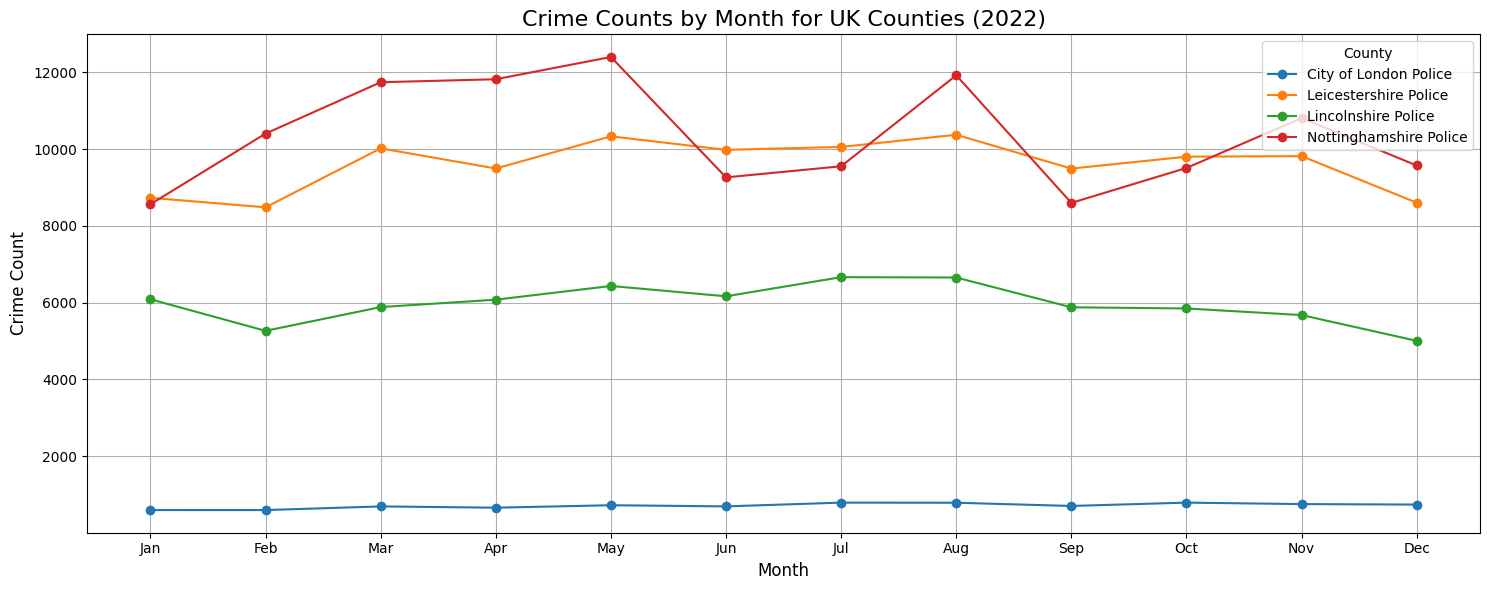

In [206]:
#Visualisation of the Four counties in year 2022

# Convert PySpark DataFrame to Pandas DataFrame
uk_crime_pd = Uk_crime_counts_2022.toPandas()

# Rename columns for easier handling
uk_crime_pd.rename(columns={'Reported_by': 'County'}, inplace=True)

# Create a pivot table for better visualization
pivot_table = uk_crime_pd.pivot(index='MonthNum', columns='County', values='CrimeCount')

# Plot the data
pivot_table.plot(kind='line', figsize=(15, 6), marker='o')

# Customize the plot
plt.title("Crime Counts by Month for UK Counties (2022)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)
plt.legend(title="County", loc='upper right', fontsize=10)
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.tight_layout()
plt.savefig("Counties_2022Crime_Counts.png")

# Show the plot
plt.show()

In [207]:
#Compare cities in 2023
Uk_crime_counts_2023 = Uk_crime_counts.filter(col("Year") == 2023)

In [208]:
Uk_crime_counts_2023.show()

+--------------------+----+--------+----------+
|         Reported_by|Year|MonthNum|CrimeCount|
+--------------------+----+--------+----------+
|Nottinghamshire P...|2023|       5|     12471|
|Leicestershire Po...|2023|       6|      9760|
|Nottinghamshire P...|2023|       6|     12346|
|Leicestershire Po...|2023|       5|      9835|
|Nottinghamshire P...|2023|       4|     11737|
|Nottinghamshire P...|2023|       7|     11876|
|Nottinghamshire P...|2023|       3|     11640|
|Nottinghamshire P...|2023|       2|     10889|
|Leicestershire Po...|2023|      10|      9102|
|Nottinghamshire P...|2023|      11|     10092|
|Leicestershire Po...|2023|       8|      9294|
|Leicestershire Po...|2023|       2|      8793|
|Leicestershire Po...|2023|       7|      9221|
|Nottinghamshire P...|2023|       8|      8838|
|Nottinghamshire P...|2023|       1|      8914|
|Leicestershire Po...|2023|       4|      9595|
|Leicestershire Po...|2023|       9|      9250|
|Leicestershire Po...|2023|       3|    

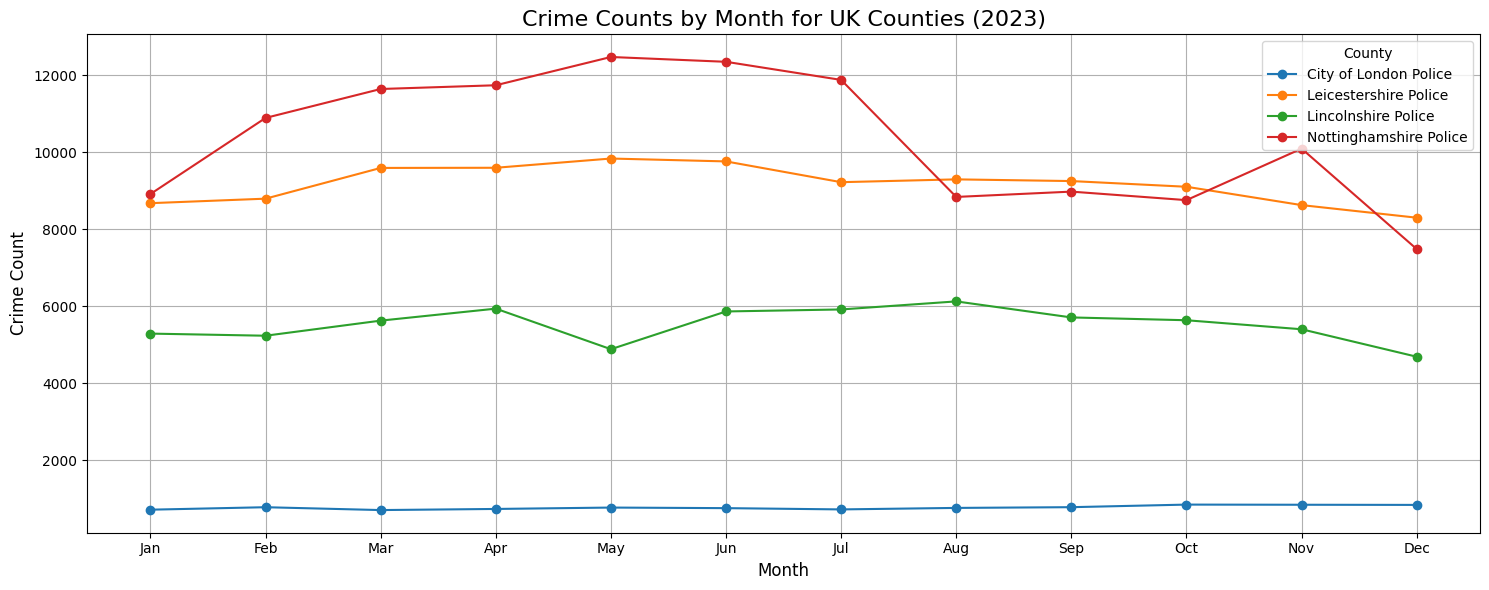

In [209]:
#Visualisation of the Four counties in year 2023

# Convert PySpark DataFrame to Pandas DataFrame
uk_crime_pd = Uk_crime_counts_2023.toPandas()

# Rename columns for easier handling
uk_crime_pd.rename(columns={'Reported_by': 'County'}, inplace=True)

# Create a pivot table for better visualization
pivot_table = uk_crime_pd.pivot(index='MonthNum', columns='County', values='CrimeCount')

# Plot the data
pivot_table.plot(kind='line', figsize=(15, 6), marker='o')

# Customize the plot
plt.title("Crime Counts by Month for UK Counties (2023)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)
plt.legend(title="County", loc='upper right', fontsize=10)
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.tight_layout()
plt.savefig("Counties_2023Crime_Counts.png")

# Show the plot
plt.show()

In [210]:
#register temp tables

New_UKCrimereport.registerTempTable("tbl_UKCrimereport")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [211]:
# Explore Crime Types per year/month

CrimeTypes = sqlContext.sql("select Reported_by, Crime_type, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count from tbl_UKCrimereport group by Reported_by, Month, Crime_type")

In [212]:
CrimeTypes.show()

+--------------------+--------------------+-------+----+-----+
|         Reported_by|          Crime_type|  Month|Year|Count|
+--------------------+--------------------+-------+----+-----+
|Leicestershire Po...|         Shoplifting|2022-11|2022|  417|
|Nottinghamshire P...|            Burglary|2022-08|2022|  383|
|Nottinghamshire P...|Criminal damage a...|2023-05|2023| 1041|
|Nottinghamshire P...|            Burglary|2022-04|2022|  435|
|Leicestershire Po...|Violence and sexu...|2022-11|2022| 3799|
|Leicestershire Po...|         Other crime|2023-06|2023|  223|
|Nottinghamshire P...|Violence and sexu...|2022-04|2022| 3230|
|Nottinghamshire P...|         Other crime|2022-08|2022|  238|
|Leicestershire Po...|       Bicycle theft|2022-05|2022|  205|
|Nottinghamshire P...|            Burglary|2023-03|2023|  369|
|Leicestershire Po...|       Vehicle crime|2022-11|2022|  603|
|Leicestershire Po...|            Burglary|2022-03|2022|  482|
|Leicestershire Po...|            Burglary|2022-11|2022

In [213]:
Crime_Types = CrimeTypes.withColumn("Year", year(col("Month"))).withColumn("MonthNum", month(col("Month")))

In [214]:
Crime_Types.show()

+--------------------+--------------------+-------+----+-----+--------+
|         Reported_by|          Crime_type|  Month|Year|Count|MonthNum|
+--------------------+--------------------+-------+----+-----+--------+
|Leicestershire Po...|         Shoplifting|2022-11|2022|  417|      11|
|Nottinghamshire P...|            Burglary|2022-08|2022|  383|       8|
|Nottinghamshire P...|Criminal damage a...|2023-05|2023| 1041|       5|
|Nottinghamshire P...|            Burglary|2022-04|2022|  435|       4|
|Leicestershire Po...|Violence and sexu...|2022-11|2022| 3799|      11|
|Leicestershire Po...|         Other crime|2023-06|2023|  223|       6|
|Nottinghamshire P...|Violence and sexu...|2022-04|2022| 3230|       4|
|Nottinghamshire P...|         Other crime|2022-08|2022|  238|       8|
|Leicestershire Po...|       Bicycle theft|2022-05|2022|  205|       5|
|Nottinghamshire P...|            Burglary|2023-03|2023|  369|       3|
|Leicestershire Po...|       Vehicle crime|2022-11|2022|  603|  

In [215]:
# Filter for only records for 2022

Crime_Types_2022 = Crime_Types.filter(Crime_Types["Year"] == "2022")

In [216]:
Crime_Types_2022.show()

+--------------------+--------------------+-------+----+-----+--------+
|         Reported_by|          Crime_type|  Month|Year|Count|MonthNum|
+--------------------+--------------------+-------+----+-----+--------+
|Leicestershire Po...|         Shoplifting|2022-11|2022|  417|      11|
|Nottinghamshire P...|            Burglary|2022-08|2022|  383|       8|
|Nottinghamshire P...|            Burglary|2022-04|2022|  435|       4|
|Leicestershire Po...|Violence and sexu...|2022-11|2022| 3799|      11|
|Nottinghamshire P...|Violence and sexu...|2022-04|2022| 3230|       4|
|Nottinghamshire P...|         Other crime|2022-08|2022|  238|       8|
|Leicestershire Po...|       Bicycle theft|2022-05|2022|  205|       5|
|Leicestershire Po...|       Vehicle crime|2022-11|2022|  603|      11|
|Leicestershire Po...|            Burglary|2022-03|2022|  482|       3|
|Leicestershire Po...|            Burglary|2022-11|2022|  521|      11|
|Nottinghamshire P...|Criminal damage a...|2022-08|2022| 1003|  

In [217]:
# Group by Crime_type and count occurrences for 2022

Crime_Types_for_2022 = Crime_Types_2022.groupBy("Reported_by", "MonthNum", "Crime_type").sum("Count") \
.withColumnRenamed("sum(Count)", "Total_Count").orderBy(desc("Total_Count"))

In [218]:
Crime_Types_for_2022.show()

+--------------------+--------+--------------------+-----------+
|         Reported_by|MonthNum|          Crime_type|Total_Count|
+--------------------+--------+--------------------+-----------+
|Leicestershire Po...|       5|Violence and sexu...|       3942|
|Leicestershire Po...|       8|Violence and sexu...|       3877|
|Leicestershire Po...|       3|Violence and sexu...|       3854|
|Leicestershire Po...|       6|Violence and sexu...|       3853|
|Leicestershire Po...|      11|Violence and sexu...|       3799|
|Leicestershire Po...|      10|Violence and sexu...|       3733|
|Leicestershire Po...|       9|Violence and sexu...|       3676|
|Leicestershire Po...|       7|Violence and sexu...|       3662|
|Nottinghamshire P...|       7|Violence and sexu...|       3565|
|Nottinghamshire P...|       5|Violence and sexu...|       3539|
|Leicestershire Po...|       4|Violence and sexu...|       3491|
|Leicestershire Po...|      12|Violence and sexu...|       3455|
|Nottinghamshire P...|   

In [219]:
#Creating temp table for visualisation of  UK Counties Crime Type in 2022

Crime_Types_for_2022.registerTempTable("UKCounties_2022CrimeType")
sqlContext.sql("select * from UKCounties_2022CrimeType").show()

+--------------------+--------+--------------------+-----------+
|         Reported_by|MonthNum|          Crime_type|Total_Count|
+--------------------+--------+--------------------+-----------+
|Leicestershire Po...|       5|Violence and sexu...|       3942|
|Leicestershire Po...|       8|Violence and sexu...|       3877|
|Leicestershire Po...|       3|Violence and sexu...|       3854|
|Leicestershire Po...|       6|Violence and sexu...|       3853|
|Leicestershire Po...|      11|Violence and sexu...|       3799|
|Leicestershire Po...|      10|Violence and sexu...|       3733|
|Leicestershire Po...|       9|Violence and sexu...|       3676|
|Leicestershire Po...|       7|Violence and sexu...|       3662|
|Nottinghamshire P...|       7|Violence and sexu...|       3565|
|Nottinghamshire P...|       5|Violence and sexu...|       3539|
|Leicestershire Po...|       4|Violence and sexu...|       3491|
|Leicestershire Po...|      12|Violence and sexu...|       3455|
|Nottinghamshire P...|   

# TITANIC REPORT

#  Load the Dataset

In [220]:
Titanic_data = pd.read_csv('/kaggle/input/titani-report/TitanicData1 (1).csv')

# Step 1: Explore and Visualize

In [221]:
print(Titanic_data.shape)

(891, 12)


In [222]:
print(Titanic_data.head(10))
print(Titanic_data.info())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   
5            6       3                                   Moran, Mr. James   
6            7       1                            McCarthy, Mr. Timothy J   
7            8       3                     Palsson, Master. Gosta Leonard   
8            9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           10       2                Nasser, Mrs. Nicholas (Adele Achem)   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1 

In [223]:
Titanic_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

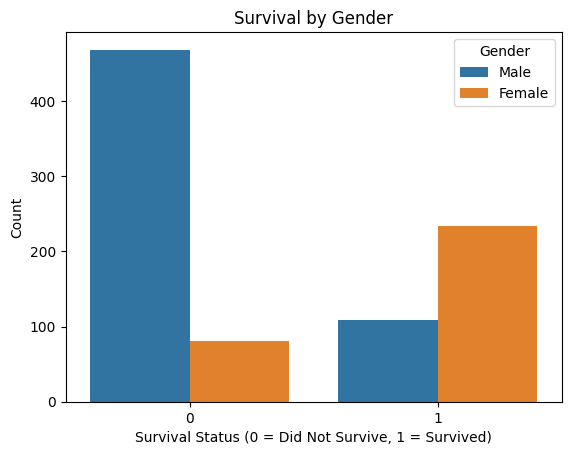

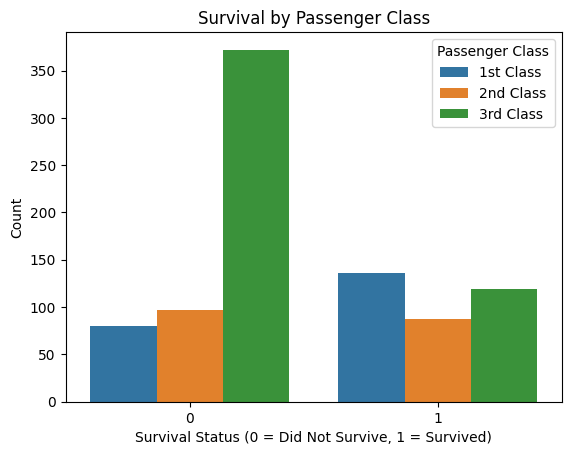

In [224]:
#Visualize survival rates

import seaborn as sns
import matplotlib.pyplot as plt

# Survival by gender
sns.countplot(data=Titanic_data, x='Survived', hue='Sex')
plt.title('Survival by Gender')
plt.xlabel('Survival Status (0 = Did Not Survive, 1 = Survived)')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

# Survival by class
sns.countplot(data=Titanic_data, x='Survived', hue='Pclass')
plt.title('Survival by Passenger Class')
plt.xlabel('Survival Status (0 = Did Not Survive, 1 = Survived)')
plt.ylabel('Count')
plt.legend(title='Passenger Class', labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

# Step 2: Feature Extraction and Preprocessing

In [225]:
 #convert ‘Sex’ data using the rule: male1, female0
Titanic_data['Sex'] = Titanic_data['Sex'].map( {'male':1,'female':0} )

In [226]:
#convert ‘Embarked’ data using the rule: Q2, S1, C0
Titanic_data['Embarked'] = Titanic_data['Embarked'].map( {'Q':2,'S':1,'C':0} )

In [227]:
#fill in the missing value in ‘Embarked’ with mean value of Embarked
Titanic_data['Embarked'] = Titanic_data['Embarked'].fillna(Titanic_data['Embarked'].mean())


In [228]:
# Fill missing values for 'Age' with median
Titanic_data['Age'].fillna(Titanic_data['Age'].mean(), inplace=True)

/tmp/ipykernel_24/492990858.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic_data['Age'].fillna(Titanic_data['Age'].mean(), inplace=True)


In [229]:
# Fill missing values for 'Cabin' with 'Unknown'
Titanic_data['Cabin'] = Titanic_data['Cabin'].fillna('Unknown')

In [230]:
print(Titanic_data.info())
Titanic_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    float64
 11  Survived     891 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB
None


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [231]:
New_Titanic_data= Titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [232]:
print(type(New_Titanic_data))

<class 'pandas.core.frame.DataFrame'>


In [233]:
print(New_Titanic_data.dtypes)

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
Survived      int64
dtype: object


In [234]:
# import libraries
from pyspark.ml.feature import Tokenizer,StopWordsRemover, CountVectorizer,IDF,StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector

In [235]:
from pyspark.ml import Pipeline

# Define stages of the pipeline
label_indexer = StringIndexer(inputCol="Survived", outputCol="label")
sex_indexer = StringIndexer(inputCol="Sex", outputCol="Sex_Index")
embarked_indexer = StringIndexer(inputCol="Embarked", outputCol="Embarked_Index")

# Define the VectorAssembler
assembler = VectorAssembler(inputCols=["Pclass", "Sex_Index", "Age", "SibSp", "Parch", "Fare", "Embarked_Index"], 
                            outputCol="features")

# Build the pipeline with all stages
Titanic_data_prep_pipe = Pipeline(stages=[label_indexer, sex_indexer, embarked_indexer, assembler])

Convert Titanic Data from pandas to pyspark

In [236]:
print(type(New_Titanic_data))

<class 'pandas.core.frame.DataFrame'>


In [237]:
from pyspark.sql import types as T

# Define a schema for the PySpark DataFrame if necessary
schema = T.StructType([
    T.StructField("Pclass", T.IntegerType(), True),
    T.StructField("Sex", T.IntegerType(), True),
    T.StructField("Age", T.FloatType(), True),
    T.StructField("SibSp", T.IntegerType(), True),
    T.StructField("Parch", T.IntegerType(), True),
    T.StructField("Fare", T.FloatType(), True),
    T.StructField("Embarked", T.FloatType(), True),
    T.StructField("Survived", T.IntegerType(), True)
])

# Create the PySpark DataFrame with schema
NewPi_Titanic_data = spark.createDataFrame(New_Titanic_data, schema)

In [238]:
print(type(NewPi_Titanic_data))

<class 'pyspark.sql.dataframe.DataFrame'>


In [239]:
# Fit the pipeline to the dataset
model = Titanic_data_prep_pipe.fit(NewPi_Titanic_data)

# Apply transformations to the data
cleaned_Titanic_data = model.transform(NewPi_Titanic_data)

# Show the transformed data
cleaned_Titanic_data.show()

+------+---+---------+-----+-----+-------+--------+--------+-----+---------+--------------+--------------------+
|Pclass|Sex|      Age|SibSp|Parch|   Fare|Embarked|Survived|label|Sex_Index|Embarked_Index|            features|
+------+---+---------+-----+-----+-------+--------+--------+-----+---------+--------------+--------------------+
|     3|  1|     22.0|    1|    0|   7.25|     1.0|       0|  0.0|      0.0|           0.0|[3.0,0.0,22.0,1.0...|
|     1|  0|     38.0|    1|    0|71.2833|     0.0|       1|  1.0|      1.0|           1.0|[1.0,1.0,38.0,1.0...|
|     3|  0|     26.0|    0|    0|  7.925|     1.0|       1|  1.0|      1.0|           0.0|[3.0,1.0,26.0,0.0...|
|     1|  0|     35.0|    1|    0|   53.1|     1.0|       1|  1.0|      1.0|           0.0|[1.0,1.0,35.0,1.0...|
|     3|  1|     35.0|    0|    0|   8.05|     1.0|       0|  0.0|      0.0|           0.0|(7,[0,2,5],[3.0,3...|
|     3|  1|29.699118|    0|    0| 8.4583|     2.0|       0|  0.0|      0.0|           2.0|[3.0,

In [240]:
CleanT_data = cleaned_Titanic_data.select(['label','features'])
CleanT_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[3.0,0.0,22.0,1.0...|
|  1.0|[1.0,1.0,38.0,1.0...|
|  1.0|[3.0,1.0,26.0,0.0...|
|  1.0|[1.0,1.0,35.0,1.0...|
|  0.0|(7,[0,2,5],[3.0,3...|
|  0.0|[3.0,0.0,29.69911...|
|  0.0|(7,[0,2,5],[1.0,5...|
|  0.0|[3.0,0.0,2.0,3.0,...|
|  1.0|[3.0,1.0,27.0,0.0...|
|  1.0|[2.0,1.0,14.0,1.0...|
|  1.0|[3.0,1.0,4.0,1.0,...|
|  1.0|[1.0,1.0,58.0,0.0...|
|  0.0|(7,[0,2,5],[3.0,2...|
|  0.0|[3.0,0.0,39.0,1.0...|
|  0.0|[3.0,1.0,14.0,0.0...|
|  1.0|[2.0,1.0,55.0,0.0...|
|  0.0|[3.0,0.0,2.0,4.0,...|
|  1.0|(7,[0,2,5],[2.0,2...|
|  0.0|[3.0,1.0,31.0,1.0...|
|  1.0|[3.0,1.0,29.69911...|
+-----+--------------------+
only showing top 20 rows



# Step 3: Build a Machine Learning Model

Training and Evaluation

In [241]:
# Split the data into training and test sets (70/30%)
(training,testing) = CleanT_data.randomSplit([0.7,0.3])

# Naive Bayes Model

In [242]:
# import machine learning method
from pyspark.ml.classification import NaiveBayes
NB = NaiveBayes()
# Train Naive bayes model using training data
Titanic_predictor = NB.fit(training)

In [243]:
# Test the model on testing data
Titanic_test_results = Titanic_predictor.transform(testing)
Titanic_test_results.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(7,[0,2],[1.0,40.0])|[-28.409195773619...|[0.99999999259736...|       0.0|
|  0.0|(7,[0,2],[2.0,29....|[-25.142434750923...|[0.99999960356835...|       0.0|
|  0.0|(7,[0,2],[3.0,36.0])|[-32.168279958222...|[0.99999998625203...|       0.0|
|  0.0|(7,[0,2,5],[1.0,2...|[-46.278677324099...|[0.95490634664996...|       0.0|
|  0.0|(7,[0,2,5],[1.0,2...|[-50.943239995655...|[0.71418059492053...|       0.0|
|  0.0|(7,[0,2,5],[1.0,2...|[-54.674890132900...|[0.31133163374510...|       1.0|
|  0.0|(7,[0,2,5],[1.0,5...|[-85.471959958880...|[0.93968871959021...|       0.0|
|  0.0|(7,[0,2,5],[1.0,6...|[-66.817376340586...|[0.99999996265815...|       0.0|
|  0.0|(7,[0,2,5],[2.0,1...|[-28.304877823350...|[0.99601441554079...|       0.0|
|  0.0|(7,[0,2,5

In [244]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
Titanic_eval = MulticlassClassificationEvaluator()
Titan = Titanic_eval.evaluate(Titanic_test_results)
print("Accuracy of Naive Bayes model at predicting Titanic: {}".format(Titan))

Accuracy of Naive Bayes model at predicting Titanic: 0.675188182921894


In [245]:
# extract prediction and ground truth label from Titanic_test_results
Titanic_Label_Prediction = Titanic_test_results['label','prediction']
Titanic_Label_Prediction.show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 20 rows



/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Recall = 0.6856060606060606
Precision = 0.7164064891337619
Accuracy = 0.6856060606060606


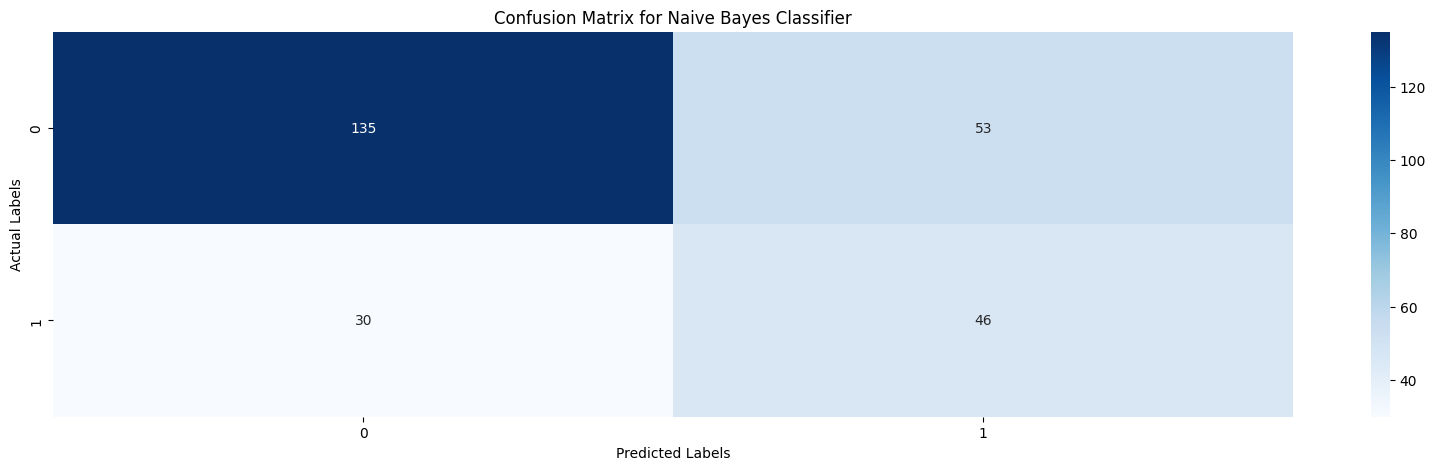

In [246]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics = MulticlassMetrics(Titanic_Label_Prediction.rdd)
precision_score = multiclass_metrics.weightedPrecision
recall_score = multiclass_metrics.weightedRecall
accuracy_score = multiclass_metrics.accuracy
print("Recall = {}".format(recall_score))
print("Precision = {}".format(precision_score))
print("Accuracy = {}".format(accuracy_score))
confusion_matrix = multiclass_metrics.confusionMatrix().toArray()
multiclass_metrics.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [247]:
multiclass_metrics.confusionMatrix().toArray()

array([[135.,  53.],
       [ 30.,  46.]])

# Logistic Regression Model

In [248]:
# import machine learning method logistic regression for classification
from pyspark.ml.classification import LogisticRegression
Logistic_Regression = LogisticRegression()
# Train Naive bayes model using training data
Titanic_predictor_lr = Logistic_Regression.fit(training)

In [249]:
# Test the logistic regression model on testing data
Titanic_test_results_lr = Titanic_predictor_lr.transform(testing)
Titanic_test_results_lr.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(7,[0,2],[1.0,40.0])|[0.59817042430661...|[0.64523761668096...|       0.0|
|  0.0|(7,[0,2],[2.0,29....|[1.20141384432590...|[0.76877620305065...|       0.0|
|  0.0|(7,[0,2],[3.0,36.0])|[2.72506378853660...|[0.93848950072652...|       0.0|
|  0.0|(7,[0,2,5],[1.0,2...|[-0.0608490162775...|[0.48479243793787...|       1.0|
|  0.0|(7,[0,2,5],[1.0,2...|[-0.0777597111701...|[0.48056986169958...|       1.0|
|  0.0|(7,[0,2,5],[1.0,2...|[-0.0912882670841...|[0.47719376909737...|       1.0|
|  0.0|(7,[0,2,5],[1.0,5...|[1.19892819944417...|[0.76833406126609...|       0.0|
|  0.0|(7,[0,2,5],[1.0,6...|[1.72806085252645...|[0.84916421394068...|       0.0|
|  0.0|(7,[0,2,5],[2.0,1...|[0.57273927919905...|[0.63939500896621...|       0.0|
|  0.0|(7,[0,2,5

In [250]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
Titanic_eval_lr = MulticlassClassificationEvaluator()
Titanic_lr = Titanic_eval_lr.evaluate(Titanic_test_results_lr)
print("Accuracy of model at predicting Titanic with Logistic Regression is: {}".format(Titanic_lr))

Accuracy of model at predicting Titanic with Logistic Regression is: 0.7754330614917555


In [251]:
# extract prediction and ground truth label from Titanic_test_results
Titanic_Label_Prediction_lr = Titanic_test_results_lr['label','prediction']
Titanic_Label_Prediction_lr.show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 20 rows



/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Recall = 0.7727272727272727
Precision = 0.7732170186715641
Accuracy = 0.7727272727272727


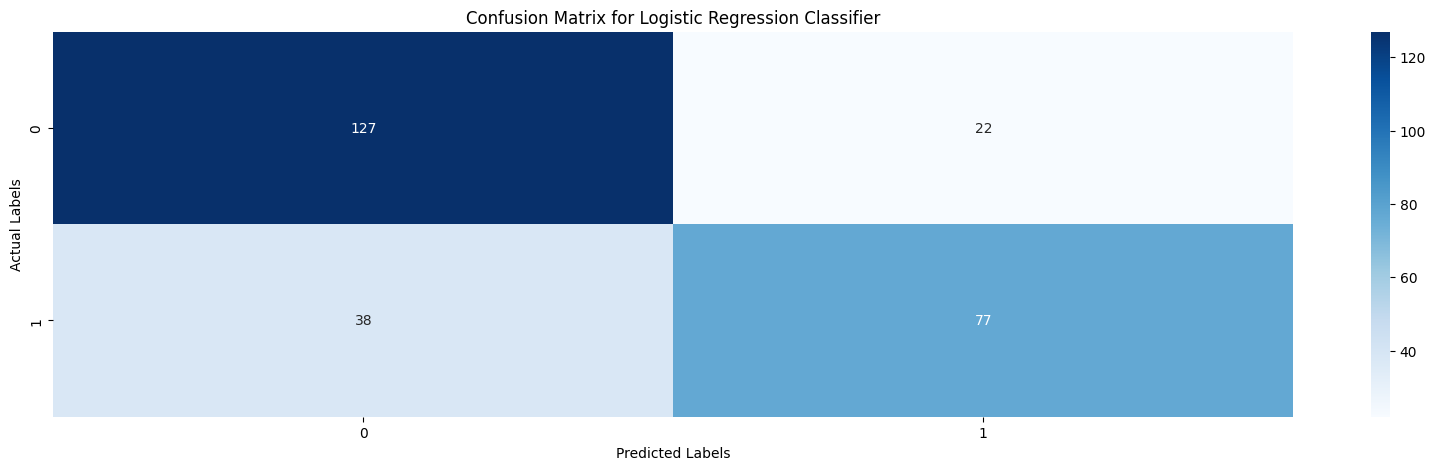

In [252]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics_lr = MulticlassMetrics(Titanic_Label_Prediction_lr.rdd)
precision_score_lr = multiclass_metrics_lr.weightedPrecision
recall_score_lr = multiclass_metrics_lr.weightedRecall
accuracy_score_lr = multiclass_metrics_lr.accuracy
print("Recall = {}".format(recall_score_lr))
print("Precision = {}".format(precision_score_lr))
print("Accuracy = {}".format(accuracy_score_lr))
confusion_matrix_lr = multiclass_metrics_lr.confusionMatrix().toArray()
multiclass_metrics_lr.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix_lr, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [253]:
multiclass_metrics_lr.confusionMatrix().toArray()

array([[127.,  22.],
       [ 38.,  77.]])

# Decision Tree Model

In [254]:
# import machine learning method decision tree for classification
from pyspark.ml.classification import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier()
# Decision Tree bayes model using training data
Titanic_predictor_dt = Decision_Tree.fit(training)

In [255]:
# Test the Decision Tree model on testing data
Titanic_test_results_dt = Titanic_predictor_dt.transform(testing)
Titanic_test_results_dt.show()

+-----+--------------------+-------------+--------------------+----------+
|label|            features|rawPrediction|         probability|prediction|
+-----+--------------------+-------------+--------------------+----------+
|  0.0|(7,[0,2],[1.0,40.0])|  [30.0,13.0]|[0.69767441860465...|       0.0|
|  0.0|(7,[0,2],[2.0,29....| [266.0,32.0]|[0.89261744966442...|       0.0|
|  0.0|(7,[0,2],[3.0,36.0])| [266.0,32.0]|[0.89261744966442...|       0.0|
|  0.0|(7,[0,2,5],[1.0,2...|   [15.0,1.0]|     [0.9375,0.0625]|       0.0|
|  0.0|(7,[0,2,5],[1.0,2...|   [15.0,1.0]|     [0.9375,0.0625]|       0.0|
|  0.0|(7,[0,2,5],[1.0,2...|   [15.0,1.0]|     [0.9375,0.0625]|       0.0|
|  0.0|(7,[0,2,5],[1.0,5...|  [30.0,13.0]|[0.69767441860465...|       0.0|
|  0.0|(7,[0,2,5],[1.0,6...|  [30.0,13.0]|[0.69767441860465...|       0.0|
|  0.0|(7,[0,2,5],[2.0,1...| [266.0,32.0]|[0.89261744966442...|       0.0|
|  0.0|(7,[0,2,5],[2.0,2...| [266.0,32.0]|[0.89261744966442...|       0.0|
|  0.0|(7,[0,2,5],[2.0,2.

In [256]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
Titanic_eval_dt = MulticlassClassificationEvaluator()
Titanic_dt = Titanic_eval_dt.evaluate(Titanic_test_results)
print("Accuracy of model at predicting Titanic with Decision Tree: {}".format(Titanic_dt))

Accuracy of model at predicting Titanic with Decision Tree: 0.675188182921894


In [257]:
# extract prediction and ground truth label from Titanic_test_results
Titanic_Label_Prediction_dt = Titanic_test_results_dt['label','prediction']
Titanic_Label_Prediction_dt.show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 20 rows



/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Recall = 0.8143939393939394
Precision = 0.8296143250688706
Accuracy = 0.8143939393939394


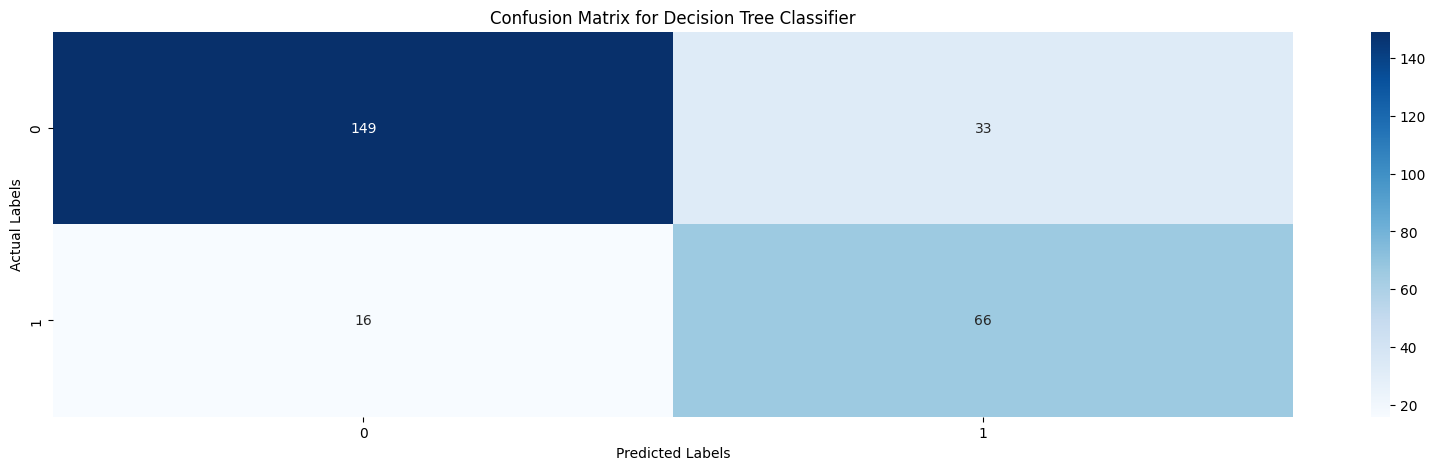

In [258]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics_dt = MulticlassMetrics(Titanic_Label_Prediction_dt.rdd)
precision_score_dt = multiclass_metrics_dt.weightedPrecision
recall_score_dt = multiclass_metrics_dt.weightedRecall
accuracy_score_dt = multiclass_metrics_dt.accuracy
print("Recall = {}".format(recall_score_dt))
print("Precision = {}".format(precision_score_dt))
print("Accuracy = {}".format(accuracy_score_dt))
confusion_matrix_dt = multiclass_metrics_dt.confusionMatrix().toArray()
multiclass_metrics_dt.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix_dt, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [259]:
multiclass_metrics_dt.confusionMatrix().toArray()

array([[149.,  33.],
       [ 16.,  66.]])

In [260]:
#Dataset 1 Countries with strong EV adoption

EV_Countries = pd.read_csv('/kaggle/input/av-adopted-countries-dataset/AV Adopted Countries Dataset.csv')

In [261]:
#Dataset 2 West African Countries to be predicted

EV_African_Countries = pd.read_csv('/kaggle/input/ev-west-african-countries-dataset/EV_West_African_Countries_Data.csv')

In [262]:
EV_Countries

,Country,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total Vehicles est.,Registered EVs est.,EV Penetration (%)
0,Norway,89000,3.5,5.4,82.4,3.1,100,98.0,20000,2.2,yes,yes,9.5,0.9,90.2,3000000,630000,21.0
1,Germany,51500,4.2,83.2,77.5,5.7,100,42.5,75000,2.0,yes,yes,8.7,0.7,86.3,50000000,3100000,6.2
2,France,47000,3.8,65.3,81.0,7.1,100,23.8,45000,2.0,yes,yes,8.0,0.6,84.5,38000000,1824000,4.8
3,UK,46000,3.9,67.3,84.5,4.2,100,45.2,48000,2.1,yes,yes,8.2,0.6,88.1,40000000,2360000,5.9
4,Netherlands,58000,4.0,17.7,91.1,3.5,100,55.0,90000,2.3,yes,yes,9.3,0.8,89.7,9000000,945000,10.5
5,Sweden,55000,3.2,10.4,88.2,4.0,100,66.5,30000,2.3,yes,yes,8.8,0.7,87.2,6000000,498000,8.3
6,USA,70000,3.7,331.9,83.6,3.8,100,20.0,150000,1.2,yes,yes,7.5,0.5,91.0,278000000,9452000,3.4
7,Canada,60000,3.5,39.5,81.3,5.1,100,23.5,20000,1.4,yes,yes,7.8,0.6,89.0,26000000,806000,3.1
8,Japan,43000,2.8,125.8,92.0,2.6,100,19.2,32000,1.4,yes,yes,8.1,0.5,85.4,80000000,2080000,2.6
9,South Korea,35000,3.0,52.0,81.4,3.2,100,16.3,28000,1.6,yes,yes,7.9,0.4,84.1,24000000,672000,2.8


In [263]:
EV_African_Countries

,Country,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total Vehicles est.,Registered EVs est.,EV Penetration (%)
0,Nigeria,2400,18.1,223.8,53.2,33.3,55.4,13.2,15,1.20,yes,yes,6.5,1.4,54.3,12000000,1200,0.01
1,Ghana,2250,23.5,34.1,58.0,13.9,86.6,24.5,8,1.10,yes,yes,7.0,1.7,62.7,1200000,600,0.05
2,Senegal,1550,9.2,18.4,49.1,17.5,70.3,22.8,4,1.30,no,no,4.0,1.1,49.5,750000,300,0.04
3,Ivory Coast,1800,6.3,27.5,51.3,10.4,76.5,20.1,5,1.25,no,no,4.5,1.0,51.0,900000,270,0.03
4,Benin,1450,5.1,13.5,48.5,12.2,65.1,18.3,3,1.15,no,no,3.8,0.9,46.2,480000,48,0.01
5,Togo,1700,7.2,8.6,42.7,11.8,70.0,19.4,2,1.18,yes,yes,5.0,1.3,50.3,500000,100,0.02
6,Burkina Faso,1350,10.5,22.1,31.2,18.3,50.5,16.5,1,1.22,no,no,3.5,0.8,45.1,420000,42,0.01
7,Mali,1200,12.7,21.9,44.6,20.0,47.0,14.1,0,1.19,no,no,2.9,0.7,40.0,400000,40,0.01
8,Niger,1100,15.3,26.2,20.3,22.4,41.2,12.3,0,1.28,no,no,2.5,0.6,38.7,300000,0,0.00
9,Guinea,1300,11.1,14.0,38.1,19.1,53.0,13.0,1,1.24,yes,yes,4.8,1.2,44.5,360000,36,0.01


In [264]:
print(EV_Countries.shape)
print(EV_Countries.info())

(39, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     39 non-null     object 
 1   GDP_per_Capita_USD          39 non-null     int64  
 2   Inflation_Rate_percent      39 non-null     float64
 3   Population_millions         39 non-null     float64
 4   Urbanization_Rate_percent   39 non-null     float64
 5   Unemployment_Rate_percent   39 non-null     float64
 6   Electricity_Access_percent  39 non-null     int64  
 7   Renewable_Share_percent     39 non-null     float64
 8   EV_Charging_Stations        39 non-null     int64  
 9   Fuel_Price_USD_per_litre    39 non-null     float64
 10  EV_Policy_Exists            39 non-null     object 
 11  Tax_Incentives              39 non-null     object 
 12  EV_Public_Awareness_Score   39 non-null     float64
 13  Social_Media_Sentiment      

In [265]:
print(EV_African_Countries.shape)
print(EV_African_Countries.info())

(15, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     15 non-null     object 
 1   GDP_per_Capita_USD          15 non-null     int64  
 2   Inflation_Rate_percent      15 non-null     float64
 3   Population_millions         15 non-null     float64
 4   Urbanization_Rate_percent   15 non-null     float64
 5   Unemployment_Rate_percent   15 non-null     float64
 6   Electricity_Access_percent  15 non-null     float64
 7   Renewable_Share_percent     15 non-null     float64
 8   EV_Charging_Stations        15 non-null     int64  
 9   Fuel_Price_USD_per_litre    15 non-null     float64
 10  EV_Policy_Exists            15 non-null     object 
 11  Tax_Incentives              15 non-null     object 
 12  EV_Public_Awareness_Score   15 non-null     float64
 13  Social_Media_Sentiment      

**TRANSFORM DATASET**

In [266]:
# Convert binary categorical values in Dataset 1
EV_Countries['EV_Policy_Exists'] = EV_Countries['EV_Policy_Exists'].map({'yes': 1.0, 'no': 0.0})
EV_Countries['Tax_Incentives'] = EV_Countries['Tax_Incentives'].map({'yes': 1.0, 'no': 0.0})

In [267]:
# Convert binary categorical values in the West African Dataset
EV_African_Countries['EV_Policy_Exists'] = EV_African_Countries['EV_Policy_Exists'].map({'yes': 1.0, 'no': 0.0})
EV_African_Countries['Tax_Incentives'] = EV_African_Countries['Tax_Incentives'].map({'yes': 1.0, 'no': 0.0})

In [268]:
EV_Countries

,Country,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total Vehicles est.,Registered EVs est.,EV Penetration (%)
0,Norway,89000,3.5,5.4,82.4,3.1,100,98.0,20000,2.2,1.0,1.0,9.5,0.9,90.2,3000000,630000,21.0
1,Germany,51500,4.2,83.2,77.5,5.7,100,42.5,75000,2.0,1.0,1.0,8.7,0.7,86.3,50000000,3100000,6.2
2,France,47000,3.8,65.3,81.0,7.1,100,23.8,45000,2.0,1.0,1.0,8.0,0.6,84.5,38000000,1824000,4.8
3,UK,46000,3.9,67.3,84.5,4.2,100,45.2,48000,2.1,1.0,1.0,8.2,0.6,88.1,40000000,2360000,5.9
4,Netherlands,58000,4.0,17.7,91.1,3.5,100,55.0,90000,2.3,1.0,1.0,9.3,0.8,89.7,9000000,945000,10.5
5,Sweden,55000,3.2,10.4,88.2,4.0,100,66.5,30000,2.3,1.0,1.0,8.8,0.7,87.2,6000000,498000,8.3
6,USA,70000,3.7,331.9,83.6,3.8,100,20.0,150000,1.2,1.0,1.0,7.5,0.5,91.0,278000000,9452000,3.4
7,Canada,60000,3.5,39.5,81.3,5.1,100,23.5,20000,1.4,1.0,1.0,7.8,0.6,89.0,26000000,806000,3.1
8,Japan,43000,2.8,125.8,92.0,2.6,100,19.2,32000,1.4,1.0,1.0,8.1,0.5,85.4,80000000,2080000,2.6
9,South Korea,35000,3.0,52.0,81.4,3.2,100,16.3,28000,1.6,1.0,1.0,7.9,0.4,84.1,24000000,672000,2.8


In [269]:
EV_African_Countries

,Country,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total Vehicles est.,Registered EVs est.,EV Penetration (%)
0,Nigeria,2400,18.1,223.8,53.2,33.3,55.4,13.2,15,1.20,1.0,1.0,6.5,1.4,54.3,12000000,1200,0.01
1,Ghana,2250,23.5,34.1,58.0,13.9,86.6,24.5,8,1.10,1.0,1.0,7.0,1.7,62.7,1200000,600,0.05
2,Senegal,1550,9.2,18.4,49.1,17.5,70.3,22.8,4,1.30,0.0,0.0,4.0,1.1,49.5,750000,300,0.04
3,Ivory Coast,1800,6.3,27.5,51.3,10.4,76.5,20.1,5,1.25,0.0,0.0,4.5,1.0,51.0,900000,270,0.03
4,Benin,1450,5.1,13.5,48.5,12.2,65.1,18.3,3,1.15,0.0,0.0,3.8,0.9,46.2,480000,48,0.01
5,Togo,1700,7.2,8.6,42.7,11.8,70.0,19.4,2,1.18,1.0,1.0,5.0,1.3,50.3,500000,100,0.02
6,Burkina Faso,1350,10.5,22.1,31.2,18.3,50.5,16.5,1,1.22,0.0,0.0,3.5,0.8,45.1,420000,42,0.01
7,Mali,1200,12.7,21.9,44.6,20.0,47.0,14.1,0,1.19,0.0,0.0,2.9,0.7,40.0,400000,40,0.01
8,Niger,1100,15.3,26.2,20.3,22.4,41.2,12.3,0,1.28,0.0,0.0,2.5,0.6,38.7,300000,0,0.00
9,Guinea,1300,11.1,14.0,38.1,19.1,53.0,13.0,1,1.24,1.0,1.0,4.8,1.2,44.5,360000,36,0.01


In [270]:
print(EV_Countries.shape)
print(EV_Countries.info())

(39, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     39 non-null     object 
 1   GDP_per_Capita_USD          39 non-null     int64  
 2   Inflation_Rate_percent      39 non-null     float64
 3   Population_millions         39 non-null     float64
 4   Urbanization_Rate_percent   39 non-null     float64
 5   Unemployment_Rate_percent   39 non-null     float64
 6   Electricity_Access_percent  39 non-null     int64  
 7   Renewable_Share_percent     39 non-null     float64
 8   EV_Charging_Stations        39 non-null     int64  
 9   Fuel_Price_USD_per_litre    39 non-null     float64
 10  EV_Policy_Exists            39 non-null     float64
 11  Tax_Incentives              39 non-null     float64
 12  EV_Public_Awareness_Score   39 non-null     float64
 13  Social_Media_Sentiment      

In [271]:
print(EV_African_Countries.shape)
print(EV_African_Countries.info())

(15, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     15 non-null     object 
 1   GDP_per_Capita_USD          15 non-null     int64  
 2   Inflation_Rate_percent      15 non-null     float64
 3   Population_millions         15 non-null     float64
 4   Urbanization_Rate_percent   15 non-null     float64
 5   Unemployment_Rate_percent   15 non-null     float64
 6   Electricity_Access_percent  15 non-null     float64
 7   Renewable_Share_percent     15 non-null     float64
 8   EV_Charging_Stations        15 non-null     int64  
 9   Fuel_Price_USD_per_litre    15 non-null     float64
 10  EV_Policy_Exists            15 non-null     float64
 11  Tax_Incentives              15 non-null     float64
 12  EV_Public_Awareness_Score   15 non-null     float64
 13  Social_Media_Sentiment      

**VISUALISE THE DATA SET**

<Axes: >

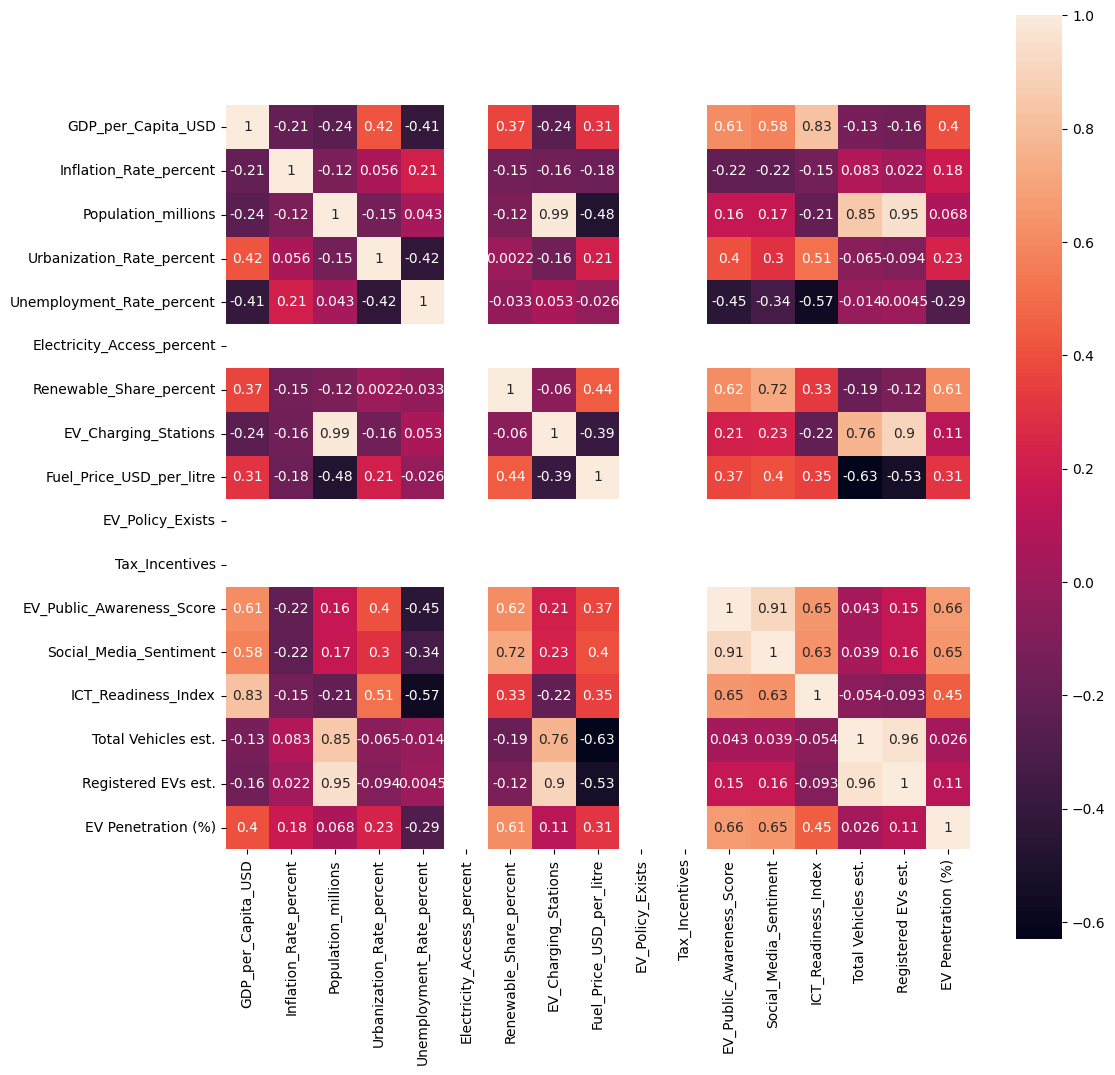

In [272]:
# Figure to see the correlation between features

import seaborn as sns

fig = plt.figure(figsize=(12,12))
Numerical_EV_Countries = EV_Countries.select_dtypes(include=np.number)  # select only numerical columns
sns.heatmap(Numerical_EV_Countries.corr(), vmax=1, square=True, annot=True)

#Brief idea about the correlation between features

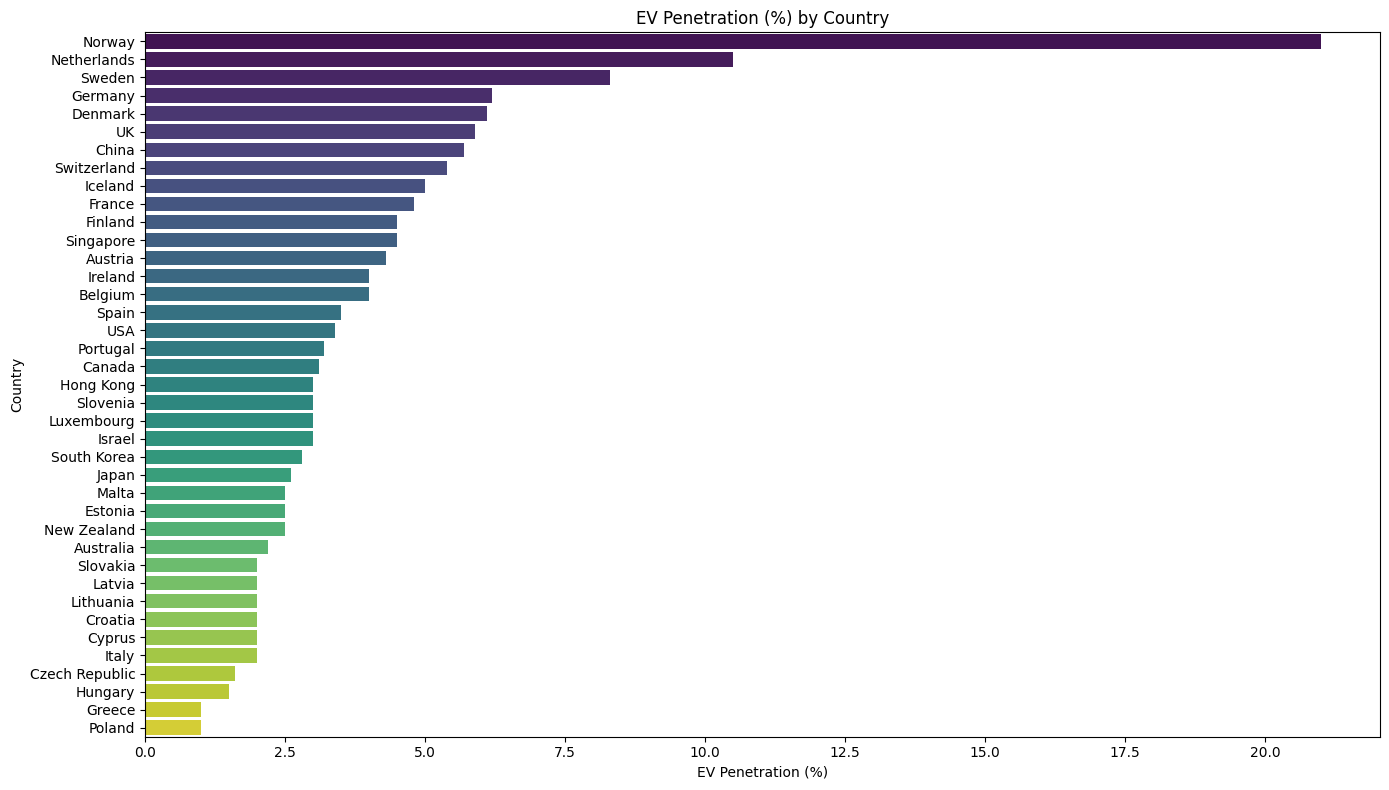

In [273]:
# Sort data by EV Penetration (%)
EV_Countries_sorted = EV_Countries.sort_values('EV Penetration (%)', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_Countries_sorted, x='EV Penetration (%)', y='Country', palette='viridis')

plt.title('EV Penetration (%) by Country')
plt.xlabel('EV Penetration (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

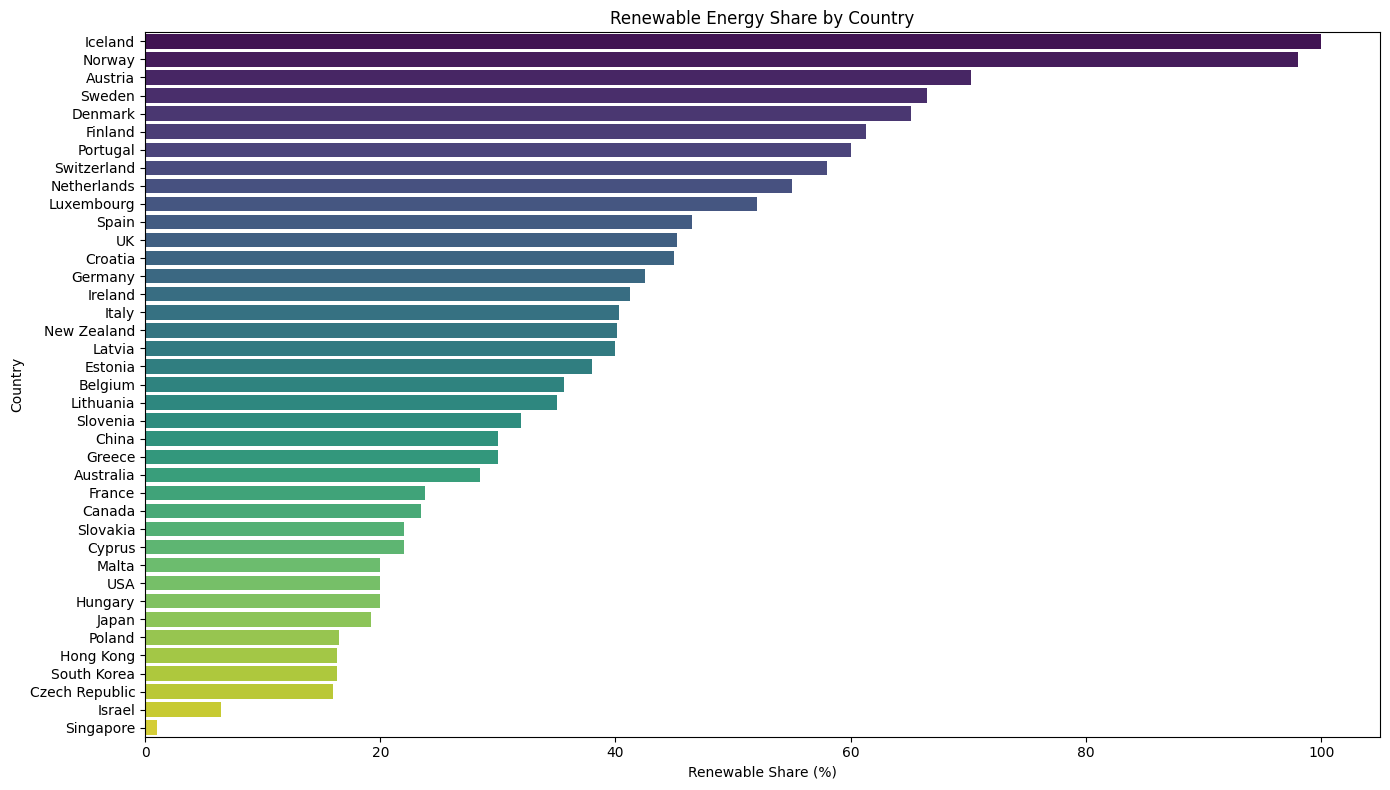

In [274]:
# Sort data by Renewable Energy Share
EV_Countries_sorted = EV_Countries.sort_values('Renewable_Share_percent', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_Countries_sorted, x='Renewable_Share_percent', y='Country', palette='viridis')

plt.title('Renewable Energy Share by Country')
plt.xlabel('Renewable Share (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

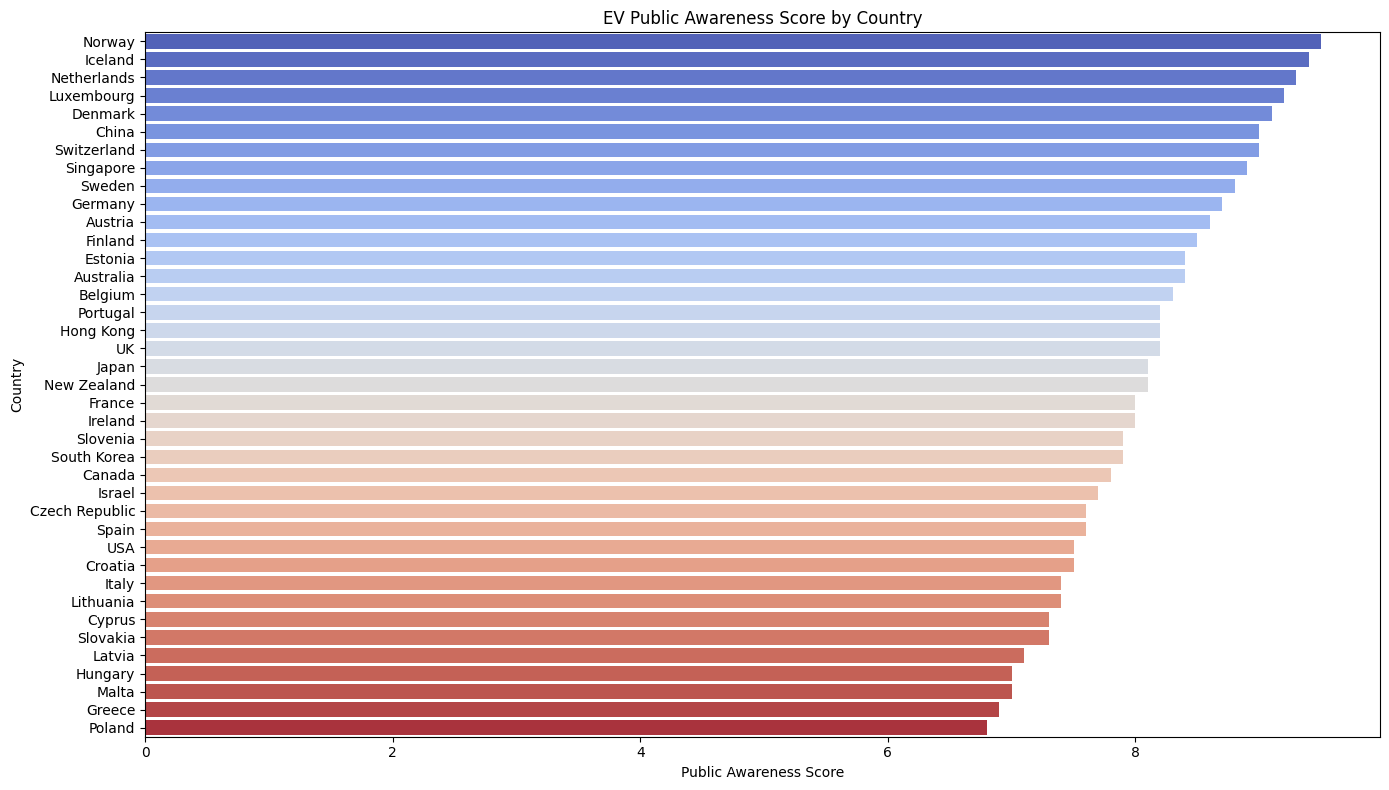

In [275]:
# Sort countries by awareness score (descending)
EV_Countries_sorted = EV_Countries.sort_values('EV_Public_Awareness_Score', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_Countries_sorted, x='EV_Public_Awareness_Score', y='Country', palette='coolwarm')

plt.title('EV Public Awareness Score by Country')
plt.xlabel('Public Awareness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [276]:
EV_Countries.loc[EV_Countries['EV_Public_Awareness_Score'].idxmax(), 'Country']

'Norway'

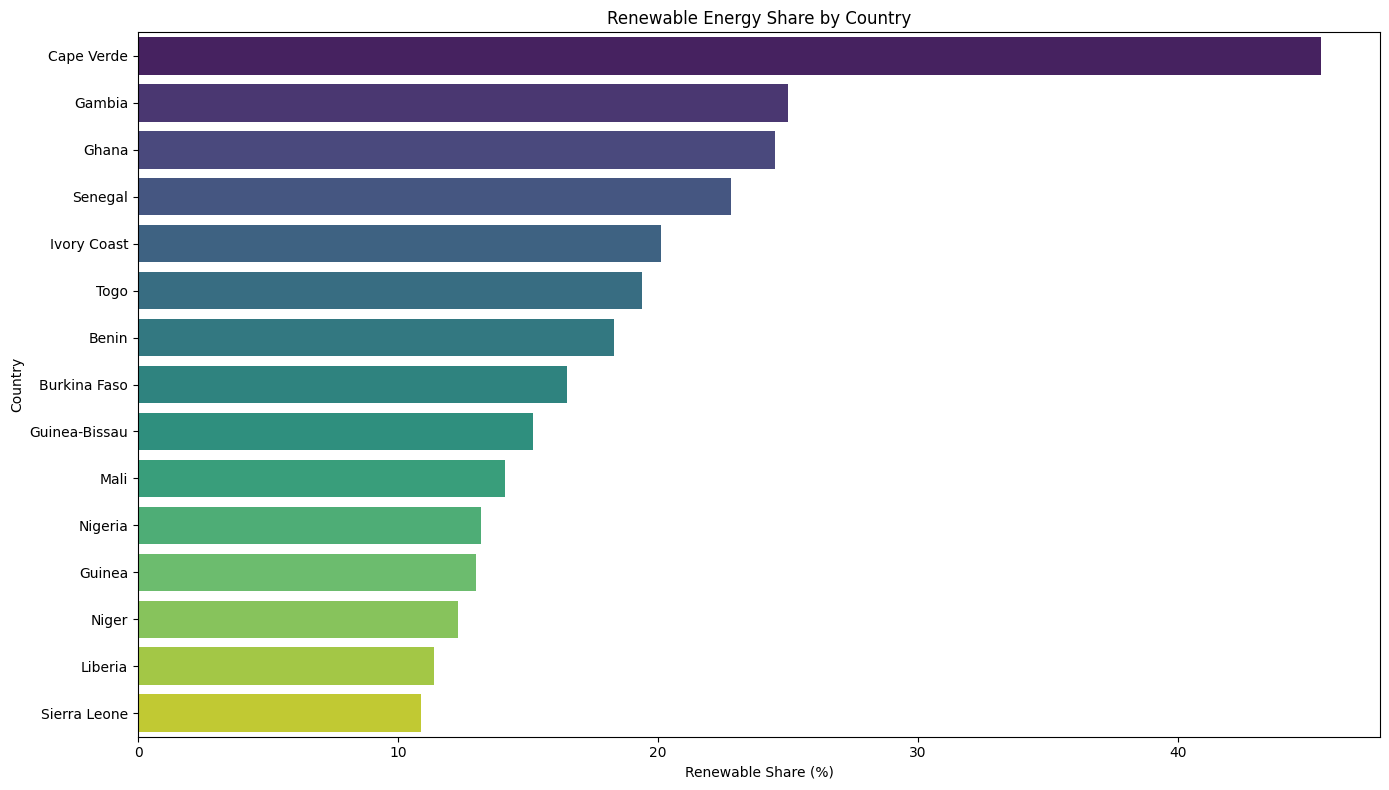

In [277]:
# Sort data by Renewable Energy Share for Dataset 2
EV_African_Countries_sorted = EV_African_Countries.sort_values('Renewable_Share_percent', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_African_Countries_sorted, x='Renewable_Share_percent', y='Country', palette='viridis')

plt.title('Renewable Energy Share by Country')
plt.xlabel('Renewable Share (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

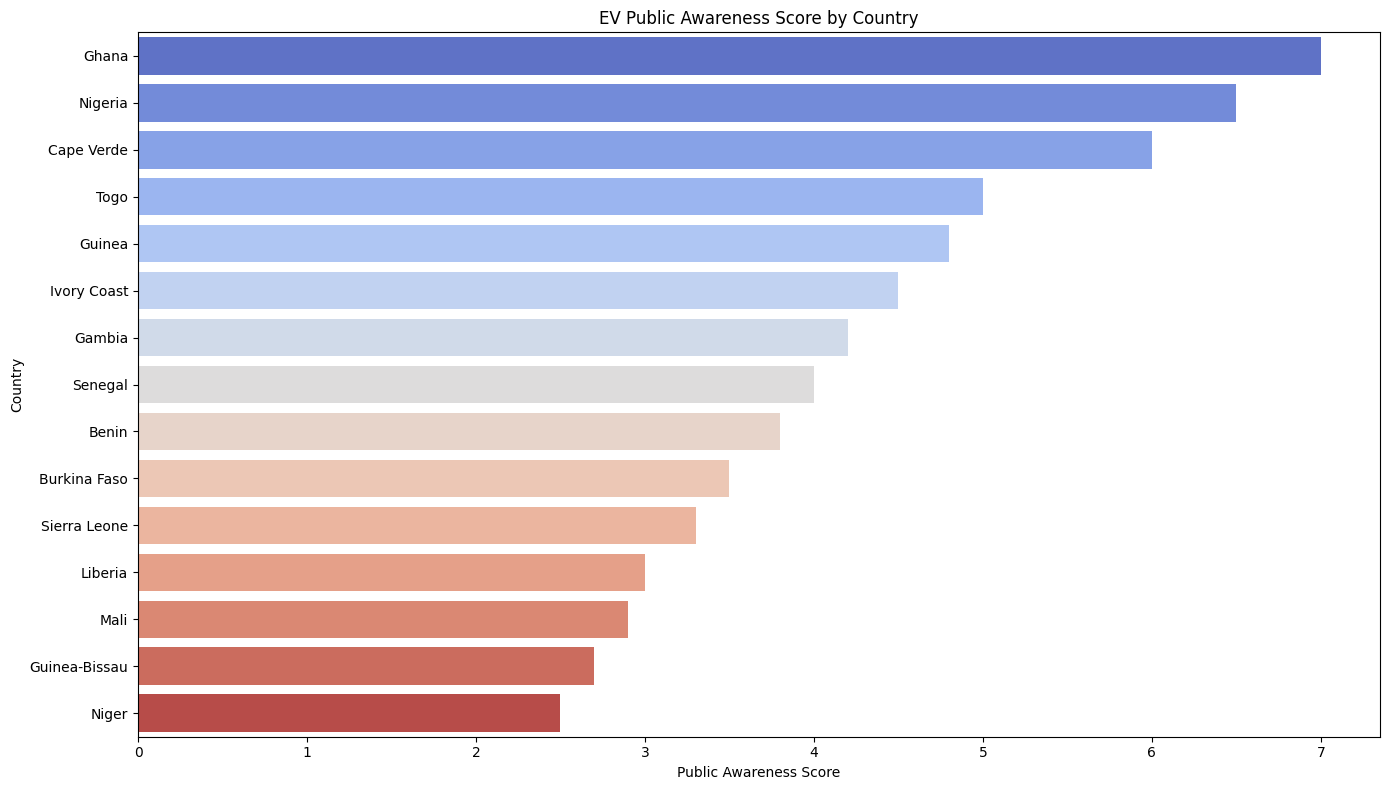

In [278]:
# Sort countries by awareness score (descending) for Dataset 2
EV_African_Countries_sorted = EV_African_Countries.sort_values('EV_Public_Awareness_Score', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_African_Countries_sorted, x='EV_Public_Awareness_Score', y='Country', palette='coolwarm')

plt.title('EV Public Awareness Score by Country')
plt.xlabel('Public Awareness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

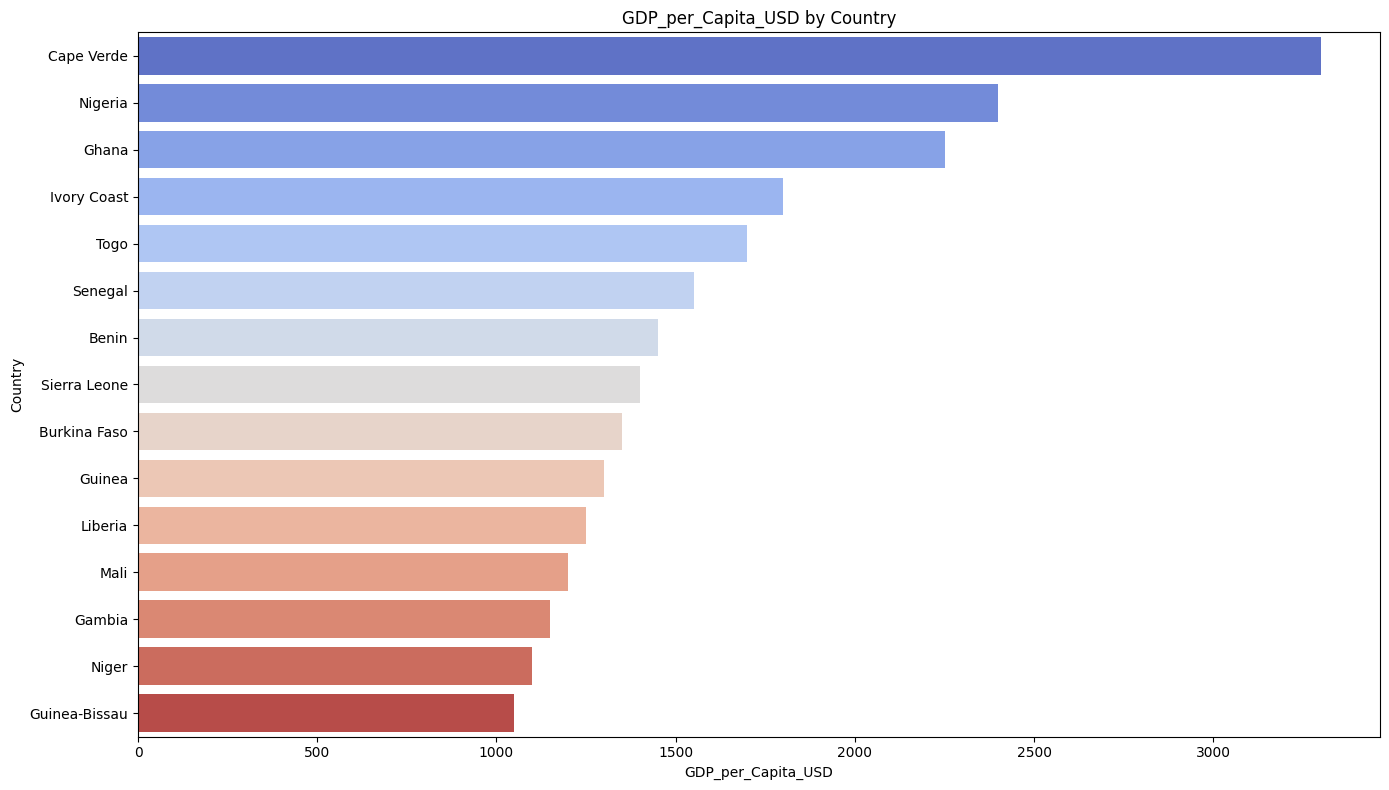

In [279]:
# Sort countries by GDP (descending) for Dataset 2
EV_African_Countries_sorted = EV_African_Countries.sort_values('GDP_per_Capita_USD', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_African_Countries_sorted, x='GDP_per_Capita_USD', y='Country', palette='coolwarm')

plt.title('GDP_per_Capita_USD by Country')
plt.xlabel('GDP_per_Capita_USD')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

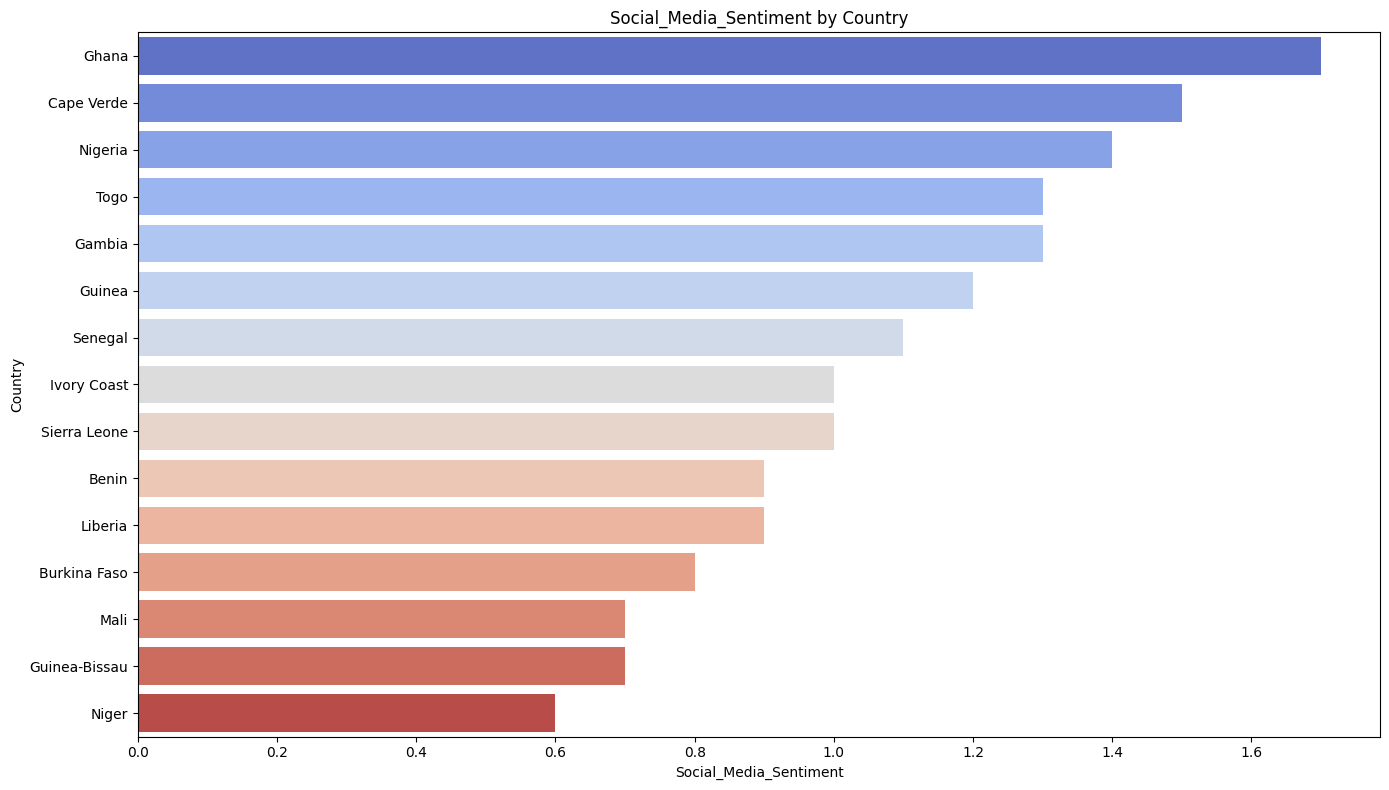

In [280]:
# Sort countries by social media sentiment for Dataset 2
EV_African_Countries_sorted = EV_African_Countries.sort_values('Social_Media_Sentiment', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_African_Countries_sorted, x='Social_Media_Sentiment', y='Country', palette='coolwarm')

plt.title('Social_Media_Sentiment by Country')
plt.xlabel('Social_Media_Sentiment')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

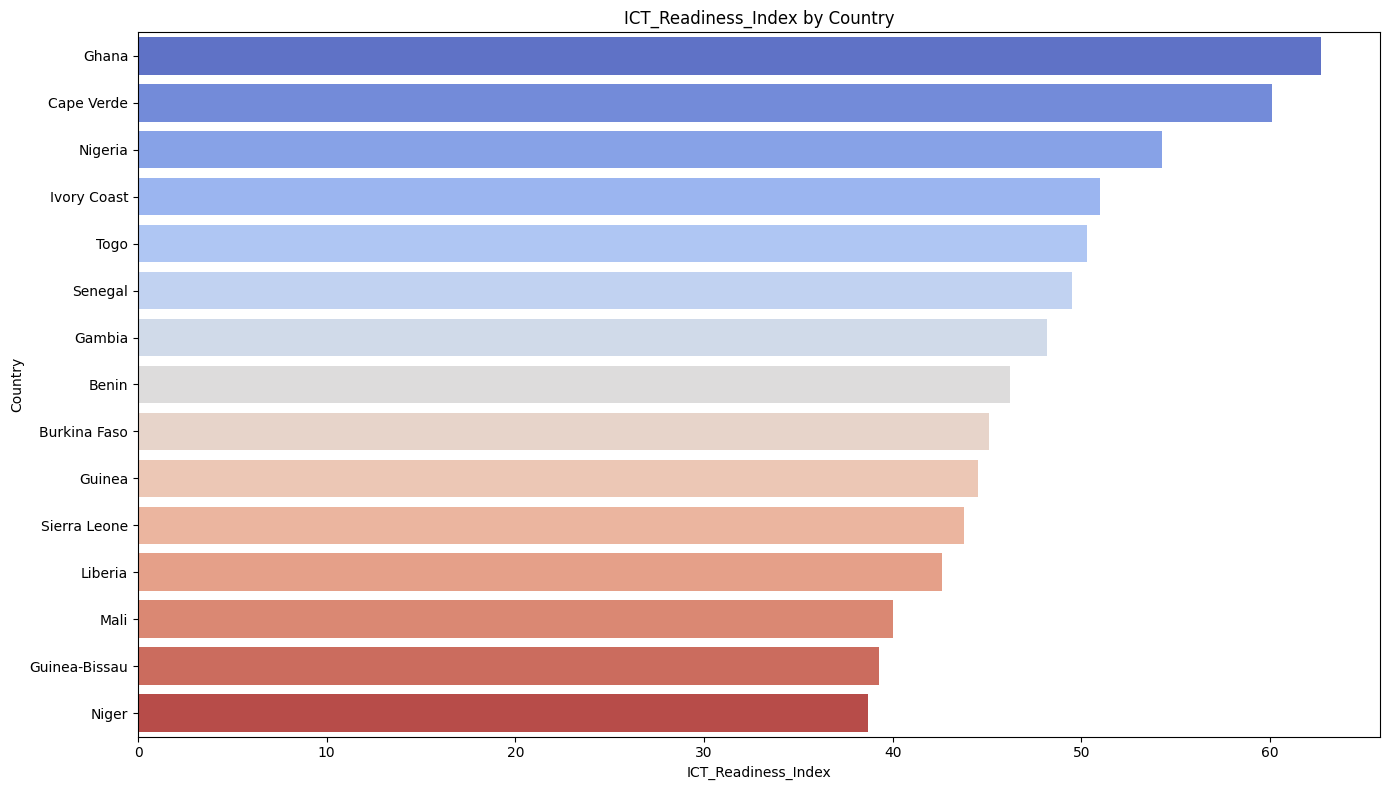

In [281]:
# Sort countries by ICT_Readiness_Index (descending) for Dataset 2
EV_African_Countries_sorted = EV_African_Countries.sort_values('ICT_Readiness_Index', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_African_Countries_sorted, x='ICT_Readiness_Index', y='Country', palette='coolwarm')

plt.title('ICT_Readiness_Index by Country')
plt.xlabel('ICT_Readiness_Index')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**FEATURE EXTRACTION AND PREPROCESSING**

In [282]:
#Creating new category column to classify the target variable into low medium and low

bins = [0, 1, 5, np.inf]
labels = ['Low', 'Medium', 'High']

# Create new category column
EV_Countries['Penetration_Category'] = pd.cut(EV_Countries['EV Penetration (%)'], bins=bins, labels=labels, right=False)

# Display the result
print(EV_Countries[['EV Penetration (%)', 'Penetration_Category']])

    EV Penetration (%) Penetration_Category
0                 21.0                 High
1                  6.2                 High
2                  4.8               Medium
3                  5.9                 High
4                 10.5                 High
5                  8.3                 High
6                  3.4               Medium
7                  3.1               Medium
8                  2.6               Medium
9                  2.8               Medium
10                 5.7                 High
11                 2.2               Medium
12                 4.5               Medium
13                 5.4                 High
14                 6.1                 High
15                 4.0               Medium
16                 4.3               Medium
17                 2.0               Medium
18                 3.5               Medium
19                 3.2               Medium
20                 4.0               Medium
21                 2.5          

In [283]:
#Converting the new column 'Penetration_Category' data using the rule: High 2, Medium 1, Low 0
#This is because models require numeric targets to perform learning operations

EV_Countries['Penetration_Category'] = EV_Countries['Penetration_Category'].map( {'High':2,'Medium':1,'Low':0} )

In [284]:
EV_Countries

,Country,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total Vehicles est.,Registered EVs est.,EV Penetration (%),Penetration_Category
0,Norway,89000,3.5,5.4,82.4,3.1,100,98.0,20000,2.2,1.0,1.0,9.5,0.9,90.2,3000000,630000,21.0,2
1,Germany,51500,4.2,83.2,77.5,5.7,100,42.5,75000,2.0,1.0,1.0,8.7,0.7,86.3,50000000,3100000,6.2,2
2,France,47000,3.8,65.3,81.0,7.1,100,23.8,45000,2.0,1.0,1.0,8.0,0.6,84.5,38000000,1824000,4.8,1
3,UK,46000,3.9,67.3,84.5,4.2,100,45.2,48000,2.1,1.0,1.0,8.2,0.6,88.1,40000000,2360000,5.9,2
4,Netherlands,58000,4.0,17.7,91.1,3.5,100,55.0,90000,2.3,1.0,1.0,9.3,0.8,89.7,9000000,945000,10.5,2
5,Sweden,55000,3.2,10.4,88.2,4.0,100,66.5,30000,2.3,1.0,1.0,8.8,0.7,87.2,6000000,498000,8.3,2
6,USA,70000,3.7,331.9,83.6,3.8,100,20.0,150000,1.2,1.0,1.0,7.5,0.5,91.0,278000000,9452000,3.4,1
7,Canada,60000,3.5,39.5,81.3,5.1,100,23.5,20000,1.4,1.0,1.0,7.8,0.6,89.0,26000000,806000,3.1,1
8,Japan,43000,2.8,125.8,92.0,2.6,100,19.2,32000,1.4,1.0,1.0,8.1,0.5,85.4,80000000,2080000,2.6,1
9,South Korea,35000,3.0,52.0,81.4,3.2,100,16.3,28000,1.6,1.0,1.0,7.9,0.4,84.1,24000000,672000,2.8,1


In [285]:
#Creating new category column to classify the target variable into low medium and low

bins = [0, 1, 5, np.inf]
labels = ['Low', 'Medium', 'High']

# Create new category column
EV_African_Countries['Penetration_Category'] = pd.cut(EV_African_Countries['EV Penetration (%)'], bins=bins, labels=labels, right=False)

# Display the result
print(EV_African_Countries[['EV Penetration (%)', 'Penetration_Category']])

    EV Penetration (%) Penetration_Category
0                 0.01                  Low
1                 0.05                  Low
2                 0.04                  Low
3                 0.03                  Low
4                 0.01                  Low
5                 0.02                  Low
6                 0.01                  Low
7                 0.01                  Low
8                 0.00                  Low
9                 0.01                  Low
10                0.01                  Low
11                0.00                  Low
12                0.02                  Low
13                0.05                  Low
14                0.00                  Low


In [286]:
#Converting the new column 'Penetration_Category' data using the rule: High 2, Medium 1, Low 0
#This is because models require numeric targets to perform learning operations

EV_African_Countries['Penetration_Category'] = EV_African_Countries['Penetration_Category'].map( {'High':2,'Medium':1,'Low':0} )

In [287]:
EV_African_Countries

,Country,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total Vehicles est.,Registered EVs est.,EV Penetration (%),Penetration_Category
0,Nigeria,2400,18.1,223.8,53.2,33.3,55.4,13.2,15,1.20,1.0,1.0,6.5,1.4,54.3,12000000,1200,0.01,0
1,Ghana,2250,23.5,34.1,58.0,13.9,86.6,24.5,8,1.10,1.0,1.0,7.0,1.7,62.7,1200000,600,0.05,0
2,Senegal,1550,9.2,18.4,49.1,17.5,70.3,22.8,4,1.30,0.0,0.0,4.0,1.1,49.5,750000,300,0.04,0
3,Ivory Coast,1800,6.3,27.5,51.3,10.4,76.5,20.1,5,1.25,0.0,0.0,4.5,1.0,51.0,900000,270,0.03,0
4,Benin,1450,5.1,13.5,48.5,12.2,65.1,18.3,3,1.15,0.0,0.0,3.8,0.9,46.2,480000,48,0.01,0
5,Togo,1700,7.2,8.6,42.7,11.8,70.0,19.4,2,1.18,1.0,1.0,5.0,1.3,50.3,500000,100,0.02,0
6,Burkina Faso,1350,10.5,22.1,31.2,18.3,50.5,16.5,1,1.22,0.0,0.0,3.5,0.8,45.1,420000,42,0.01,0
7,Mali,1200,12.7,21.9,44.6,20.0,47.0,14.1,0,1.19,0.0,0.0,2.9,0.7,40.0,400000,40,0.01,0
8,Niger,1100,15.3,26.2,20.3,22.4,41.2,12.3,0,1.28,0.0,0.0,2.5,0.6,38.7,300000,0,0.00,0
9,Guinea,1300,11.1,14.0,38.1,19.1,53.0,13.0,1,1.24,1.0,1.0,4.8,1.2,44.5,360000,36,0.01,0


In [288]:
#Drop Country because it is an identifier (name), not useful for prediction
#Drop EV Penetration (%), better to predict with Penetration_Category

New_EV_Countries= EV_Countries.drop(columns=['Country', 'EV Penetration (%)'])

In [289]:
New_EV_Countries

,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total Vehicles est.,Registered EVs est.,Penetration_Category
0,89000,3.5,5.4,82.4,3.1,100,98.0,20000,2.2,1.0,1.0,9.5,0.9,90.2,3000000,630000,2
1,51500,4.2,83.2,77.5,5.7,100,42.5,75000,2.0,1.0,1.0,8.7,0.7,86.3,50000000,3100000,2
2,47000,3.8,65.3,81.0,7.1,100,23.8,45000,2.0,1.0,1.0,8.0,0.6,84.5,38000000,1824000,1
3,46000,3.9,67.3,84.5,4.2,100,45.2,48000,2.1,1.0,1.0,8.2,0.6,88.1,40000000,2360000,2
4,58000,4.0,17.7,91.1,3.5,100,55.0,90000,2.3,1.0,1.0,9.3,0.8,89.7,9000000,945000,2
5,55000,3.2,10.4,88.2,4.0,100,66.5,30000,2.3,1.0,1.0,8.8,0.7,87.2,6000000,498000,2
6,70000,3.7,331.9,83.6,3.8,100,20.0,150000,1.2,1.0,1.0,7.5,0.5,91.0,278000000,9452000,1
7,60000,3.5,39.5,81.3,5.1,100,23.5,20000,1.4,1.0,1.0,7.8,0.6,89.0,26000000,806000,1
8,43000,2.8,125.8,92.0,2.6,100,19.2,32000,1.4,1.0,1.0,8.1,0.5,85.4,80000000,2080000,1
9,35000,3.0,52.0,81.4,3.2,100,16.3,28000,1.6,1.0,1.0,7.9,0.4,84.1,24000000,672000,1


In [290]:
#Drop Country in Dataset 2  because it is an identifier (name), not useful for prediction

New_EV_African_Countries= EV_African_Countries.drop(columns=['Country', 'EV Penetration (%)'])

In [291]:
New_EV_African_Countries

,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total Vehicles est.,Registered EVs est.,Penetration_Category
0,2400,18.1,223.8,53.2,33.3,55.4,13.2,15,1.20,1.0,1.0,6.5,1.4,54.3,12000000,1200,0
1,2250,23.5,34.1,58.0,13.9,86.6,24.5,8,1.10,1.0,1.0,7.0,1.7,62.7,1200000,600,0
2,1550,9.2,18.4,49.1,17.5,70.3,22.8,4,1.30,0.0,0.0,4.0,1.1,49.5,750000,300,0
3,1800,6.3,27.5,51.3,10.4,76.5,20.1,5,1.25,0.0,0.0,4.5,1.0,51.0,900000,270,0
4,1450,5.1,13.5,48.5,12.2,65.1,18.3,3,1.15,0.0,0.0,3.8,0.9,46.2,480000,48,0
5,1700,7.2,8.6,42.7,11.8,70.0,19.4,2,1.18,1.0,1.0,5.0,1.3,50.3,500000,100,0
6,1350,10.5,22.1,31.2,18.3,50.5,16.5,1,1.22,0.0,0.0,3.5,0.8,45.1,420000,42,0
7,1200,12.7,21.9,44.6,20.0,47.0,14.1,0,1.19,0.0,0.0,2.9,0.7,40.0,400000,40,0
8,1100,15.3,26.2,20.3,22.4,41.2,12.3,0,1.28,0.0,0.0,2.5,0.6,38.7,300000,0,0
9,1300,11.1,14.0,38.1,19.1,53.0,13.0,1,1.24,1.0,1.0,4.8,1.2,44.5,360000,36,0


In [292]:
#Rename columns Dataset 1
New_EV_Countries = New_EV_Countries.rename(columns={
    'Total Vehicles est.': 'Total_Vehicles_est',
    'Registered EVs est.': 'Registered_EVs_est',
    'EV Policy Exists': 'EV_Policy_Exists',
    'Tax Incentives': 'Tax_Incentives',
    'EV Public Awareness Score': 'EV_Public_Awareness_Score',
    'Social Media Sentiment': 'Social_Media_Sentiment',
    'ICT Readiness Index': 'ICT_Readiness_Index'
})

New_EV_Countries

,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total_Vehicles_est,Registered_EVs_est,Penetration_Category
0,89000,3.5,5.4,82.4,3.1,100,98.0,20000,2.2,1.0,1.0,9.5,0.9,90.2,3000000,630000,2
1,51500,4.2,83.2,77.5,5.7,100,42.5,75000,2.0,1.0,1.0,8.7,0.7,86.3,50000000,3100000,2
2,47000,3.8,65.3,81.0,7.1,100,23.8,45000,2.0,1.0,1.0,8.0,0.6,84.5,38000000,1824000,1
3,46000,3.9,67.3,84.5,4.2,100,45.2,48000,2.1,1.0,1.0,8.2,0.6,88.1,40000000,2360000,2
4,58000,4.0,17.7,91.1,3.5,100,55.0,90000,2.3,1.0,1.0,9.3,0.8,89.7,9000000,945000,2
5,55000,3.2,10.4,88.2,4.0,100,66.5,30000,2.3,1.0,1.0,8.8,0.7,87.2,6000000,498000,2
6,70000,3.7,331.9,83.6,3.8,100,20.0,150000,1.2,1.0,1.0,7.5,0.5,91.0,278000000,9452000,1
7,60000,3.5,39.5,81.3,5.1,100,23.5,20000,1.4,1.0,1.0,7.8,0.6,89.0,26000000,806000,1
8,43000,2.8,125.8,92.0,2.6,100,19.2,32000,1.4,1.0,1.0,8.1,0.5,85.4,80000000,2080000,1
9,35000,3.0,52.0,81.4,3.2,100,16.3,28000,1.6,1.0,1.0,7.9,0.4,84.1,24000000,672000,1


In [293]:
#Rename columns Dataset 2
New_EV_African_Countries = New_EV_African_Countries.rename(columns={
    'Total Vehicles est.': 'Total_Vehicles_est',
    'Registered EVs est.': 'Registered_EVs_est',
    'EV Policy Exists': 'EV_Policy_Exists',
    'Tax Incentives': 'Tax_Incentives',
    'EV Public Awareness Score': 'EV_Public_Awareness_Score',
    'Social Media Sentiment': 'Social_Media_Sentiment',
    'ICT Readiness Index': 'ICT_Readiness_Index'
})

New_EV_African_Countries

,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total_Vehicles_est,Registered_EVs_est,Penetration_Category
0,2400,18.1,223.8,53.2,33.3,55.4,13.2,15,1.20,1.0,1.0,6.5,1.4,54.3,12000000,1200,0
1,2250,23.5,34.1,58.0,13.9,86.6,24.5,8,1.10,1.0,1.0,7.0,1.7,62.7,1200000,600,0
2,1550,9.2,18.4,49.1,17.5,70.3,22.8,4,1.30,0.0,0.0,4.0,1.1,49.5,750000,300,0
3,1800,6.3,27.5,51.3,10.4,76.5,20.1,5,1.25,0.0,0.0,4.5,1.0,51.0,900000,270,0
4,1450,5.1,13.5,48.5,12.2,65.1,18.3,3,1.15,0.0,0.0,3.8,0.9,46.2,480000,48,0
5,1700,7.2,8.6,42.7,11.8,70.0,19.4,2,1.18,1.0,1.0,5.0,1.3,50.3,500000,100,0
6,1350,10.5,22.1,31.2,18.3,50.5,16.5,1,1.22,0.0,0.0,3.5,0.8,45.1,420000,42,0
7,1200,12.7,21.9,44.6,20.0,47.0,14.1,0,1.19,0.0,0.0,2.9,0.7,40.0,400000,40,0
8,1100,15.3,26.2,20.3,22.4,41.2,12.3,0,1.28,0.0,0.0,2.5,0.6,38.7,300000,0,0
9,1300,11.1,14.0,38.1,19.1,53.0,13.0,1,1.24,1.0,1.0,4.8,1.2,44.5,360000,36,0


In [294]:
# import libraries
from pyspark.ml.feature import Tokenizer,StopWordsRemover, CountVectorizer,IDF,StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml import Pipeline

In [295]:
# Define stages of the pipeline Dataset 1
# Index target column (Penetration_Category)

label_indexer = StringIndexer(inputCol="Penetration_Category", outputCol="label")

#Choosing features

feature_cols = [
    "GDP_per_Capita_USD",
    "Inflation_Rate_percent",
    "Population_millions",
    "Urbanization_Rate_percent",
    "Unemployment_Rate_percent",
    "Electricity_Access_percent",
    "Renewable_Share_percent",
    "EV_Charging_Stations",
    "Fuel_Price_USD_per_litre",
    "EV_Policy_Exists",
    "Tax_Incentives",
    "EV_Public_Awareness_Score",
    "Social_Media_Sentiment",
    "ICT_Readiness_Index",
    "Total_Vehicles_est",
    "Registered_EVs_est"
]

#Assemble the feature vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Build the pipeline with all stages
EV_Countries_data_prep_pipe = Pipeline(stages=[label_indexer, assembler])

In [296]:
# Define stages of the pipeline Dataset 2
# Index target column (Penetration_Category)

label_indexer = StringIndexer(inputCol="Penetration_Category", outputCol="label")

#Choosing features
feature_cols = [
    "GDP_per_Capita_USD",
    "Inflation_Rate_percent",
    "Population_millions",
    "Urbanization_Rate_percent",
    "Unemployment_Rate_percent",
    "Electricity_Access_percent",
    "Renewable_Share_percent",
    "EV_Charging_Stations",
    "Fuel_Price_USD_per_litre",
    "EV_Policy_Exists",
    "Tax_Incentives",
    "EV_Public_Awareness_Score",
    "Social_Media_Sentiment",
    "ICT_Readiness_Index",
    "Total_Vehicles_est",
    "Registered_EVs_est"
]

#Assemble the feature vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Build the pipeline with all stages
EV_African_Countries_data_prep_pipe = Pipeline(stages=[label_indexer, assembler])

In [297]:
print(type(New_EV_Countries))

<class 'pandas.core.frame.DataFrame'>


In [298]:
print(type(New_EV_African_Countries))

<class 'pandas.core.frame.DataFrame'>


In [299]:
#Convert New_EV_Countries Data from pandas to pyspark

from pyspark.sql import types as T

# Define a schema for the PySpark DataFrame if necessary
schema = T.StructType([
    T.StructField("GDP_per_Capita_USD",T.IntegerType(), True),
    T.StructField("Inflation_Rate_percent", T.FloatType(), True),
    T.StructField("Population_millions", T.FloatType(), True),
    T.StructField("Urbanization_Rate_percent", T.FloatType(), True),
    T.StructField("Unemployment_Rate_percent", T.FloatType(), True),
    T.StructField("Electricity_Access_percent", T.IntegerType(), True),
    T.StructField("Renewable_Share_percent", T.FloatType(), True),
    T.StructField("EV_Charging_Stations", T.IntegerType(), True),
    T.StructField("Fuel_Price_USD_per_litre", T.FloatType(), True),
    T.StructField("EV_Policy_Exists", T.FloatType(), True),
    T.StructField("Tax_Incentives", T.FloatType(), True),
    T.StructField("EV_Public_Awareness_Score", T.FloatType(), True),
    T.StructField("Social_Media_Sentiment", T.FloatType(), True),
    T.StructField("ICT_Readiness_Index", T.FloatType(), True),
    T.StructField("Total_Vehicles_est", T.IntegerType(), True),
    T.StructField("Registered_EVs_est", T.IntegerType(), True),
    T.StructField("Penetration_Category", T.IntegerType(), True)
])

# Create the PySpark DataFrame with schema for Dataset 1
Pi_New_EV_Countries = spark.createDataFrame(New_EV_Countries, schema)

print(type(Pi_New_EV_Countries))

<class 'pyspark.sql.dataframe.DataFrame'>


In [300]:
#Convert New_EV_African_Countries Data, Dataset 2 from pandas to pyspark
# Define a schema for the PySpark DataFrame if necessary
schema2 = T.StructType([
    T.StructField("GDP_per_Capita_USD",T.IntegerType(), True),
    T.StructField("Inflation_Rate_percent", T.FloatType(), True),
    T.StructField("Population_millions", T.FloatType(), True),
    T.StructField("Urbanization_Rate_percent", T.FloatType(), True),
    T.StructField("Unemployment_Rate_percent", T.FloatType(), True),
    T.StructField("Electricity_Access_percent", T.FloatType(), True),
    T.StructField("Renewable_Share_percent", T.FloatType(), True),
    T.StructField("EV_Charging_Stations", T.IntegerType(), True),
    T.StructField("Fuel_Price_USD_per_litre", T.FloatType(), True),
    T.StructField("EV_Policy_Exists", T.FloatType(), True),
    T.StructField("Tax_Incentives", T.FloatType(), True),
    T.StructField("EV_Public_Awareness_Score", T.FloatType(), True),
    T.StructField("Social_Media_Sentiment", T.FloatType(), True),
    T.StructField("ICT_Readiness_Index", T.FloatType(), True),
    T.StructField("Total_Vehicles_est", T.IntegerType(), True),
    T.StructField("Registered_EVs_est", T.IntegerType(), True),
    T.StructField("Penetration_Category", T.IntegerType(), True)
])

# Create the PySpark DataFrame with schema
Pi_New_EV_African_Countries = spark.createDataFrame(New_EV_African_Countries, schema2)

print(type(Pi_New_EV_African_Countries))

<class 'pyspark.sql.dataframe.DataFrame'>


In [301]:
Pi_New_EV_Countries.show()

+------------------+----------------------+-------------------+-------------------------+-------------------------+--------------------------+-----------------------+--------------------+------------------------+----------------+--------------+-------------------------+----------------------+-------------------+------------------+------------------+--------------------+
|GDP_per_Capita_USD|Inflation_Rate_percent|Population_millions|Urbanization_Rate_percent|Unemployment_Rate_percent|Electricity_Access_percent|Renewable_Share_percent|EV_Charging_Stations|Fuel_Price_USD_per_litre|EV_Policy_Exists|Tax_Incentives|EV_Public_Awareness_Score|Social_Media_Sentiment|ICT_Readiness_Index|Total_Vehicles_est|Registered_EVs_est|Penetration_Category|
+------------------+----------------------+-------------------+-------------------------+-------------------------+--------------------------+-----------------------+--------------------+------------------------+----------------+--------------+----------

In [302]:
Pi_New_EV_African_Countries.show()

+------------------+----------------------+-------------------+-------------------------+-------------------------+--------------------------+-----------------------+--------------------+------------------------+----------------+--------------+-------------------------+----------------------+-------------------+------------------+------------------+--------------------+
|GDP_per_Capita_USD|Inflation_Rate_percent|Population_millions|Urbanization_Rate_percent|Unemployment_Rate_percent|Electricity_Access_percent|Renewable_Share_percent|EV_Charging_Stations|Fuel_Price_USD_per_litre|EV_Policy_Exists|Tax_Incentives|EV_Public_Awareness_Score|Social_Media_Sentiment|ICT_Readiness_Index|Total_Vehicles_est|Registered_EVs_est|Penetration_Category|
+------------------+----------------------+-------------------+-------------------------+-------------------------+--------------------------+-----------------------+--------------------+------------------------+----------------+--------------+----------

In [303]:
# Fit the pipeline to the dataset
model = EV_Countries_data_prep_pipe.fit(Pi_New_EV_Countries)

# Apply transformations to the data
cleaned_EV_Countries = model.transform(Pi_New_EV_Countries)

# Show the transformed data
cleaned_EV_Countries.show()

25/05/28 20:47:40 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------------------+----------------------+-------------------+-------------------------+-------------------------+--------------------------+-----------------------+--------------------+------------------------+----------------+--------------+-------------------------+----------------------+-------------------+------------------+------------------+--------------------+-----+--------------------+
|GDP_per_Capita_USD|Inflation_Rate_percent|Population_millions|Urbanization_Rate_percent|Unemployment_Rate_percent|Electricity_Access_percent|Renewable_Share_percent|EV_Charging_Stations|Fuel_Price_USD_per_litre|EV_Policy_Exists|Tax_Incentives|EV_Public_Awareness_Score|Social_Media_Sentiment|ICT_Readiness_Index|Total_Vehicles_est|Registered_EVs_est|Penetration_Category|label|            features|
+------------------+----------------------+-------------------+-------------------------+-------------------------+--------------------------+-----------------------+--------------------+-------------

In [304]:
# Fit the pipeline to the dataset
model2 = EV_African_Countries_data_prep_pipe.fit(Pi_New_EV_African_Countries)

# Apply transformations to the data
cleaned_WA_Countries = model2.transform(Pi_New_EV_African_Countries)

# Show the transformed data
cleaned_WA_Countries.show()

+------------------+----------------------+-------------------+-------------------------+-------------------------+--------------------------+-----------------------+--------------------+------------------------+----------------+--------------+-------------------------+----------------------+-------------------+------------------+------------------+--------------------+-----+--------------------+
|GDP_per_Capita_USD|Inflation_Rate_percent|Population_millions|Urbanization_Rate_percent|Unemployment_Rate_percent|Electricity_Access_percent|Renewable_Share_percent|EV_Charging_Stations|Fuel_Price_USD_per_litre|EV_Policy_Exists|Tax_Incentives|EV_Public_Awareness_Score|Social_Media_Sentiment|ICT_Readiness_Index|Total_Vehicles_est|Registered_EVs_est|Penetration_Category|label|            features|
+------------------+----------------------+-------------------+-------------------------+-------------------------+--------------------------+-----------------------+--------------------+-------------

In [305]:
CleanEV_dataset = cleaned_EV_Countries.select(['label','features'])
CleanEV_dataset.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  1.0|[89000.0,3.5,5.40...|
|  1.0|[51500.0,4.199999...|
|  0.0|[47000.0,3.799999...|
|  1.0|[46000.0,3.900000...|
|  1.0|[58000.0,4.0,17.7...|
|  1.0|[55000.0,3.200000...|
|  0.0|[70000.0,3.700000...|
|  0.0|[60000.0,3.5,39.5...|
|  0.0|[43000.0,2.799999...|
|  0.0|[35000.0,3.0,52.0...|
|  1.0|[13000.0,2.299999...|
|  0.0|[64000.0,3.599999...|
|  0.0|[54000.0,2.900000...|
|  1.0|[83000.0,2.700000...|
|  1.0|[60000.0,2.799999...|
|  0.0|[52000.0,3.099999...|
|  0.0|[53000.0,2.5,9.0,...|
|  0.0|[41000.0,3.400000...|
|  0.0|[39000.0,3.299999...|
|  0.0|[38000.0,2.599999...|
+-----+--------------------+
only showing top 20 rows



In [306]:
CleanEV_WA_dataset = cleaned_WA_Countries.select(['label','features'])
CleanEV_WA_dataset.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[2400.0,18.100000...|
|  0.0|[2250.0,23.5,34.0...|
|  0.0|[1550.0,9.1999998...|
|  0.0|[1800.0,6.3000001...|
|  0.0|[1450.0,5.0999999...|
|  0.0|[1700.0,7.1999998...|
|  0.0|[1350.0,10.5,22.1...|
|  0.0|[1200.0,12.699999...|
|  0.0|[1100.0,15.300000...|
|  0.0|[1300.0,11.100000...|
|  0.0|[1400.0,14.0,8.39...|
|  0.0|[1250.0,13.300000...|
|  0.0|[1150.0,8.3999996...|
|  0.0|[3300.0,2.9000000...|
|  0.0|[1050.0,9.6999998...|
+-----+--------------------+



**Build a Machine Learning Model**

In [307]:
# Training and Evaluation
# Trying one model on Dataset 1 to see how it turns out 
# Split Dataset 1 into training and test sets (70/30%)
(training,testing) = CleanEV_dataset.randomSplit([0.7,0.3], seed=42)

In [308]:
# import machine learning method
from pyspark.ml.classification import NaiveBayes
NB = NaiveBayes()
# Train Naive bayes model using training data
EV_Adoption_predictor = NB.fit(training)

In [309]:
# Test the model on testing data of Dataset 1
EV_test_results = EV_Adoption_predictor.transform(testing)
EV_test_results.show()

+-----+--------------------+--------------------+-----------+----------+
|label|            features|       rawPrediction|probability|prediction|
+-----+--------------------+--------------------+-----------+----------+
|  0.0|[41000.0,3.400000...|[-5187212.7533181...|  [1.0,0.0]|       0.0|
|  0.0|[53000.0,2.5,9.0,...|[-1520231.3202781...|  [1.0,0.0]|       0.0|
|  0.0|[60000.0,3.5,39.5...|[-4216644.5912230...|  [1.0,0.0]|       0.0|
|  0.0|[64000.0,3.599999...|[-2804390.3066828...|  [1.0,0.0]|       0.0|
|  1.0|[51500.0,4.199999...|[-1.3312565362883...|  [0.0,1.0]|       1.0|
|  1.0|[55000.0,3.200000...|[-2496669.4449042...|  [0.0,1.0]|       1.0|
|  1.0|[58000.0,4.0,17.7...|[-4589230.6446409...|  [0.0,1.0]|       1.0|
|  0.0|[22000.0,3.900000...|[-1982989.9931926...|  [1.0,0.0]|       0.0|
|  0.0|[30000.0,2.900000...|[-280330.43122962...|  [1.0,0.0]|       0.0|
|  0.0|[32000.0,2.700000...|[-561525.08920390...|  [1.0,0.0]|       0.0|
|  0.0|[33000.0,2.400000...|[-384338.81738921...|  

In [310]:
# Test the model on West African Dataset, Dataset 2
EV_WA_results = EV_Adoption_predictor.transform(CleanEV_WA_dataset)
EV_WA_results.show()

+-----+--------------------+--------------------+-----------+----------+
|label|            features|       rawPrediction|probability|prediction|
+-----+--------------------+--------------------+-----------+----------+
|  0.0|[2400.0,18.100000...|[-442782.00395864...|  [1.0,0.0]|       0.0|
|  0.0|[2250.0,23.5,34.0...|[-62337.436179787...|  [1.0,0.0]|       0.0|
|  0.0|[1550.0,9.1999998...|[-40200.200420865...|  [1.0,0.0]|       0.0|
|  0.0|[1800.0,6.3000001...|[-46967.597523140...|  [1.0,0.0]|       0.0|
|  0.0|[1450.0,5.0999999...|[-28905.149211517...|  [1.0,0.0]|       0.0|
|  0.0|[1700.0,7.1999998...|[-31440.325628245...|  [1.0,0.0]|       0.0|
|  0.0|[1350.0,10.5,22.1...|[-25998.976293201...|  [1.0,0.0]|       0.0|
|  0.0|[1200.0,12.699999...|[-24411.235778475...|  [1.0,0.0]|       0.0|
|  0.0|[1100.0,15.300000...|[-19869.300709571...|  [1.0,0.0]|       0.0|
|  0.0|[1300.0,11.100000...|[-23612.013135557...|  [1.0,0.0]|       0.0|
|  0.0|[1400.0,14.0,8.39...|[-23517.909802226...|  

In [311]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
EV_eval = MulticlassClassificationEvaluator()
EV_Naive_MCE = EV_eval.evaluate(EV_WA_results)
print("Accuracy of Naive Bayes model at predicting Electric Vehicle: {}".format(EV_Naive_MCE))

Accuracy of Naive Bayes model at predicting Electric Vehicle: 1.0


In [312]:
# extract prediction and ground truth label from EV_WA_results
EV_WA_Prediction = EV_WA_results['label','prediction']
EV_WA_Prediction.show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+



/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Recall = 1.0
Precision = 1.0
Accuracy = 1.0
F1_Score = 1.0


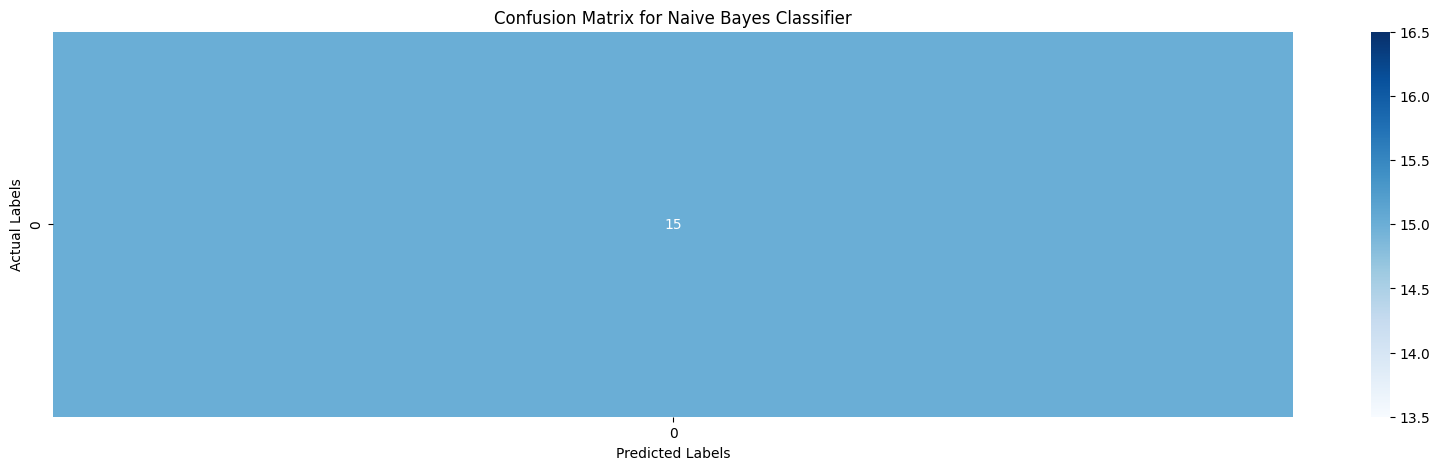

In [313]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics = MulticlassMetrics(EV_WA_Prediction.rdd)
precision_score = multiclass_metrics.weightedPrecision
recall_score = multiclass_metrics.weightedRecall
accuracy_score = multiclass_metrics.accuracy
f1_score = multiclass_metrics.weightedFMeasure()
print("Recall = {}".format(recall_score))
print("Precision = {}".format(precision_score))
print("Accuracy = {}".format(accuracy_score))
print("F1_Score = {}".format(f1_score))
confusion_matrix = multiclass_metrics.confusionMatrix().toArray()
multiclass_metrics.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [314]:
multiclass_metrics.confusionMatrix().toArray()

array([[15.]])

**Logistic Regression Model**

In [315]:
# import machine learning method logistic regression for classification
from pyspark.ml.classification import LogisticRegression
Logistic_Regression = LogisticRegression()
# Train Logistic Regression model using training data
EV_Adoption_LR = Logistic_Regression.fit(training)

In [316]:
# Test the logistic regression model on Dataset 2
EV_WA_results_LR = EV_Adoption_LR.transform(CleanEV_WA_dataset)
EV_WA_results_LR.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[2400.0,18.100000...|[-125.81338900279...|[2.29054804954709...|       1.0|
|  0.0|[2250.0,23.5,34.0...|[-417.02176514340...|[7.75797837454626...|       1.0|
|  0.0|[1550.0,9.1999998...|[12.0979661505255...|[0.99999442919907...|       0.0|
|  0.0|[1800.0,6.3000001...|[31.0795654100765...|[0.99999999999996...|       0.0|
|  0.0|[1450.0,5.0999999...|[88.4848909156476...|           [1.0,0.0]|       0.0|
|  0.0|[1700.0,7.1999998...|[6.40041758180566...|[0.99834189031206...|       0.0|
|  0.0|[1350.0,10.5,22.1...|[1.96552532916379...|[0.87712967679339...|       0.0|
|  0.0|[1200.0,12.699999...|[-29.477413160231...|[1.57805495680701...|       1.0|
|  0.0|[1100.0,15.300000...|[-73.662084471288...|[1.02085295120039...|       1.0|
|  0.0|[1300.0,1

In [317]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
EV_WA_eval_LR = MulticlassClassificationEvaluator()
EV_WA_LR = EV_WA_eval_LR.evaluate(EV_WA_results_LR)
print("Accuracy of model at predicting Electric Vehicle with Logistic Regression is: {}".format(EV_WA_LR))

Accuracy of model at predicting Electric Vehicle with Logistic Regression is: 0.6363636363636364


In [318]:
# extract prediction and ground truth label from EV_WA_results_LR
EV_WA_Label_Prediction_LR = EV_WA_results_LR['label','prediction']
EV_WA_Label_Prediction_LR.show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+



/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Recall = 0.4666666666666667
Precision = 0.21777777777777776
Accuracy = 0.4666666666666667
F1_Score = 0.29696969696969694


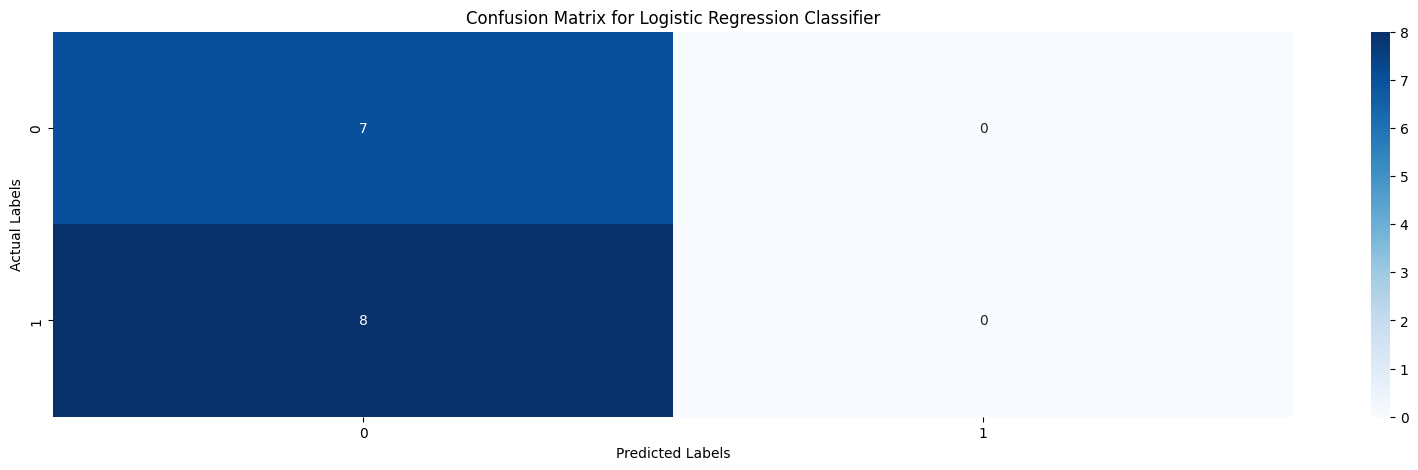

In [319]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics_lr = MulticlassMetrics(EV_WA_Label_Prediction_LR.rdd)
precision_score_lr = multiclass_metrics_lr.weightedPrecision
recall_score_lr = multiclass_metrics_lr.weightedRecall
accuracy_score_lr = multiclass_metrics_lr.accuracy
f1_score_lr = multiclass_metrics_lr.weightedFMeasure()
print("Recall = {}".format(recall_score_lr))
print("Precision = {}".format(precision_score_lr))
print("Accuracy = {}".format(accuracy_score_lr))
print("F1_Score = {}".format(f1_score_lr))
confusion_matrix_lr = multiclass_metrics_lr.confusionMatrix().toArray()
multiclass_metrics_lr.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix_lr, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [320]:
multiclass_metrics_lr.confusionMatrix().toArray()

array([[7., 0.],
       [8., 0.]])

**Decision Tree Model**

In [321]:
# import machine learning method decision tree for classification
from pyspark.ml.classification import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier()
# Decision Tree bayes model using training data
EV_Adoption_DT = Decision_Tree.fit(training)

25/05/28 20:47:48 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 25 (= number of training instances)


In [322]:
# Test the Decision Tree model on Dataset 2
EV_WA_results_DT = EV_Adoption_DT.transform(CleanEV_WA_dataset)
EV_WA_results_DT.show()

+-----+--------------------+-------------+-----------+----------+
|label|            features|rawPrediction|probability|prediction|
+-----+--------------------+-------------+-----------+----------+
|  0.0|[2400.0,18.100000...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[2250.0,23.5,34.0...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[1550.0,9.1999998...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[1800.0,6.3000001...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[1450.0,5.0999999...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[1700.0,7.1999998...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[1350.0,10.5,22.1...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[1200.0,12.699999...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[1100.0,15.300000...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[1300.0,11.100000...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[1400.0,14.0,8.39...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[1250.0,13.300000...|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|  0.0|[11

In [323]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
EV_WA_eval_DT = MulticlassClassificationEvaluator()
EV_WA_DT = EV_WA_eval_DT.evaluate(EV_WA_results_DT)
print("Accuracy of model at predicting Electric Vehicle with Logistic Regression is: {}".format(EV_WA_LR))

Accuracy of model at predicting Electric Vehicle with Logistic Regression is: 0.6363636363636364


In [324]:
# extract prediction and ground truth label from EV_WA_results_DT
EV_WA_Label_Prediction_DT = EV_WA_results_DT['label','prediction']
EV_WA_Label_Prediction_DT.show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+



/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Recall = 1.0
Precision = 1.0
Accuracy = 1.0
F1_Score = 1.0


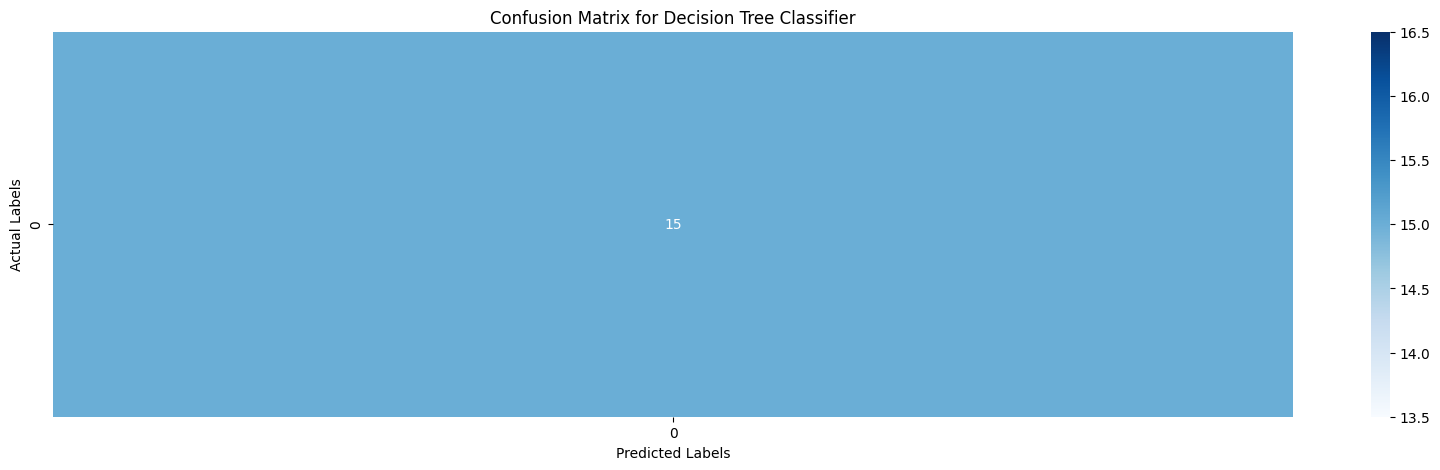

In [325]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics_dt = MulticlassMetrics(EV_WA_Label_Prediction_DT.rdd)
precision_score_dt = multiclass_metrics_dt.weightedPrecision
recall_score_dt = multiclass_metrics_dt.weightedRecall
accuracy_score_dt = multiclass_metrics_dt.accuracy
f1_score_dt = multiclass_metrics_dt.weightedFMeasure()
print("Recall = {}".format(recall_score_dt))
print("Precision = {}".format(precision_score_dt))
print("Accuracy = {}".format(accuracy_score_dt))
print("F1_Score = {}".format(f1_score_dt))
confusion_matrix_dt = multiclass_metrics_dt.confusionMatrix().toArray()
multiclass_metrics_dt.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix_dt, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [326]:
multiclass_metrics_dt.confusionMatrix().toArray()

array([[15.]])

**Random Forest Classifier**

In [327]:
from pyspark.ml.classification import RandomForestClassifier

RF = RandomForestClassifier()
EV_Adoption_RF = RF.fit(training)

25/05/28 20:47:50 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 25 (= number of training instances)


In [328]:
# Test the Random Forest model on Dataset 2
EV_WA_results_RF = EV_Adoption_RF.transform(CleanEV_WA_dataset)
EV_WA_results_RF.show()

+-----+--------------------+-------------+-----------+----------+
|label|            features|rawPrediction|probability|prediction|
+-----+--------------------+-------------+-----------+----------+
|  0.0|[2400.0,18.100000...|   [14.0,6.0]|  [0.7,0.3]|       0.0|
|  0.0|[2250.0,23.5,34.0...|   [13.0,7.0]|[0.65,0.35]|       0.0|
|  0.0|[1550.0,9.1999998...|   [13.0,7.0]|[0.65,0.35]|       0.0|
|  0.0|[1800.0,6.3000001...|   [14.0,6.0]|  [0.7,0.3]|       0.0|
|  0.0|[1450.0,5.0999999...|   [14.0,6.0]|  [0.7,0.3]|       0.0|
|  0.0|[1700.0,7.1999998...|   [14.0,6.0]|  [0.7,0.3]|       0.0|
|  0.0|[1350.0,10.5,22.1...|   [14.0,6.0]|  [0.7,0.3]|       0.0|
|  0.0|[1200.0,12.699999...|   [18.0,2.0]|  [0.9,0.1]|       0.0|
|  0.0|[1100.0,15.300000...|   [18.0,2.0]|  [0.9,0.1]|       0.0|
|  0.0|[1300.0,11.100000...|   [14.0,6.0]|  [0.7,0.3]|       0.0|
|  0.0|[1400.0,14.0,8.39...|   [14.0,6.0]|  [0.7,0.3]|       0.0|
|  0.0|[1250.0,13.300000...|   [14.0,6.0]|  [0.7,0.3]|       0.0|
|  0.0|[11

In [329]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
EV_WA_eval_RF = MulticlassClassificationEvaluator()
EV_WA_RF = EV_WA_eval_RF.evaluate(EV_WA_results_RF)
print("Accuracy of model at predicting Electric Vehicle with Random Forest is: {}".format(EV_WA_RF))

Accuracy of model at predicting Electric Vehicle with Random Forest is: 1.0


In [330]:
# extract prediction and ground truth label from EV_WA_results_DT
EV_WA_Label_Prediction_RF = EV_WA_results_RF['label','prediction']
EV_WA_Label_Prediction_RF.show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+



/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Recall = 1.0
Precision = 1.0
Accuracy = 1.0
F1_Score = 1.0


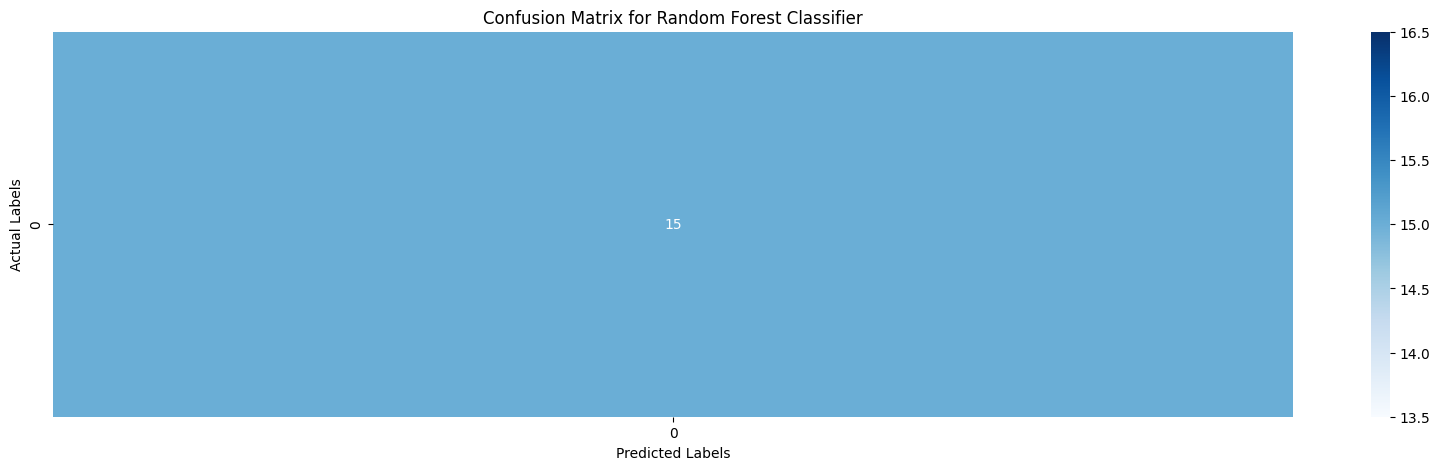

In [331]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics_rf = MulticlassMetrics(EV_WA_Label_Prediction_RF.rdd)
precision_score_rf = multiclass_metrics_rf.weightedPrecision
recall_score_rf = multiclass_metrics_rf.weightedRecall
accuracy_score_rf = multiclass_metrics_rf.accuracy
f1_score_rf = multiclass_metrics_rf.weightedFMeasure()
print("Recall = {}".format(recall_score_rf))
print("Precision = {}".format(precision_score_rf))
print("Accuracy = {}".format(accuracy_score_rf))
print("F1_Score = {}".format(f1_score_rf))
confusion_matrix_rf = multiclass_metrics_rf.confusionMatrix().toArray()
multiclass_metrics_rf.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix_rf, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [332]:
multiclass_metrics_rf.confusionMatrix().toArray()

array([[15.]])

**GBT Classifier**

In [333]:
from pyspark.ml.classification import GBTClassifier
# Initialize the model
GBT = GBTClassifier()
EV_Adoption_GBT = GBT.fit(training)

25/05/28 20:47:53 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 25 (= number of training instances)


In [334]:
# Test the  model on Dataset 2
EV_WA_results_GBT = EV_Adoption_GBT.transform(CleanEV_WA_dataset)
EV_WA_results_GBT.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[2400.0,18.100000...|[0.93031445857127...|[0.86537023662031...|       0.0|
|  0.0|[2250.0,23.5,34.0...|[0.93031445857127...|[0.86537023662031...|       0.0|
|  0.0|[1550.0,9.1999998...|[0.93031445857127...|[0.86537023662031...|       0.0|
|  0.0|[1800.0,6.3000001...|[0.93031445857127...|[0.86537023662031...|       0.0|
|  0.0|[1450.0,5.0999999...|[0.93031445857127...|[0.86537023662031...|       0.0|
|  0.0|[1700.0,7.1999998...|[0.93031445857127...|[0.86537023662031...|       0.0|
|  0.0|[1350.0,10.5,22.1...|[0.93031445857127...|[0.86537023662031...|       0.0|
|  0.0|[1200.0,12.699999...|[1.54350200272498...|[0.95635347857270...|       0.0|
|  0.0|[1100.0,15.300000...|[1.54350200272498...|[0.95635347857270...|       0.0|
|  0.0|[1300.0,1

In [335]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
EV_WA_eval_GBT = MulticlassClassificationEvaluator()
EV_WA_GBT = EV_WA_eval_GBT.evaluate(EV_WA_results_GBT)
print("Accuracy of model at predicting Electric Vehicle with Gradient-Boosted Trees is: {}".format(EV_WA_GBT))

Accuracy of model at predicting Electric Vehicle with Gradient-Boosted Trees is: 1.0


In [336]:
# extract prediction and ground truth label from EV_WA_results_DT
EV_WA_Label_Prediction_GBT = EV_WA_results_GBT['label','prediction']
EV_WA_Label_Prediction_GBT.show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+



/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Recall = 1.0
Precision = 1.0
Accuracy = 1.0
F1_Score = 1.0


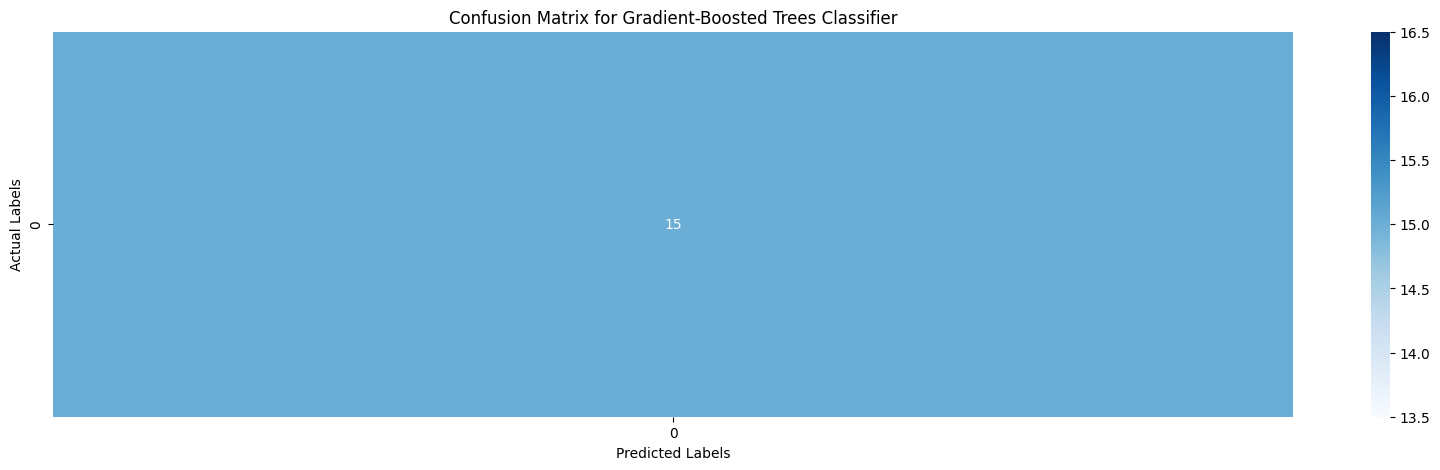

In [337]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics_GBT = MulticlassMetrics(EV_WA_Label_Prediction_GBT.rdd)
precision_score_GBT = multiclass_metrics_GBT.weightedPrecision
recall_score_GBT = multiclass_metrics_GBT.weightedRecall
accuracy_score_GBT = multiclass_metrics_GBT.accuracy
f1_score_GBT = multiclass_metrics_GBT.weightedFMeasure()
print("Recall = {}".format(recall_score_GBT))
print("Precision = {}".format(precision_score_GBT))
print("Accuracy = {}".format(accuracy_score_GBT))
print("F1_Score = {}".format(f1_score_GBT))
confusion_matrix_GBT = multiclass_metrics_GBT.confusionMatrix().toArray()
multiclass_metrics_GBT.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix_GBT, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Gradient-Boosted Trees Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [338]:
multiclass_metrics_GBT.confusionMatrix().toArray()

array([[15.]])

**Linear Support Vector Machine**

In [339]:
#Linear Support Vector Machine (SVM) 
from pyspark.ml.classification import LinearSVC
SVM = LinearSVC()
EV_Adoption_SVM = SVM.fit(training)

In [340]:
# Test the  model on Dataset 2
EV_WA_results_SVM = EV_Adoption_SVM.transform(CleanEV_WA_dataset)
EV_WA_results_SVM.show()

+-----+--------------------+--------------------+----------+
|label|            features|       rawPrediction|prediction|
+-----+--------------------+--------------------+----------+
|  0.0|[2400.0,18.100000...|[-7.5779886705241...|       1.0|
|  0.0|[2250.0,23.5,34.0...|[-28.872666369994...|       1.0|
|  0.0|[1550.0,9.1999998...|[0.71243920646858...|       0.0|
|  0.0|[1800.0,6.3000001...|[1.72224762583971...|       0.0|
|  0.0|[1450.0,5.0999999...|[5.73195767131800...|       0.0|
|  0.0|[1700.0,7.1999998...|[0.01422154737263...|       0.0|
|  0.0|[1350.0,10.5,22.1...|[0.37498735773063...|       0.0|
|  0.0|[1200.0,12.699999...|[-1.6596219253871...|       1.0|
|  0.0|[1100.0,15.300000...|[-4.3331443850123...|       1.0|
|  0.0|[1300.0,11.100000...|[-2.0357158609354...|       1.0|
|  0.0|[1400.0,14.0,8.39...|[-7.4635144570970...|       1.0|
|  0.0|[1250.0,13.300000...|[-6.2397308387882...|       1.0|
|  0.0|[1150.0,8.3999996...|[-2.5737033165716...|       1.0|
|  0.0|[3300.0,2.9000000

In [341]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
EV_WA_eval_SVM = MulticlassClassificationEvaluator()
EV_WA_SVM = EV_WA_eval_SVM.evaluate(EV_WA_results_SVM)
print("Accuracy of model at predicting Electric Vehicle with Linear Support Vector Machine Classifier is: {}".format(EV_WA_GBT))

Accuracy of model at predicting Electric Vehicle with Linear Support Vector Machine Classifier is: 1.0


In [342]:
# extract prediction and ground truth label from EV_WA_results_DT
EV_WA_Label_Prediction_SVM = EV_WA_results_SVM['label','prediction']
EV_WA_Label_Prediction_SVM.show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+



/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Recall = 0.4666666666666667
Precision = 0.21777777777777776
Accuracy = 0.4666666666666667
F1_Score = 0.29696969696969694


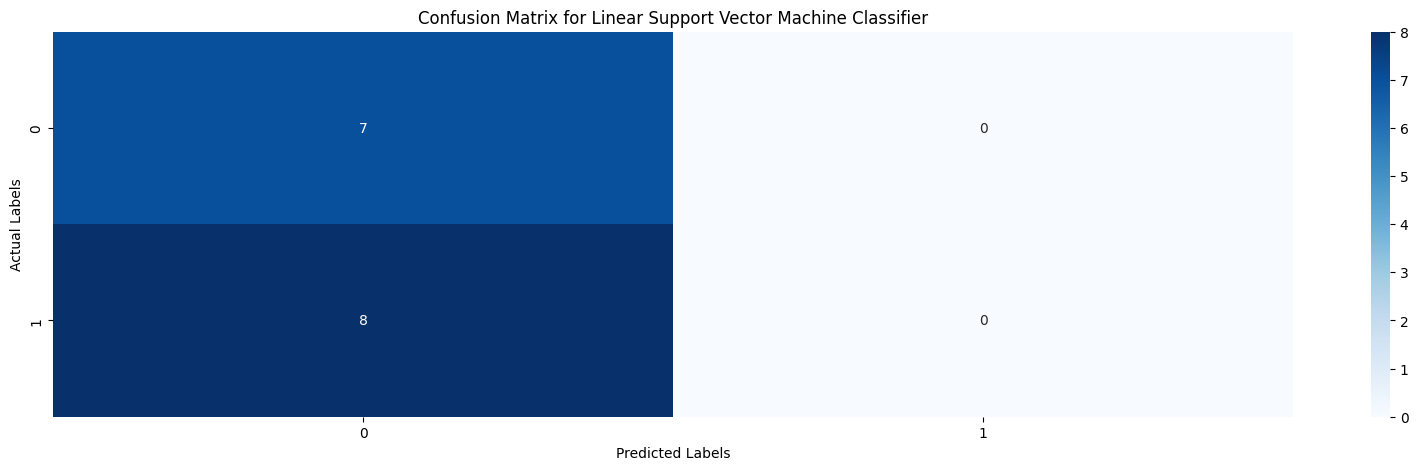

In [343]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics_SVM = MulticlassMetrics(EV_WA_Label_Prediction_SVM.rdd)
precision_score_SVM = multiclass_metrics_SVM.weightedPrecision
recall_score_SVM = multiclass_metrics_SVM.weightedRecall
accuracy_score_SVM = multiclass_metrics_SVM.accuracy
f1_score_SVM = multiclass_metrics_SVM.weightedFMeasure()
print("Recall = {}".format(recall_score_SVM))
print("Precision = {}".format(precision_score_SVM))
print("Accuracy = {}".format(accuracy_score_SVM))
print("F1_Score = {}".format(f1_score_SVM))
confusion_matrix_SVM = multiclass_metrics_SVM.confusionMatrix().toArray()
multiclass_metrics_SVM.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix_SVM, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Linear Support Vector Machine Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [344]:
multiclass_metrics_SVM.confusionMatrix().toArray()

array([[7., 0.],
       [8., 0.]])

In [345]:
from tabulate import tabulate

# Sample metrics (replace with your actual scores)
data = [
    ["Logistic Regression", accuracy_score_lr, precision_score_lr, recall_score_lr, f1_score_lr],
    ["Random Forest Classifier", accuracy_score_rf, precision_score_rf, recall_score_rf, f1_score_rf],
    ["XGB Classifier", accuracy_score_GBT, precision_score_GBT, recall_score_GBT, f1_score_GBT],
    ["Support Vector Machine", accuracy_score_SVM, precision_score_SVM, recall_score_SVM, f1_score_SVM],
    ["Decision Tree Classifier", accuracy_score_dt, precision_score_dt, recall_score_dt, f1_score_dt],
    ["Gaussian Naive Bayes", accuracy_score, precision_score, recall_score, f1_score]
]

columns = ["Algorithm", "Accuracy Score", "Precision", "Recall", "F1 Score"]

# Print the tabulated result
print(tabulate(data, headers=columns, tablefmt="fancy_grid", floatfmt=".3f"))


╒══════════════════════════╤══════════════════╤═════════════╤══════════╤════════════╕
│ Algorithm                │   Accuracy Score │   Precision │   Recall │   F1 Score │
╞══════════════════════════╪══════════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression      │            0.467 │       0.218 │    0.467 │      0.297 │
├──────────────────────────┼──────────────────┼─────────────┼──────────┼────────────┤
│ Random Forest Classifier │            1.000 │       1.000 │    1.000 │      1.000 │
├──────────────────────────┼──────────────────┼─────────────┼──────────┼────────────┤
│ XGB Classifier           │            1.000 │       1.000 │    1.000 │      1.000 │
├──────────────────────────┼──────────────────┼─────────────┼──────────┼────────────┤
│ Support Vector Machine   │            0.467 │       0.218 │    0.467 │      0.297 │
├──────────────────────────┼──────────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree Classifier │            1.000 │       